# Exploring the Oncogenic Impact of *TP53* Variants and Classifying the Pathogenicity: A Comprehensive Analysis

___
**Author:** Alison Vaz\
**Date:** 2024-03-15\
**Contact:** alivaz95@gmail.com
___

## <a id='TOC'></a>Table of Contents

1. [Introduction](#Intro)
2. [Data Dictionary](#DD)
3. [Basic EDA](#basiceda)
4. [Preprocessing](#preprocessing)
5. [Visualizations](#visualizations)
6. [Baseline Modeling](#basemodel)

___
## <a id = 'Intro'></a>[Introduction](#TOC)

TP53, a tumor suppressor gene encoding the p53 protein, plays a pivotal role in maintaining genomic stability and preventing the initiation and progression of various cancers. Mutations in TP53 are among the most common genetic alterations observed in human cancers, contributing to tumor development and progression. Understanding the oncogenic impact of TP53 variants is crucial for elucidating their functional consequences and guiding personalized cancer treatment strategies.

This data science project aims to comprehensively analyze the oncogenic impact of TP53 variants and classify their pathogenicity. By leveraging machine learning algorithms and statistical analysis techniques, we seek to identify patterns and relationships within the vast genomic and clinical datasets available. Through this analysis, we aim to:

1. Characterize the spectrum of TP53 variants observed across different cancer types and patient populations.
2. Investigate the functional implications of TP53 mutations on protein structure, function, and downstream signaling pathways.
3. Develop predictive models to classify the pathogenicity of TP53 variants based on diverse genomic features, clinical annotations, and experimental data.
4. Provide insights into the molecular mechanisms underlying TP53-associated tumorigenesis and potential therapeutic vulnerabilities.

By unraveling the complex landscape of TP53 mutations and their oncogenic potential, this project aims to contribute to the advancement of precision oncology and facilitate the development of targeted therapies for cancer patients harboring TP53 alterations. Through interdisciplinary collaboration and data-driven insights, we strive to enhance our understanding of cancer biology and ultimately improve patient outcomes in the era of precision medicine.

___

In [1]:
# Importing pandas library for data manipulation
import pandas as pd

# Importing numpy library for numerical computations
import numpy as np

# Importing seaborn library for statistical data visualization
import seaborn as sns

# Importing matplotlib library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Importing warnings module to handle warning messages
import warnings
# Importing specific function simplefilter from the warnings module
from warnings import simplefilter

# Importing train_test_split function for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Importing cross_val_score function for cross-validation
from sklearn.model_selection import cross_val_score

# Importing GridSearchCV class for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Importing LogisticRegression class for logistic regression
from sklearn.linear_model import LogisticRegression

# Importing RandomForestClassifier class for random forest classification
from sklearn.ensemble import RandomForestClassifier

# Importing DecisionTreeClassifier class for decision tree classification
from sklearn.tree import DecisionTreeClassifier

# Importing Pipeline class for chaining multiple estimators
from sklearn.pipeline import Pipeline

# Importing SimpleImputer class for imputing missing values
from sklearn.impute import SimpleImputer

# Importing ColumnTransformer class for applying transformers to columns of an array
from sklearn.compose import ColumnTransformer

# Importing StandardScaler class for standardization
from sklearn.preprocessing import StandardScaler

# Importing accuracy_score function for accuracy calculation
from sklearn.metrics import accuracy_score

# Importing classification_report function for classification report generation
from sklearn.metrics import classification_report

# Importing PCA class for principal component analysis
from sklearn.decomposition import PCA

# Importing variance_inflation_factor function for calculating the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
# Importing the mutation dataset from the TP53Website 
umd_mut = pd.read_excel(r"C:\Users\aliva\Downloads\Capstone\datasets\TP53Website\UMD_mutations_US.xlsx", sheet_name=0)

# Reset the index
umd_mut.reset_index(drop=True, inplace=True)

umd_mut.head()

C:\Users\aliva\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Database_ID    UMD_ID  COSMIC_ID ATCC       SNP_ID HG19_Start HG19_End  \
0        67805  UMD_2370        NaN  NaN          NaN    7578485  7578485   
1        56738  UMD_2467        NaN  NaN          NaN    7578474  7578474   
2        74928  UMD_5254  COSM46091  NaN          NaN    7577499  7577499   
3        46370    UMD_59        NaN  NaN          NaN          ?        ?   
4        49903  UMD_5576  COSM10659  NaN  rs121913343    7577121  7577121   

  HG18_Start HG18_End HG38_Start  ...      Pages   Medline  Act_outliers  \
0    7519210  7519210    7675167  ...    173-185  27499902            OK   
1    7519199  7519199    7675156  ...    L23-L28  26472209  Not analyzed   
2    7518224  7518224    7674181  ...    107-117  28062544  Not analyzed   
3          ?        ?          ?  ...  1563-1571  24908143  Not analyzed   
4    7517846  7517846    7673803  ...    on line  26315110            OK   

   PCA_outliers PCA_Score                                 Comment_7_Sequence  \
0            IN     0.389                                                  -   
1  Not analyzed     0.000  This region contains a homopolymeric tract of 5 G   
2  Not analyzed     0.000                                                  -   
3  Not analyzed     0.000                                                  -   
4            IN     0.812                                                  -   

  Comment_8_publication                                      Comment_9_SNP  \
0                     -                                                  -   
1          Not analyzed                                                  -   
2          Not analyzed                                                  -   
3          Not analyzed                                                  -   
4                     -  Both germline and somatic variants have been d...   

                                            Comments      Pathogenicity  
0                                                NaN  Likely Pathogenic  
1                                                NaN  Likely Pathogenic  
2                                                NaN                VUS  
3  Biallelic deletion of the TP53 gene is rare ex...         Pathogenic  
4                                                NaN         Pathogenic  

[5 rows x 133 columns]

## <a id= 'DD'></a>[Data Dictionary](#TOC)

### Mutation Identifiers

| Identifier   | Description                                                                                                  |
|--------------|:--------------------------------------------------------------------------------------------------------------|
| cDNA_Variant | Mutation nomenclature according to HGVS standards using the coding sequence as reference.                   |
| UMD_ID       | Unique mutation identifier in the UMD database for each genomic variant.                                     |
| COSMIC_ID    | Mutation identifier in COSMIC, a comprehensive database of somatic mutations in cancer.                     |
| ATCC         | Official reference available for several cell lines distributed by repository centers.                       |
| SNP_ID*      | Variants of the TP53 gene included in the SNP database, which may encompass pathogenic variants.             |

*SNP_ID refers to variants listed in the SNP database.

### Mutation Coordinates and Nomenclature

| Identifier          | Description                                                                                                                          |
|---------------------|:--------------------------------------------------------------------------------------------------------------------------------------|
| HG19_Start          | Mutation start coordinates using HG19 as reference.                                                                                  |
| HG19_End            | Mutation end coordinates using HG19 as reference.                                                                                    |
| HG18_Start          | Mutation start coordinates using HG18 as reference.                                                                                  |
| HG18_End            | Mutation end coordinates using HG18 as reference.                                                                                    |
| HG38_Start          | Mutation start coordinates using CRCh38 as reference.                                                                                |
| HG38_End            | Mutation end coordinates using CRCH38 as reference.                                                                                  |
| NG_017013.2         | Nucleotide position using NCBI reference sequence NG_0117013.2.                                                                     |
| HG19_Variant        | Mutation nomenclature according to HGVS standards using the genomic sequence as reference (NC_000017.10 for genome build NCBI37/hg19). |
| HG18_Variant        | Mutation nomenclature according to HGVS standards using the genomic sequence as reference (NC_000017.9 for genome build NCBI36/hg18).  |
| HG38_Variant        | Mutation nomenclature according to HGVS standards using the genomic sequence as reference (NC_000017.11 for genome build GRCh38.p2).   |
| NG_017013.2_variant| Mutation nomenclature according to HGVS standards using the RefSeq Gene NG_017013. sequence as reference.                              |
| Start_cDNA          | Mutation start coordinate using the p53 cDNA as reference (position 1 refers to the A of the start ATG): reference sequence NM_000546.5. |
| End_cDNA            | Mutation end coordinate using the p53 cDNA as reference (position 1 refers to the A of the start ATG): reference sequence NM_000546.5.   |
| Exon:intron_Start  | Location of the mutation start in the introns or exons of the TP53 gene.                                                              |
| Exon:intron_End    | Location of the mutation end in the introns or exons of the TP53 gene.                                                                |
| Genome_Base_Coding | Nucleotide at the start position of the mutation.                                                                                    |
| cDNA_Variant       | Mutation nomenclature according to HGVS standards using the coding sequence as reference (position 1 refers to the A of the start ATG): reference sequence NM_000546.5. |


### Mutation Coordinates and Nomenclature

| Identifier          | Description                                                                                                                          |
|---------------------|:-------------------------------------------------------------------------------------------------------------------------------------|
| HG19_Start          | Mutation start coordinates using HG19 as reference.                                                                                  |
| HG19_End            | Mutation end coordinates using HG19 as reference.                                                                                    |
| HG18_Start          | Mutation start coordinates using HG18 as reference.                                                                                  |
| HG18_End            | Mutation end coordinates using HG18 as reference.                                                                                    |
| HG38_Start          | Mutation start coordinates using CRCh38 as reference.                                                                                |
| HG38_End            | Mutation end coordinates using CRCH38 as reference.                                                                                  |
| NG_017013.2         | Nucleotide position using NCBI reference sequence NG_0117013.2.                                                                     |
| HG19_Variant        | Mutation nomenclature according to HGVS standards using the genomic sequence as reference (NC_000017.10 for genome build NCBI37/hg19). |
| HG18_Variant        | Mutation nomenclature according to HGVS standards using the genomic sequence as reference (NC_000017.9 for genome build NCBI36/hg18).  |
| HG38_Variant        | Mutation nomenclature according to HGVS standards using the genomic sequence as reference (NC_000017.11 for genome build GRCh38.p2).   |
| NG_017013.2_variant| Mutation nomenclature according to HGVS standards using the RefSeq Gene NG_017013. sequence as reference.                              |
| Start_cDNA          | Mutation start coordinate using the p53 cDNA as reference (position 1 refers to the A of the start ATG): reference sequence NM_000546.5. |
| End_cDNA            | Mutation end coordinate using the p53 cDNA as reference (position 1 refers to the A of the start ATG): reference sequence NM_000546.5.   |
| Exon:intron_Start  | Location of the mutation start in the introns or exons of the TP53 gene.                                                              |
| Exon:intron_End    | Location of the mutation end in the introns or exons of the TP53 gene.                                                                |
| Genome_Base_Coding | Nucleotide at the start position of the mutation.                                                                                    |
| cDNA_Variant       | Mutation nomenclature according to HGVS standards using the coding sequence as reference (position 1 refers to the A of the start ATG): reference sequence NM_000546.5. |

### Mutation Details and Amino Acid Changes

| Identifier   | Description                                                                                         |
|--------------|:----------------------------------------------------------------------------------------------------|
| Codon        | Codon position using TP53 alpha (p1) as reference (NP_000537.2).                                   |
| Splice       | Mutations targeting the canonical AG acceptor site or GT donor.                                     |
| Untranslated | Mutations targeting other nucleotides (5'UTR; 3,UTR or Intron).                                    |
| WT AA_1      | Wild-type amino acid in 1-letter nomenclature.                                                      |
| WT AA_3      | Wild-type amino acid in 3-letter nomenclature.                                                      |
| Mutant AA_1  | Mutant amino acid in 1-letter nomenclature.                                                         |
| Mutant AA_3  | Mutant amino acid in 3-letter nomenclature.                                                         |
| Structure    | Structural motif of the TP53 protein according to Cho et al. (1994).                                |
| Domain       | Domain of the TP53 protein.                                                                         |
| PTM          | Post-translational modifications including Lys Acetylation, Lys Ubiquitination, and more.          |

### Mutation Details and Nucleotide Changes

| Identifier        | Description                                                                                                                                                                      |
|-------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Base_Change_Size  | Size of the substitution                                                                                                                                                        |
| Ins_Size          | Size of the deletion                                                                                                                                                            |
| Del_Size          | Size of the insertion; the sequence of the insertion is available for a few cases.                                                                                               |
| Mutant_Allele     | Mutant (Alt) nucleotide                                                                                                                                                         |
| WT_Codon          | Nucleotide sequence of the wild-type codon in which the mutation occurred.                                                                                                      |
| Mutant_Codon      | Sequence of the mutated codon. Del: exonic deletion, Ins: exonic insertion, Indel: complex event that involves an exonic insertion and a deletion. Splice: mutation that targets the canonical AG splice-acceptor site or GT splice-donor site. NR: not relevant, mutations targeting intronic sequence, 5'UTR or 3'UTR. |
| Mutational_Event  | Mutational events                                                                                                                                                               |
| Type              | Ts: Transition (a pyrimidine (C or T) is substituted by another pyrimidine, or a purine (A or G) is substituted by another purine); Tv: Transversion (a transversion mutation involves substitution of a pyrimidine by a purine, or vice versa); Td: tandem mutation; Fr: Frameshift mutations (deletions / insertions); Inf: In-frame deletions or insertions |
| Mutation_Type     | SNV: Single nucleotide variant, D: Deletion, I: insertion, ID: complex event that involves an insertion and a deletion.                                                           |
| CpG               | Yes: transition (G to A or C to T base change) at a CpG dinucleotide; No: transitions (G to A or C to T base change) at non-CpG sites;                                           |

### Pyrimidine-Pyrimidine (Py-Py) Doublets and Tandem Mutations

| Identifier       | Description                                                                                                                                                                       |
|------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Py-Py_Doublets   | Indicates whether or not a mutation targets a Py-Py doublet                                                                                                                        |
|                  | - Yes, non-coding strand: mutation located at a Py-Py doublet on the non-coding strand of the p53 gene                                                                           |
|                  | - Yes, coding strand: mutation located at a Py-Py doublet on the coding strand of the p53 gene                                                                                    |
|                  | - No: mutation located outside a Py-Py doublet                                                                                                                                    |
| Tandem_Class     | The majority of tandem mutations are found in skin tumours.                                                                                                                        |
|                  | Several types of tandem mutations can occur in the open reading frame of the TP53 gene (or any other genes).                                                                     |
|                  | These mutations are considered to be single mutational events linked to UV exposure                                                                                                |
|                  | - T1: two different codons are modified by the substitution.                                                                                                                      |
|                  |    e.g.: codons 247 and 248 of the TP53 gene: AAC - CGG -> AAT- AGG                                                                                                               |
|                  |    c.741_742delCCInsTA (p.[N247N; R248R]                                                                                                                                         |
|                  |    In the majority of T1 tandem mutations, the first substitution does not change the amino acid residue and results in a synonymous change.                                    |
|                  | - T2: only one codon is modified by the substitution.                                                                                                                            |
|                  |    e.g.: codon 331, CAG >CCA.                                                                                                                                                     |
|                  |    c.992_993delAGInsCA (p.Q331P).                                                                                                                                                 |
|                  | - T3: the tandem mutation occurs across a splice site                                                                                                                             |
| Variant_Classification | Translational effect of the mutation (Missense, Nonsense, Synonymous, Nonstop, In_frame_Del, Inframe_Ins, Frameshift_Del, or Frameshift_Ins)                                    |
| Variant_Comment  | Specific comment concerning the consequences of the mutation.                                                                                                                     |
| Variant_Type     | Variant type as defined in MAF file (SNP: Single Nucleotide Variant, DNP: Change in two consecutive bases (dinucleotide polymorphism), TNP: Change in three consecutive bases (tri-nucleotide polymorphism), ONP: Change in four or more consecutive bases (oligo-nucleotide polymorphism), INS: Insertion, DEL: Deletion) |

### Mutation Origin and Sample Information

| Identifier           | Description                                                                                                                                                                 |
|----------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Mutation_Origin      | - Somatic: Somatic mutations. Note: In most cases, only tumour DNA is sequenced and alterations are compared to a reference sequence.                                           |
|                      | - Germline: Inherited TP53 mutation. Note: Common SNPs such as rs1042522 (p.P72R), rs1800371 (p.P47S), rs1800372 (p.R213R), or rs1800370 (p.P36P) are not included in the database. |
| Disease              | Name of the disease as indicated in the publication.                                                                                                                         |
| Sample_pathology     | - Cancer: all types of tumours.                                                                                                                                             |
|                      | - Premalignant diseases: premalignant lesions, such as colorectal adenoma or prostatic intraepithelial neoplasia.                                                             |
|                      | - Non-malignant disease: non-malignant diseases such as gastritis or rheumatoid arthritis that have been shown to be associated with TP53 mutations.                        |
|                      | - No disease: cancer-free individuals with particular features.                                                                                                             |
|                      | - Unknown: sample of unknown origin.                                                                                                                                        |
| Sample_Origin        | Nature of the sample in which the mutation was identified.                                                                                                                  |
|                      | - Adjacent tissue: normal tissue surrounding the tumour.                                                                                                                     |
|                      | - Adjacent tissue (stroma): Stromal cells obtained by microdissection.                                                                                                       |
|                      | - Cell line: self-explanatory.                                                                                                                                              |
|                      | - Circulating tumour cells: DNA extracted from circulating tumour cells.                                                                                                     |
|                      | - Extra cellular DNA: free DNA extracted from sputum, urine, plasma, or serum.                                                                                              |
|                      | - Normal tissue: tissue from cancer-free individuals with particular features.                                                                                                |
|                      | - Pathological tissue: sample from patients with non-malignant disease.                                                                                                      |
|                      | - Peripheral blood lymphocytes: self-explanatory.                                                                                                                            |
|                      | - Tumour: pathological sample from a cancer patient.                                                                                                                         |
|                      | - Xenograft: human tumour transplanted in mice.                                                                                                                              |

### Additional Sample Information

| Identifier            | Description                                                                                                                                                                                                                      |
|-----------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Name                  | Name of the tumour/patient/cell line as indicated by the authors. If the publication does not include a sample name, an arbitrary name is assigned, typically the first letters of the author’s last name, followed by numbers.  |
| Hereditary_Syndrome   | Sample from patients with particular hereditary syndromes such as Fanconi anaemia, Li-Fraumeni syndrome, or Xeroderma pigmentosum.                                                                                              |
| Genetic_Background    | Tumours occurring in patients with known germline mutations in other tumour genes that could shape TP53 mutations. Only patients with clear genotype information have been included.                                             |
| Internal              | Internal tumours: all internal tumours. Skin tumour: all skin tumours.                                                                                                                                                          |
| Solid                 | Solid tumour: Non-hematological tumours. Hematological malignancy: all forms of leukemia and lymphomas.                                                                                                                         |
| Smoking               | Information on the patient’s smoking status: Yes, No, Unknown, or Ex-smoker.                                                                                                                                                     |
| Aflatoxin             | Patient’s exposure to Aflatoxin B1: Yes, No, or Unknown.                                                                                                                                                                         |
| Radiations            | Patient’s exposure to radiation: Yes, No, or Unknown.                                                                                                                                                                             |
| Drinking              | Information on the patient’s drinking status: Yes, No, or Unknown.                                                                                                                                                                |
| Asbestos              | Patient’s exposure to asbestos: Yes, No, or Unknown.                                                                                                                                                                              |
| Hepatitis_B           | Detection of HBV in the tumour: Yes, No, or Unknown.                                                                                                                                                                              |
| Papilloma             | Detection of HPV in the tumour: Yes, No, or Unknown.                                                                                                                                                                               |
| Exposure              | Other exposure or viral infection such as Aristolochic acid, radon, or HCV.                                                                                                                                                       |
| Complexity            | SM: Single mutational event in the tumour. DMU (Double Mutation Unknown): Two p53 mutations in the same tumour, but their allelic distribution is unknown. DMD (Double Mutation Different allele): Two p53 mutations in the same tumour on two different p53 alleles. |
|                       | DMS (Double Mutation Same allele): Two p53 mutations in the same tumour on the same p53 allele. MM (Multiple Mutation): More than two p53 mutations in the same tumour.                                                              |
| Unidentified_Mutation | Some mutations identified by pre-screening methodologies, but not fully described, are indicated in this field.                                                                                                                  |

### Mutation Statistics

| Identifier           | Description                                                                                                                                                                  |
|----------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Records_Number       | Number of occurrences of the mutant in the database.                                                                                                                         |
| Leukaemia_Stat       | Frequency of the variant (cDNA_nomenclature) in hematological malignancies.                                                                                                  |
| Solid_Stat           | Frequency of the variant (cDNA_nomenclature) in solid tumours.                                                                                                                |
| Tumour_Stat          | Frequency of the variant (cDNA_nomenclature) in tumours only (excluding variants from cell lines, germline and non-neoplastic diseases).                                    |
| Cell_line_Stat       | Frequency of the variant (cDNA_nomenclature) in cell lines only (excluding variants from tumours, germline and non-neoplastic diseases).                                     |
| Somatic_Stat         | Frequency of the variant (cDNA_nomenclature) found as a somatic event.                                                                                                        |
| Germline_Stat        | Frequency of the variant (cDNA_nomenclature) found as a germline event.                                                                                                       |
| Tumour_Repetition    | Several tumours display more than one mutation. Tumour_rep denotes the total number of mutations associated with this mutant in a single tumour.                             |
| Publication_Repetition | Number of occurrences of this particular mutant in the publication.                                                                                                            |
| Comment_Prediction   | Several prediction algorithms have been used to predict TP53 pathogenicity (SIFT, Mutassessor, Provean, PolyPhen, see the corresponding rows for each individual analysis). |
| Comment_Frequency    | Specific information related to the frequency of the mutation in the database.                                                                                                |
### Additional Mutation Comments

| Identifier         | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
|--------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Comment_Outliers   | Indicates whether or not the mutation is associated with outlier publications. Rare mutants only found in outlier studies should be considered to be suspicious.                                                                                                                                                                                                                                                                                             |
| Comment_Activity   | Specific information related to the residual activity of this TP53 mutant in the database based on the overall transcriptional activity (TA) on 8 different promoters. For missense variants, five categories have been defined. For nonsense variants, one category has been used. For frameshift variants, two categories have been used. For synonymous variants, two categories have been used. For mutations that target the canonical AG splice-acceptor site or GT splice-donor site, a separate category is used. |
| Comment_Splicing   | Indicates whether or not a mutation could impair TP53 splicing. For exonic mutation, MutPred Splice general score probability cutoff and raw data are provided. For intronic mutation, only mutations that target the canonical AG splice-acceptor site or GT splice-donor site are considered to be pathogenic.                                                                                                                                                   |
| Sift_Score         | Predicted functional effect using SIFT algorithm. Ranges from 0 to 1. The amino acid substitution is predicted to be damaging when the score is <= 0.05, and tolerated when the score is > 0.05.                                                                                                                                                                                                                                                             |
| Sift_Prediction    | Predictive value using SIFT algorithm.                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Provean_Score      | Predicted functional effect using PROVEAN algorithm. PROVEAN introduces a delta alignment score based on the reference and variant versions of a protein query sequence with respect to sequence homologues collected from the NCBI NR protein database through BLAST.                                                                                                                                                                              |
| Provean_prediction | Prediction - deleterious or neutral (using default cutoff at -2.5).                                                                                                                                                                                                                                                                                                                                 |
| Mutassessor_score  | Predicted functional effect using Mutassessor algorithm. Functional impact combined score.                                                                                                                                                                                                                                                                                                                                                                      |
| Mutassessor_prediction | Functional impact of a variant: predicted functional (high, medium), predicted non-functional (low, neutral).                                                                                                                                                                                                                                                                                                                                                 |
| Polyphen           | Predicted functional effect using Polyphen algorithm. Qualitative ternary classification appraised at 5%/10% (HumDiv) or 10%/20% (HumVar) FPR thresholds ("benign", "possibly damaging", "probably damaging").                                                                                                                                                                                                                                                     |
### Additional Mutation Comments

| Identifier              | Description                                                                                                                                                                                                                   |
|-------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Condel                  | Predicted functional effect using Condel algorithm.                                                                                                                                                                           |
| MutPred_Splice_General_Score | The MutPred Splice outputs are: 1. General Score, which is the probability that the exonic variant disrupts splicing. A general score >=0.6 labels a variant as a Splice Affecting Variant (SAV), and <0.6 labels a variant as a Splice Neutral Variant (SNV). 2. Additional supporting evidence is provided by a confident hypothesis about the splicing mechanism disrupted. |
| Prediction_Label        | See MutPred Splice documentation for details.                                                                                                                                                                                 |
| Confident_Hypotheses    | See MutPred Splice documentation for details.                                                                                                                                                                                 |
### Transcript and Protein Nomenclature

| Identifier               | Description                                                                                                    |
|--------------------------|:---------------------------------------------------------------------------------------------------------------|
| Transcript t1            | Mutation nomenclature and coordinates for transcript t1 using reference sequence NM_000546.5 or LRG_321t1    |
| Transcript t2            | Mutation nomenclature and coordinates for transcript t2 using reference sequence NM_001126112.2 or LRG_321t2 |
| Transcript t3            | Mutation nomenclature and coordinates for transcript t3 using reference sequence NM_001126114.2 or LRG_321t3 |
| Transcript t4            | Mutation nomenclature and coordinates for transcript t4 using reference sequence NM_001126113.2 or LRG_321t4 |
| Transcript t5            | Mutation nomenclature and coordinates for transcript t5 using reference sequence NM_001126115.1 or LRG_321t5 |
| Transcript t6            | Mutation nomenclature and coordinates for transcript t6 using reference sequence NM_001126116.1 or LRG_321t6 |
| Transcript t7            | Mutation nomenclature and coordinates for transcript t7 using reference sequence NM_001126117.1 or LRG_321t7 |
| Transcript t8            | Mutation nomenclature and coordinates for transcript t8 using reference sequence NM_001126118.1 or LRG_321t8 |
| Protein p1 (TP53_alpha) | Mutation nomenclature and coordinates for protein p1 using reference sequence NP_000537.3 or LRG_321p1       |
| Protein p3 (TP53_beta)  | Mutation nomenclature and coordinates for protein p3 using reference sequence NP_001119586.1 or LRG_321p3    |
| Protein p4 (TP53_gamma) | Mutation nomenclature and coordinates for protein p4 using reference sequence NP_001119585.1 or LRG_321p4    |
| Protein p8 (Delta_40_TP53)         | Mutation nomenclature and coordinates for protein p8 using reference sequence NP_001263690.1 or LRG_321p8    |
| Protein p9 (Delta_40_TP53_beta)    | Mutation nomenclature and coordinates for protein p9 using reference sequence NP_001263625.1 or LRG_321p9    |
| Protein p10 (Delta_40_TP53_gamma)  | Mutation nomenclature and coordinates for protein p10 using reference sequence NP_001263624.1 or LRG_321p10 |
| Protein p5 (Delta_133_TP53_alpha)  | Mutation nomenclature and coordinates for protein p5 using reference sequence NP_001119587.1 or LRG_321p5    |
| Protein p6 (Delta_133_TP53_beta)   | Mutation nomenclature and coordinates for protein p6 using reference sequence NP_001119588.1 or LRG_321p6    |
| Protein p7 (Delta_133_TP53_gamma)  | Mutation nomenclature and coordinates for protein p7 using reference sequence NP_001119589.1 or LRG_321p7    |
| Protein p11 (Delta_160_TP53_alpha) | Mutation nomenclature and coordinates for protein p11 using reference sequence NP_001263626.1 or LRG_321p11  |
| Protein p12 (Delta_160_TP53_beta)  | Mutation nomenclature and coordinates for protein p12 using reference sequence NP_001263627.1 or LRG_321p12  |
| Protein p13 (Delta_160_TP53_gamma) | Mutation nomenclature and coordinates for protein p13 using reference sequence NP_001263628.1 or LRG_321p13 |

### Mutant Activity

| Identifier    | Description                                                                                          |
|---------------|:-----------------------------------------------------------------------------------------------------|
| WAF1          | Residual transcriptional activity of mutant p53 on the WAF1 promoter (% compared to wild-type p53). |
| MDM2          | Residual transcriptional activity of mutant p53 on the MDM2 promoter (% compared to wild-type p53). |
| BAX           | Residual transcriptional activity of mutant p53 on the BAX promoter (% compared to wild-type p53).  |
| 14_3_3_s      | Residual transcriptional activity of mutant p53 on the 14-3-3-s promoter (% compared to wild-type p53). |
| AIP           | Residual transcriptional activity of mutant p53 on the AIP promoter (% compared to wild-type p53).   |
| GADD45        | Residual transcriptional activity of mutant p53 on the GADD45 promoter (% compared to wild-type p53).|
| NOXA          | Residual transcriptional activity of mutant p53 on the NOXA promoter (% compared to wild-type p53).  |
| p53R2         | Residual transcriptional activity of mutant p53 on the p52R2 promoter (% compared to wild-type p53). |

### Mutation Transcripts and Protein Nomenclature

| Identifier                   | Description                                                                                                                                                                    |
|------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Transcript t1 - t8          | Mutation nomenclature and coordinates described according to HGVS, NCBI, and LRG for different transcripts of TP53 gene.                                                     |
| Protein p1 - p13            | Mutation nomenclature and coordinates described according to HGVS, NCBI, and LRG for different protein isoforms of TP53 gene.                                                  |

### Mutant Activity

| Identifier                   | Description                                                                                                                                                                    |
|------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Mutant activities (mutant) | Residual transcriptional activity of mutant p53 on various promoters (% compared to wild-type p53). Data taken from the publication by Kato et al.                             |
| WAF1                         | Residual transcriptional activity of mutant p53 on the WAF1 promoter (% compared to wild-type p53).                                                                           |
| MDM2                         | Residual transcriptional activity of mutant p53 on the MDM2 promoter (% compared to wild-type p53).                                                                           |
| BAX                          | Residual transcriptional activity of mutant p53 on the BAX promoter (% compared to wild-type p53).                                                                            |
| 14_3_3_s                     | Residual transcriptional activity of mutant p53 on the 14-3-3-σ promoter (% compared to wild-type p53).                                                                       |
| AIP                          | Residual transcriptional activity of mutant p53 on the AIP promoter (% compared to wild-type p53).                                                                            |
| GADD45                       | Residual transcriptional activity of mutant p53 on the GADD45 promoter (% compared to wild-type p53).                                                                         |
| NOXA                         | Residual transcriptional activity of mutant p53 on the NOXA promoter (% compared to wild-type p53).                                                                           |
| p53R2                        | Residual transcriptional activity of mutant p53 on the p52R2 promoter (% compared to wild-type p53).                                                                         |

### Reference Information

| Identifier                   | Description                                                                                                                                                                    |
|------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Reference ID                 | Reference identification number.                                                                                                                                               |
| Authors                      | Authors of the publication.                                                                                                                                                   |
| Year                         | Year of publication.                                                                                                                                                           |
| Title                        | Title of the publication.                                                                                                                                                      |
| Journal                      | Name of the journal where the publication is published.                                                                                                                        |
| Volume                       | Volume number of the journal.                                                                                                                                                 |
| Page(s)                      | Page numbers of the publication.                                                                                                                                              |
| Medline                      | Medline reference for the publication.                                                                                                                                         |

### Outliers

| Identifier                   | Description                                                                                                                                                                    |
|------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Act_Outliers                 | Indicates whether the mutation is associated with outlier publications based on residual activity of TP53 mutants.                                                             |
| PCA_Outliers                 | Indicates whether the publication is considered an outlier based on multicriteria analysis using data-driven methodologies.                                                    |
| PCA_Score                    | Score used for filtering high confidence reports within the database based on multicriteria analysis.                                                                          |
| Comment_7_Sequence           | Specific information about homopolymeric tracts in the TP53 gene.                                                                                                               |
| Commrnt_8_Publication        | Specific information regarding this mutation and the publication.                                                                                                               |
| Comment_9_SNP                | Specific comments regarding the specificity of each SNP including novel SNP detected in new sequencing projects.                                                              |
| General Comment              | Specific information regarding this mutation and/or the publication.                                                                                                            |

### Pathogenicity (Target feature)

| Identifier                   | Description                                                                                                                                                                    |
|------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Pathogenicity                | Standard terminology for TP53 variants: ‘pathogenic’, ‘likely pathogenic’, ‘uncertain significance’ (VUS), ‘likely benign’.       |

## <a id= 'basiceda'></a>[Basic EDA](#TOC)

In [3]:
umd_mut.shape

(80406, 133)

In [4]:
umd_mut.duplicated().sum()

0

In [5]:
umd_mut.describe()

Database_ID  Unidentified_Mutations  Records_Number  Leukemia_Stat  \
count  80406.000000            80406.000000    80406.000000   80406.000000   
mean   40203.658521                0.004129      617.785140       0.701378   
std    23211.588254                0.073353      948.298658       1.146366   
min        1.000000                0.000000        1.000000       0.000000   
25%    20102.250000                0.000000       28.000000       0.027000   
50%    40203.500000                0.000000      142.000000       0.149000   
75%    60304.750000                0.000000      649.000000       0.716000   
max    80407.000000                4.000000     3428.000000       4.674000   

         Solid_Stat    Tumor_Stat  Cell_line_Stat  Somatic_Stat  \
count  80406.000000  80406.000000    80406.000000  80406.000000   
mean       0.776156      0.772338        0.817065      0.767926   
std        1.194027      1.184317        1.325399      1.177334   
min        0.000000      0.000000        0.000000      0.000000   
25%        0.033000      0.034000        0.000000      0.034000   
50%        0.178000      0.177000        0.181000      0.179000   
75%        0.852000      0.820000        0.802000      0.808000   
max        4.406000      4.328000        4.995000      4.260000   

       Germline_Stat  Tumor_Repetition  Publication_Repetition   ReferenceID  \
count   80406.000000      80406.000000            80406.000000  80406.000000   
mean        0.794793          1.299356                2.677611   2914.353655   
std         1.401777          1.195417                5.183814   1264.995953   
min         0.000000          1.000000                1.000000      1.000000   
25%         0.000000          1.000000                1.000000   1965.000000   
50%         0.083000          1.000000                1.000000   3097.000000   
75%         0.911000          1.000000                2.000000   4049.000000   
max         4.636000         23.000000               75.000000   4629.000000   

               Year     PCA_Score  
count  80406.000000  80406.000000  
mean    2009.100838      0.591724  
std        7.684373      1.201143  
min     1985.000000      0.000000  
25%     2003.000000      0.108000  
50%     2012.000000      0.252000  
75%     2015.000000      0.538000  
max     2017.000000     10.342000

In [6]:
# Getting the object columns
object_columns = umd_mut.dtypes[umd_mut.dtypes == 'object']

In [7]:
object_columns

UMD_ID                   object
COSMIC_ID                object
ATCC                     object
SNP_ID                   object
HG19_Start               object
                          ...  
Comment_7_Sequence       object
Comment_8_publication    object
Comment_9_SNP            object
Comments                 object
Pathogenicity            object
Length: 119, dtype: object

In [8]:
# Getting the numeric columns
integer_columns = umd_mut.dtypes[umd_mut.dtypes == 'int64']

In [9]:
integer_columns

Database_ID               int64
Unidentified_Mutations    int64
Records_Number            int64
Tumor_Repetition          int64
Publication_Repetition    int64
ReferenceID               int64
Year                      int64
dtype: object

In [10]:
# Getting the float columns
float_columns = umd_mut.dtypes[umd_mut.dtypes == 'float64']

In [11]:
float_columns

Leukemia_Stat     float64
Solid_Stat        float64
Tumor_Stat        float64
Cell_line_Stat    float64
Somatic_Stat      float64
Germline_Stat     float64
PCA_Score         float64
dtype: object

In [12]:
# Checking the value counts in each column
for col in umd_mut.columns:
    print(f"Column: {col}")
    print(umd_mut[col].value_counts())
    print()

Column: Database_ID
Database_ID
67805    1
60092    1
21914    1
47827    1
60096    1
        ..
25544    1
35135    1
4058     1
24152    1
66373    1
Name: count, Length: 80406, dtype: int64

Column: UMD_ID
UMD_ID
UMD_3113    3428
UMD_4903    2562
UMD_5583    2361
UMD_5576    2214
UMD_4895    2003
            ... 
UMD_183        1
UMD_6076       1
UMD_1919       1
UMD_3773       1
UMD_6023       1
Name: count, Length: 6870, dtype: int64

Column: COSMIC_ID
COSMIC_ID
COSM10648      3428
COSM10662      2562
COSM10660      2361
COSM10659      2214
COSM10656      2003
               ... 
COSM45774         1
COSM45710         1
COSM44082         1
COSM45693         1
COSM5387432       1
Name: count, Length: 1710, dtype: int64

Column: ATCC
ATCC
HTB-81      15
CCL-119     12
TIB-152     11
CCL-86      10
CCL-227      8
            ..
CRL-5850     1
CRL-7477     1
CRL-2964     1
HTB-54       1
CRL-2808     1
Name: count, Length: 321, dtype: int64

Column: SNP_ID
SNP_ID
rs28934578     3502
r

Provean_Score
No data (nonsense)      8447
No data (Frameshift)    7215
-4.872                  3428
-3.915                  2592
No data (Splice)        2586
                        ... 
-5.029                     1
-1.433                     1
-7.24                      1
0.155                      1
0.249                      1
Name: count, Length: 1515, dtype: int64

Column: Provean_prediction
Provean_prediction
Deleterious                52516
No data (nonsense)          8447
No data (Frameshift)        7215
Neutral                     5928
No data (Splice)            2586
No data (synonymous)        2016
No data                     1390
No data (Inframe Indel)      189
No data (no protein)          65
Inframe Indel                 41
No data (Inframe Del)         13
Name: count, dtype: int64

Column: Mutassessor_score
Mutassessor_score
No data (nonsense)      8447
No data (Frameshift)    7215
3.345                   4908
3.315                   3785
3.145                   3625
 

Medline
28481359    4954
28572459    4802
No data     1906
20952405     876
22460905     602
            ... 
1961027        1
17203180       1
22996961       1
18717684       1
12649339       1
Name: count, Length: 4285, dtype: int64

Column: Act_outliers
Act_outliers
OK              62441
Not analyzed    16503
95               1392
99                 70
Name: count, dtype: int64

Column: PCA_outliers
PCA_outliers
IN                           58767
Not analyzed                 16498
OUT                           5103
IN (special see comments)       38
Name: count, dtype: int64

Column: PCA_Score
PCA_Score
0.000    16503
0.559      902
0.235      862
0.173      835
0.193      797
         ...  
0.615        5
0.548        5
1.347        5
2.293        5
0.999        5
Name: count, Length: 1109, dtype: int64

Column: Comment_7_Sequence
Comment_7_Sequence
-                                                     76053
This region contains a homopolymeric tract of 5 G      2062
This region co

In [13]:
for col in umd_mut.columns:
    nan_count = umd_mut[col].isna().sum()
    print(f"NaN count in column '{col}': {nan_count}")

NaN count in column 'Database_ID': 0
NaN count in column 'UMD_ID': 0
NaN count in column 'COSMIC_ID': 11491
NaN count in column 'ATCC': 79361
NaN count in column 'SNP_ID': 43626
NaN count in column 'HG19_Start': 0
NaN count in column 'HG19_End': 0
NaN count in column 'HG18_Start': 0
NaN count in column 'HG18_End': 0
NaN count in column 'HG38_Start': 0
NaN count in column 'HG38_End': 0
NaN count in column 'NG_017013.2': 0
NaN count in column 'HG19_Variant': 0
NaN count in column 'HG18_Variant': 0
NaN count in column 'HG38_Variant': 0
NaN count in column 'NG_017013.2_Variant': 0
NaN count in column 'Start_cDNA': 0
NaN count in column 'End_cDNA': 0
NaN count in column 'Exon:intron_start': 0
NaN count in column 'Exon:intron_End': 0
NaN count in column 'Genome_base_coding': 0
NaN count in column 'cDNA_variant': 0
NaN count in column 'Codon': 0
NaN count in column 'WT_AA_1': 0
NaN count in column 'WT_AA_3': 0
NaN count in column 'Mutant_AA_1': 0
NaN count in column 'Mutant_AA_3': 0
NaN count

In [14]:
for col in umd_mut.columns:
    print(f'{col}')

Database_ID
UMD_ID
COSMIC_ID
ATCC
SNP_ID
HG19_Start
HG19_End
HG18_Start
HG18_End
HG38_Start
HG38_End
NG_017013.2
HG19_Variant
HG18_Variant
HG38_Variant
NG_017013.2_Variant
Start_cDNA
End_cDNA
Exon:intron_start
Exon:intron_End
Genome_base_coding
cDNA_variant
Codon
WT_AA_1
WT_AA_3
Mutant_AA_1
Mutant_AA_3
Structure
Domain
PTM
Base_Change_Size
Ins_Size
Del_Size
Mutant_Allele
Wt_Codon
Mutant_Codon
Mutational_event
Type
Mutation_Type
CpG
Py_Py_Doublets
Tandem_Class
Variant_Classification
Variant Comment
Variant_Type
Mutation_origin
Disease
Sample_pathology
Sample_origin
Name
Hereditary_syndrome
Genetic_Background
Internal
Solid
Smoking
Aflatoxin
Radiations
Drinking
Asbestos
Hepatitis_B
Papilloma
Exposure
Complexity
Unidentified_Mutations
Records_Number
Leukemia_Stat
Solid_Stat
Tumor_Stat
Cell_line_Stat
Somatic_Stat
Germline_Stat
Tumor_Repetition
Publication_Repetition
Comment prediction
Comment frequency
Comment outliers
Comment activity
Comment splicing
Sift Score
Sift Prediction
Provean_Sc

## <a id = 'preprocessing'></a>[Preprocessing](#TOC)

In [15]:
# Selecting the columns to be kept
columns_to_keep = [
    'HG38_Start', 'HG38_End', 'Exon:intron_start', 'Exon:intron_End',
    'Genome_base_coding', 'Mutant_Allele', 'Codon', 
    'WT_AA_3', 'Mutant_AA_3', 'Wt_Codon', 'Mutant_Codon', 'Structure', 'Domain', 
    'Base_Change_Size', 'Ins_Size', 'Del_Size',
    'Type', 'Mutation_Type', 'CpG', 'Py_Py_Doublets', 'Variant_Type',
    'Mutation_origin', 'Disease', 'Sample_pathology', 'Sample_origin',
    'Records_Number', 'Leukemia_Stat', 'Solid_Stat', 'Tumor_Stat',
    'Cell_line_Stat', 'Somatic_Stat', 'Germline_Stat',
    'Comment activity', 'Comment prediction', 'Comment frequency', 
    'Sift Prediction', 'Provean_prediction', 'Mutassessor_prediction:',
    'Prediction_Label', 'Tumor_Repetition', 'Pathogenicity'
]

# Selecting only the desired columns
umd_mut_df = umd_mut[columns_to_keep]


In [16]:
umd_mut_df.shape

(80406, 41)

In [17]:
umd_mut_df.head()

HG38_Start HG38_End Exon:intron_start Exon:intron_End Genome_base_coding  \
0    7675167  7675167                 5               5                  T   
1    7675156  7675156                 5               5                  G   
2    7674181  7674181                 7               7                  G   
3          ?        ?                 ?               ?                  ?   
4    7673803  7673803                 8               8                  C   

  Mutant_Allele Codon WT_AA_3 Mutant_AA_3 Wt_Codon  ... Germline_Stat  \
0           NaN   149     Ser          Fr      TCC  ...         0.000   
1             G   152     Pro          Fr      CCG  ...         0.000   
2             A   261     Ser         Asn      AGT  ...         0.000   
3             ?     ?      NR          Fr        ?  ...         0.331   
4             T   273     Arg         Cys      CGT  ...         1.407   

                                    Comment activity  \
0  The activity of truncated p53 is assumed to be...   
1  The activity of truncated p53 is assumed to be...   
2                                       Fully active   
3                                         No protein   
4                                           Inactive   

                      Comment prediction  \
0  No prediction for frameshift mutation   
1  No prediction for frameshift mutation   
2                              Tolerated   
3  No prediction for frameshift mutation   
4                               Damaging   

                                 Comment frequency       Sift Prediction  \
0         This frameshift variant is very frequent  No data (Frameshift)   
1              This frameshift variant is frequent  No data (Frameshift)   
2           This single nucleotide variant is rare             Tolerated   
3         This frameshift variant is very frequent  No data (no protein)   
4  This single nucleotide variant is very frequent              Damaging   

     Provean_prediction Mutassessor_prediction:  \
0  No data (Frameshift)    No data (Frameshift)   
1  No data (Frameshift)    No data (Frameshift)   
2               Neutral                 neutral   
3  No data (no protein)    No data (no protein)   
4           Deleterious                  Medium   

                 Prediction_Label Tumor_Repetition      Pathogenicity  
0                         No data                1  Likely Pathogenic  
1                         No data                1  Likely Pathogenic  
2  Splice Affecting Variant (SAV)                1                VUS  
3                         No data                1         Pathogenic  
4  Splice Affecting Variant (SAV)                1         Pathogenic  

[5 rows x 41 columns]

In [18]:
umd_mut_df[umd_mut_df.eq('?', axis=0).any(axis=1)]

HG38_Start HG38_End Exon:intron_start Exon:intron_End  \
3              ?        ?                 ?               ?   
2810     7673534  7670705      Intron_09_SD              10   
5368           ?        ?                 ?               ?   
5683           ?        ?                 ?               ?   
14991          ?        ?                 ?               ?   
...          ...      ...               ...             ...   
78992          ?        ?                 ?               ?   
78993          ?        ?                 ?               ?   
78994          ?        ?                 ?               ?   
79262          ?        ?                 ?               ?   
79470          ?        ?                 ?               ?   

      Genome_base_coding Mutant_Allele   Codon WT_AA_3 Mutant_AA_3  \
3                      ?             ?       ?      NR          Fr   
2810                   G             ?  Splice     p.?          Fr   
5368                   ?             ?       ?      NR          Fr   
5683                   ?             ?       ?      NR          Fr   
14991                  ?             ?       ?      NR          Fr   
...                  ...           ...     ...     ...         ...   
78992                  ?             ?       ?      NR          Fr   
78993                  ?             ?       ?      NR          Fr   
78994                  ?             ?       ?      NR          Fr   
79262                  ?             ?       ?      NR          Fr   
79470                  ?             ?       ?      NR          Fr   

           Wt_Codon  ... Germline_Stat  \
3                 ?  ...         0.331   
2810   Intron_09_SD  ...         0.000   
5368              ?  ...         0.331   
5683              ?  ...         0.331   
14991             ?  ...         0.331   
...             ...  ...           ...   
78992             ?  ...         0.331   
78993             ?  ...         0.331   
78994             ?  ...         0.331   
79262             ?  ...         0.331   
79470             ?  ...         0.331   

                                        Comment activity  \
3                                             No protein   
2810   This deletion removes a splice junction ; TP53...   
5368                                          No protein   
5683                                          No protein   
14991                                         No protein   
...                                                  ...   
78992                                         No protein   
78993                                         No protein   
78994                                         No protein   
79262                                         No protein   
79470                                         No protein   

                          Comment prediction  \
3      No prediction for frameshift mutation   
2810   No prediction for frameshift mutation   
5368   No prediction for frameshift mutation   
5683   No prediction for frameshift mutation   
14991  No prediction for frameshift mutation   
...                                      ...   
78992  No prediction for frameshift mutation   
78993  No prediction for frameshift mutation   
78994  No prediction for frameshift mutation   
79262  No prediction for frameshift mutation   
79470  No prediction for frameshift mutation   

                              Comment frequency       Sift Prediction  \
3      This frameshift variant is very frequent  No data (no protein)   
2810          This frameshift variant is unique      No data (Splice)   
5368   This frameshift variant is very frequent  No data (no protein)   
5683   This frameshift variant is very frequent  No data (no protein)   
14991  This frameshift variant is very frequent  No data (no protein)   
...                                         ...                   ...   
78992  This frameshift variant is very frequent  No data (no protein)   
78993  This frameshif

In [19]:
# Dropping all the unknown values as they add up to only 70 rows
umd_mut_df = umd_mut_df[~umd_mut_df.eq('?', axis=0).any(axis=1)]
umd_mut_df.shape

(80337, 41)

In [20]:
# Checking the value counts of these columns
for col in umd_mut_df.columns:
    print(f"Column: {col}")
    print(umd_mut_df[col].value_counts())
    print()

Column: HG38_Start
HG38_Start
7675088    3528
7674220    2975
7673802    2923
7673803    2372
7674221    2120
           ... 
7680590       1
7689424       1
7682274       1
7673452       1
7673283       1
Name: count, Length: 1397, dtype: int64

Column: HG38_End
HG38_End
7675088    3521
7673802    2943
7674220    2939
7673803    2344
7674221    2157
           ... 
7671479       1
7676446       1
7675902       1
7669625       1
7673283       1
Name: count, Length: 1424, dtype: int64

Column: Exon:intron_start
Exon:intron_start
5                                   21182
7                                   18392
8                                   18373
6                                   11271
4                                    4590
10                                   2114
9                                    1192
Intron_04_SA                          284
Intron_06_SA                          242
Intron_05_SD                          227
Intron_05_SA                          202
11  

In [21]:
# Checking the NAN values in each column
for col in umd_mut_df.columns:
    nan_count = umd_mut_df[col].isna().sum()
    print(f"NaN count in column '{col}': {nan_count}")

NaN count in column 'HG38_Start': 0
NaN count in column 'HG38_End': 0
NaN count in column 'Exon:intron_start': 0
NaN count in column 'Exon:intron_End': 0
NaN count in column 'Genome_base_coding': 0
NaN count in column 'Mutant_Allele': 7912
NaN count in column 'Codon': 0
NaN count in column 'WT_AA_3': 0
NaN count in column 'Mutant_AA_3': 0
NaN count in column 'Wt_Codon': 0
NaN count in column 'Mutant_Codon': 0
NaN count in column 'Structure': 22572
NaN count in column 'Domain': 3433
NaN count in column 'Base_Change_Size': 0
NaN count in column 'Ins_Size': 0
NaN count in column 'Del_Size': 0
NaN count in column 'Type': 0
NaN count in column 'Mutation_Type': 0
NaN count in column 'CpG': 0
NaN count in column 'Py_Py_Doublets': 9
NaN count in column 'Variant_Type': 0
NaN count in column 'Mutation_origin': 0
NaN count in column 'Disease': 229
NaN count in column 'Sample_pathology': 0
NaN count in column 'Sample_origin': 0
NaN count in column 'Records_Number': 0
NaN count in column 'Leukemia_

In [22]:
# Listing out the datatypes of all the columns
for col in umd_mut_df.columns:
    column_data_types = umd_mut_df[col].dtypes
    print(col, ":", column_data_types)

HG38_Start : object
HG38_End : object
Exon:intron_start : object
Exon:intron_End : object
Genome_base_coding : object
Mutant_Allele : object
Codon : object
WT_AA_3 : object
Mutant_AA_3 : object
Wt_Codon : object
Mutant_Codon : object
Structure : object
Domain : object
Base_Change_Size : object
Ins_Size : object
Del_Size : object
Type : object
Mutation_Type : object
CpG : object
Py_Py_Doublets : object
Variant_Type : object
Mutation_origin : object
Disease : object
Sample_pathology : object
Sample_origin : object
Records_Number : int64
Leukemia_Stat : float64
Solid_Stat : float64
Tumor_Stat : float64
Cell_line_Stat : float64
Somatic_Stat : float64
Germline_Stat : float64
Comment activity : object
Comment prediction : object
Comment frequency : object
Sift Prediction : object
Provean_prediction : object
Mutassessor_prediction: : object
Prediction_Label : object
Tumor_Repetition : int64
Pathogenicity : object


###  Categorical reduction

In the further steps, we will try to convert the columns to appropriate datatypes and condense the features in the columns to carry out the appropriate feature engineering as follows:

1. Grouping: Combining similar categories into broader groups.

2. Reclassification: Assigning new categories to existing data based on specific criteria. For example, combining 'Likely pathogenic' and 'Likely Pathogenic' into groups like 'Likely_pathogenic'.

3. Frequency-based aggregation: Combining infrequent categories into a single "Other" category to reduce the number of distinct categories. For example, the 'Disease' column with infrequent diseases

In [23]:
# Displaying the counts of the new domain categories and the data type
print(umd_mut_df['HG38_Start'].value_counts())

# Converting 'HG38_Start' column to numeric
umd_mut_df['HG38_Start'] = pd.to_numeric(umd_mut_df['HG38_Start'], errors='coerce')

# Checking the datatype of the 'HG38_Start' column after conversion
print('HG38_Start:', umd_mut_df['HG38_Start'].dtype)

HG38_Start
7675088    3528
7674220    2975
7673802    2923
7673803    2372
7674221    2120
           ... 
7680590       1
7689424       1
7682274       1
7673452       1
7673283       1
Name: count, Length: 1397, dtype: int64
HG38_Start: int64


In [24]:
# Displaying the counts of the new domain categories and the data type
print(umd_mut_df['HG38_End'].value_counts())

# Converting 'HG38_Start' column to numeric
umd_mut_df['HG38_End'] = pd.to_numeric(umd_mut_df['HG38_End'], errors='coerce')

# Checking the datatype of the 'HG38_End' column after conversion
print('HG38_End:', umd_mut_df['HG38_End'].dtype)


HG38_End
7675088    3521
7673802    2943
7674220    2939
7673803    2344
7674221    2157
           ... 
7671479       1
7676446       1
7675902       1
7669625       1
7673283       1
Name: count, Length: 1424, dtype: int64
HG38_End: int64


In [25]:
# Defining a mapping dictionary for grouping
location_mapping = {
    'Exon': ['Exon'],
    'Intron': ['Intron'],
    'Splice Site': ['Intron_04_SA', 'Intron_06_SA', 'Intron_05_SD', 'Intron_05_SA', 
                    'Intron_06_SD', 'Intron_08_SA', 'Intron_09_SD', 'Intron_04_SD',
                    'Intron_08_SD', 'Intron_07_SD', 'Intron_09_SA', 'Intron_07_SA',
                    'Intron_03_SA', 'Intron_04', 'Intron_03_SD', 'Intron_01', 'Intron_05',
                    'Intron_09', 'Intron_06', 'Intron_07', 'Intron_08', 'Intron_03',
                    'Exon_09_gamma', 'Intron_10_SA', 'Intron_01_SD', 'Intron_02',
                    'Intron_10_SD', 'Intron_10', 'Intron_02_SD', 'Intron_02_SA',
                    'Intron_09_SD_isoforms_beta_gamma', 'Intron_09_SA_isoform_beta'],
    'Large Deletion': ['Gene_3\'', 'Gene_5\''],
    'Unknown': ['?']
}

# Creating a function to map location categories
def map_location(location):
    for group, categories in location_mapping.items():
        for category in categories:
            if category in location:
                return group
    return location  # If no match is found, return original category

# Appling the mapping function to the 'Exon:intron_Start' column using .loc
umd_mut_df.loc[:, 'Exon:intron_start'] = umd_mut_df['Exon:intron_start'].apply(map_location)

# Displaying the updated value counts and the data type
print(umd_mut_df['Exon:intron_start'].value_counts())
print('Exon:intron_start :', umd_mut_df['Exon:intron_start'].dtypes)


Exon:intron_start
5                 21182
7                 18392
8                 18373
6                 11271
4                  4590
Intron             2653
10                 2114
9                  1192
11                  198
2                   171
3                   163
Exon                 25
Large Deletion       12
1                     1
Name: count, dtype: int64
Exon:intron_start : object


In [26]:
# Defining a mapping dictionary for grouping
location_mapping = {
    'Exon': ['Exon'],
    'Intron': ['Intron'],
    'Splice Site': ['Intron_04_SA', 'Intron_06_SA', 'Intron_05_SD', 'Intron_05_SA', 
                    'Intron_06_SD', 'Intron_08_SA', 'Intron_09_SD', 'Intron_04_SD',
                    'Intron_08_SD', 'Intron_07_SD', 'Intron_09_SA', 'Intron_07_SA',
                    'Intron_03_SA', 'Intron_04', 'Intron_03_SD', 'Intron_01', 'Intron_05',
                    'Intron_09', 'Intron_06', 'Intron_07', 'Intron_08', 'Intron_03',
                    'Exon_09_gamma', 'Intron_10_SA', 'Intron_01_SD', 'Intron_02',
                    'Intron_10_SD', 'Intron_10', 'Intron_02_SD', 'Intron_02_SA',
                    'Intron_09_SD_isoforms_beta_gamma', 'Intron_09_SA_isoform_beta'],
    'Large Deletion': ['Gene_3\'', 'Gene_5\''],
    'Unknown': ['?']
}


# Applying the mapping function to the 'Exon:intron_End' column using .loc
umd_mut_df.loc[:, 'Exon:intron_End'] = umd_mut_df['Exon:intron_End'].apply(map_location)

# Displaying the updated value counts and the data type
print(umd_mut_df['Exon:intron_End'].value_counts())
print('Exon:intron_End :', umd_mut_df['Exon:intron_End'].dtype)

Exon:intron_End
5                 21183
7                 18369
8                 18366
6                 11286
4                  4568
Intron             2692
10                 2118
9                  1190
11                  200
2                   166
3                   158
Exon                 26
Large Deletion       14
1                     1
Name: count, dtype: int64
Exon:intron_End : object


In [27]:
# Defining the codon mapping dictionary
codon_mapping = {
    '?': 0, # Unknown codons
    # .1 for alpha, .2 for beta, .3 for gamma and so on
    '334-gamma': 334.3,
    '336-gamma': 336.3,
    '337-gamma': 337.3,
    '339-beta': 339.2,
    '340-beta': 340.2,
    '340-gamma': 340.3,
    '341-beta': 341.2,
    '345-gamma': 345.3,
    '346-gamma': 346.3,
    'Not_transcribed': 394,
    'Splice': 395,
    'Ter': 396,
    'Ter-beta': 396.2,
    'Ter-gamma': 396.3,
    'Untranslated': 397
}

# Applying the mapping function to the 'Codon' column using .map()
umd_mut_df['Codon'] = umd_mut_df['Codon'].map(codon_mapping).fillna(umd_mut_df['Codon'])

# Displaying the updated value counts and the data type
print(umd_mut_df['Codon'].value_counts())

# Converting 'Codon' column to numeric
umd_mut_df['Codon'] = pd.to_numeric(umd_mut_df['Codon'])

# Checking the datatype of the 'Codon' column after conversion
print('Codon :', umd_mut_df['Codon'].dtype)

Codon
273      5311
248      5120
175      3733
395.0    2376
245      2373
         ... 
386         1
341.2       1
340.3       1
334.3       1
396.3       1
Name: count, Length: 407, dtype: int64
Codon : float64


In [28]:
# Defining a set of valid amino acids
valid_amino_acids = {'Arg', 'Gly', 'Pro', 'Cys', 'Tyr', 'Glu', 'Val', 'His', 'Ser',
                     'Leu', 'Gln', 'Ala', 'Ile', 'Thr', 'Met', 'Lys', 'Asp', 'Asn',
                     'Phe', 'Trp'}

# Function to map non-amino acid values to 'Unknown'
def map_to_unknown(value):
    if value in valid_amino_acids:
        return value  # Return the value if it's a valid amino acid or a variant
    else:
        return 'Unknown'

# Applying the mapping function to the 'WT_AA_3' column
umd_mut_df['WT_AA_3'] = umd_mut_df['WT_AA_3'].apply(map_to_unknown)

# Displaying the updated value counts and the data type
print(umd_mut_df['WT_AA_3'].value_counts())
print('WT_AA_3:', umd_mut_df['WT_AA_3'].dtype)

WT_AA_3
Arg        26383
Gly         5364
Pro         4950
Cys         4771
Tyr         4509
Glu         4469
Val         4223
His         3157
Ser         3006
Unknown     2710
Leu         2226
Gln         2114
Ala         1775
Ile         1644
Thr         1643
Met         1600
Lys         1574
Asp         1447
Asn         1227
Phe          991
Trp          554
Name: count, dtype: int64
WT_AA_3: object


In [29]:
# Maping missing values in 'Mutant_Allele' where 'Variant_Type' is 'DEL' to 'DEL'
umd_mut_df.loc[(umd_mut_df['Variant_Type'] == 'DEL') & (umd_mut_df['Mutant_Allele'].isnull()), 'Mutant_Allele'] = 'DEL'

# Replacing '?' values with 'Unknown' in the 'Mutant_Allele' column
umd_mut_df['Mutant_Allele'] = umd_mut_df['Mutant_Allele'].replace('?', 'Unknown')

# Maping the rest of the missing values to 'Unknown'
umd_mut_df['Mutant_Allele'].fillna('Unknown', inplace=True)

In [30]:
#Checking the value_counts
for value, count in umd_mut_df['Mutant_Allele'].value_counts().items():
    print(f"{value}: {count}")

T: 29426
A: 23599
G: 11215
C: 7044
DEL: 6705
Unknown: 1207
TT: 388
AA: 119
AT: 56
TA: 39
CC: 33
CT: 29
TG: 29
GT: 26
AG: 24
TC: 22
GG: 20
AC: 19
GA: 19
CA: 15
CG: 14
GC: 14
AAA: 6
GTTTCCG: 6
CCC: 5
GTG: 4
CCT: 4
GCGCCA: 4
GGG: 3
GCG: 3
CACC: 3
GGCGTG: 3
GTCGT: 3
ACA: 3
ACAAGCAGT: 3
TAAG: 3
CGG: 3
CAGCGC: 3
TTTGGT: 2
GCGG: 2
ACTACA: 2
TGC: 2
TGGT: 2
CTGCCCCCAGGGAGCACTAAGCGAG: 2
GCCCGGC: 2
CCTA: 2
AGC: 2
GGT: 2
CTC: 2
AAACC: 2
GTT: 2
TTGT: 2
GCAC: 2
TCG: 2
TTATCCGAGTGGAA: 2
AAG: 2
GAGG: 2
TGCATGGGC: 2
ACT: 2
CGCGCC: 2
GCC: 2
CCA: 2
TAGC: 2
CCGCC: 2
GTAG: 1
CAATGGAT: 1
GAGATGTTCCGAGAGC: 1
TTTGTG: 1
TTGATGCTGTCCCC: 1
ACTGTACCACCATCCACTACAACTACATGTGTAACAGTTCCTGCATG: 1
TGCT: 1
GGAAACTG: 1
ACCC: 1
CTCAACAAGATGTTTTGCCAACTGGCC: 1
ATTT: 1
TCC: 1
TTTTCGACATA: 1
GCAT: 1
CGTGTGG: 1
CAGGGAGC: 1
GCTGAATGAGGCCTTGGAAC: 1
CGTGTGGAGTATTTGGATGACAGAA: 1
CCCG: 1
ACACTTTTCGACATAGTGTGGTGGTGCC: 1
TGAGCGCTTCG: 1
ATTTCACC: 1
CACGCC: 1
TAC: 1
GCCTGT: 1
CAGCACATG: 1
TGTAACAGTTCCTGCATG: 1
CCCAG: 1
GTTT: 1
TCCCCCACA

In [31]:
# Getting unique lengths of values in the 'Mutant_Allele' column
unique_lengths = umd_mut_df['Mutant_Allele'].str.len().unique()

# Iterating over unique lengths and replace values accordingly
for length in unique_lengths:
    # Checking if the length is 2 characters
    if length == 2:
        umd_mut_df.loc[umd_mut_df['Mutant_Allele'].str.len() == length, 'Mutant_Allele'] = 'NN'
    # Checking if the length is 3 characters and not equal to 'DEL'
    elif length == 3:
        umd_mut_df.loc[(umd_mut_df['Mutant_Allele'].str.len() == length) & (umd_mut_df['Mutant_Allele'] != 'DEL'), 'Mutant_Allele'] = 'NNN' 
    # Checking if the length is 5 or more characters and not equal to 'Unknown'
    elif length >= 4:
        umd_mut_df.loc[(umd_mut_df['Mutant_Allele'].str.len() == length) & (umd_mut_df['Mutant_Allele'] != 'Unknown'), 'Mutant_Allele'] = 'NNN+'     

# Displaying the values after replacements and the data type
for value, count in umd_mut_df['Mutant_Allele'].value_counts().items():
    print(f"{value}: {count}")
    
print('Mutant_Allele:', umd_mut_df['Mutant_Allele'].dtype)

T: 29426
A: 23599
G: 11215
C: 7044
DEL: 6705
Unknown: 1207
NN: 867
NNN+: 203
NNN: 71
Mutant_Allele: object


In [32]:
# Defining the list of values to be replaced with 'Intron'
introns = ['Intron_04_SA', 'Intron_06_SA', 'Intron_05_SD', 'Intron_05_SA', 
           'Intron_06_SD', 'Intron_08_SA', 'Intron_09_SD', 'Intron_04_SD',
           'Intron_08_SD', 'Intron_07_SD', 'Intron_09_SA', 'Intron_07_SA',
           'Intron_03_SA', 'Intron_04', 'Intron_03_SD', 'Intron_01', 'Intron_05',
           'Intron_09', 'Intron_06', 'Intron_07', 'Intron_08', 'Intron_03',
           'Exon_09_gamma', 'Intron_10_SA', 'Intron_01_SD', 'Intron_02',
           'Intron_10_SD', 'Intron_10', 'Intron_02_SD', 'Intron_02_SA',
           'Intron_09_SD_isoforms_beta_gamma', 'Intron_09_SA_isoform_beta']

# Functioning to map specified values to 'Intron'
def map_to_intron(value):
    if value in introns:
        return 'Intron'  
    else:
        return value  

# Applying the mapping function to the 'Wt_Codon' column
umd_mut_df['Wt_Codon'] = umd_mut_df['Wt_Codon'].apply(map_to_intron)

# Displaying the updated value counts and data type
print(umd_mut_df['Wt_Codon'].value_counts())
print('Wt_Codon:', umd_mut_df['Wt_Codon'].dtype)

Wt_Codon
CGG        7403
CGC        6126
CGT        5882
CGA        4095
GGC        3595
           ... 
TCG           8
Gene_3'       7
TTA           6
Gene_5'       5
TAA           3
Name: count, Length: 66, dtype: int64
Wt_Codon: object


In [33]:
# Mapping the 'del' to 'DEL' and 'Ins' to 'INS' in the Mutant_Codon column
umd_mut_df['Mutant_Codon'] = umd_mut_df['Mutant_Codon'].replace({'del': 'DEL', 'Del':'DEL', 'Ins': 'INS'})

# Displaying the counts of the new Mutant_Codon categories and data type
print(umd_mut_df['Mutant_Codon'].value_counts())
print('Mutant_Codon:', umd_mut_df['Mutant_Codon'].dtype)


Mutant_Codon
DEL    6602
CAC    4672
TGA    4288
TGG    4206
TGT    4068
       ... 
CGA     125
TCG     117
TTA     110
GCA      98
TCA      59
Name: count, Length: 69, dtype: int64
Mutant_Codon: object


In [34]:
# Defining a mapping dictionary for grouping
structure_mapping = {
    'Loop': ['Loop'],
    'Alpha': ['Alpha'],
    'Beta': ['Beta'],
    'Helix': ['Helix']
}

# Creating a function to map structure categories
def map_structure(structure):
    if pd.isnull(structure):  # Checking if structure is NaN
        return 'Unknown'  # Returning NaN unchanged
    for group, categories in structure_mapping.items():
        for category in categories:
            if category in structure:
                return group
    return structure  # If no match is found, return original category

# Applying the mapping function to the 'Structure' column
umd_mut_df.loc[:, 'Structure'] = umd_mut_df['Structure'].apply(map_structure)

# Displaying the counts of the new structure categories and data type
print(umd_mut_df['Structure'].value_counts())
print('Structure:', umd_mut_df['Structure'].dtype)

Structure
Beta       24981
Unknown    22572
Loop       21817
Helix       8500
Alpha       2467
Name: count, dtype: int64
Structure: object


In [35]:
# Defining a mapping dictionary for grouping
domain_mapping = {
    'DNA binding': 'DNA binding',
    'HCD IV - DNA binding': 'DNA binding',
    'HCD V - DNA binding': 'DNA binding',
    'HCD III - DNA binding': 'DNA binding',
    'HCD II - DNA binding': 'DNA binding',
    'NLS': 'Nuclear localization signal (NLS)',
    'Oligomerization': 'Oligomerization',
    'NES - Oligomerization': 'Oligomerization',
    'Proline Rich': 'Proline-rich',
    'Transactivation TAD2': 'Transactivation',
    'Transactivation TAD1': 'Transactivation',
    'NES - Transactivation TAD1': 'Transactivation',
    'NLS - Negative regulation': 'Negative regulation',
    'Negative regulation': 'Negative regulation',
    'HCD I - NES - Transactivation TAD1': 'Transactivation',
    'Transactivation TAD2 - Proline Rich': 'Transactivation'
}

# Creating a function to map domain categories
def map_domain(domain):
    return domain_mapping.get(domain, 'Other')

# Applying the mapping function to the 'Domain' column
umd_mut_df['Domain'] = umd_mut_df['Domain'].apply(map_domain)

# Displaying the counts of the new domain categories and the data type
print(umd_mut_df['Domain'].value_counts())
print('Domain:', umd_mut_df['Domain'].dtype)

Domain
DNA binding                          70419
Other                                 3441
Oligomerization                       2430
Nuclear localization signal (NLS)     1469
Transactivation                       1279
Proline-rich                          1103
Negative regulation                    196
Name: count, dtype: int64
Domain: object


In [36]:
umd_mut_df['Base_Change_Size'] = umd_mut_df['Base_Change_Size'].replace('?', 'Unknown')

# Displaying the value counts to verify the changes
print(umd_mut_df['Base_Change_Size'].value_counts())

# Converting 'Base_Change_Size' column to numeric
umd_mut_df['Base_Change_Size'] = pd.to_numeric(umd_mut_df['Base_Change_Size'])

# Checking the datatype of the 'Base_Change_Size' column after conversion
print('Base_Change_Size:', umd_mut_df['Base_Change_Size'].dtype)

Base_Change_Size
1    70721
0     9616
Name: count, dtype: int64
Base_Change_Size: int64


In [37]:
# Displaying the counts of the new domain categories and the data type
print(umd_mut_df['Ins_Size'].value_counts())

# Converting 'Ins_Size' column to numeric
umd_mut_df['Ins_Size'] = pd.to_numeric(umd_mut_df['Ins_Size'])

# Checking the datatype of the 'Ins_Size' column after conversion
print('Ins_Size:', umd_mut_df['Ins_Size'].dtype)

Ins_Size
0      77415
1       1273
2        974
3        198
4        101
5         72
6         62
7         36
8         34
9         27
10        13
18        11
11        11
14        10
17         9
21         9
16         8
20         6
13         6
25         6
12         5
15         5
23         5
22         4
19         4
28         3
30         3
24         2
27         2
33         2
41         2
44         2
54         1
51         1
37         1
26         1
102        1
74         1
55         1
69         1
38         1
76         1
200        1
48         1
50         1
133        1
63         1
40         1
47         1
Name: count, dtype: int64
Ins_Size: int64


In [38]:
# Displaying the counts of the new domain categories and the data type
print(umd_mut_df['Del_Size'].value_counts())

# Converting 'Del_Size' column to numeric
umd_mut_df['Del_Size'] = pd.to_numeric(umd_mut_df['Del_Size'])

# Checking the datatype of the 'Del_Size' column after conversion
print('Del_Size:', umd_mut_df['Del_Size'].dtype)

Del_Size
0       72683
1        3193
2        1695
3         538
4         238
        ...  
2356        1
54          1
104         1
4115        1
177         1
Name: count, Length: 127, dtype: int64
Del_Size: int64


In [39]:
# Filling NaN values in the 'Py_Py_Doublets' column with 'Unknown'
umd_mut_df['Py_Py_Doublets'].fillna('Unknown', inplace=True)

# Displaying the DataFrame to verify the changes
print(umd_mut_df['Py_Py_Doublets'].value_counts())

# Checking the datatype of the 'Py_Py_Doublets' column after conversion
print('Py_Py_Doublets:', umd_mut_df['Py_Py_Doublets'].dtype)

Py_Py_Doublets
No                       36445
Yes_non_coding_strand    23080
Yes_coding_strand        20803
Unknown                      9
Name: count, dtype: int64
Py_Py_Doublets: object


In [40]:
# Getting the value counts of diseases
disease_counts = umd_mut_df['Disease'].value_counts()

# Getting the diseases with counts less than 2000
other_diseases = disease_counts[disease_counts < 2000].index

# Replacing those diseases with 'Other'
umd_mut_df['Disease'] = umd_mut_df['Disease'].replace(other_diseases, 'Other')

# Filling NaN values in the 'Py_Py_Doublets' column with 'Unknown'
umd_mut_df['Disease'].fillna('Unknown', inplace=True)

# Displaying the updated value counts
print(umd_mut_df['Disease'].value_counts())

# Checking the datatype of the 'Disease' column after conversion
print('Disease:', umd_mut_df['Disease'].dtype)

Disease
Other                             30607
Breast carcinoma                   9891
Colorectal carcinoma               9055
Lung (NSCLC)                       8547
Head and Neck SCC                  5649
Ovarian carcinoma                  4796
Bladder carcinoma                  2758
Esophageal SCC                     2530
Hepatocellular carcinoma           2261
Pancreatic carcinoma               2010
B-Chronic lymphocytic leukemia     2004
Unknown                             229
Name: count, dtype: int64
Disease: object


In [41]:
# Getting the value counts for each category
sample_origin_counts = umd_mut_df['Sample_origin'].value_counts()

# Identifying categories with counts less than the threshold
categories_to_group = sample_origin_counts[sample_origin_counts < 500].index

# Replacing categories with counts less than the threshold with "Other"
umd_mut_df['Sample_origin'] = umd_mut_df['Sample_origin'].apply(lambda x: 'Other' if x in categories_to_group else x)

# Displaying the updated value counts
print(umd_mut_df['Sample_origin'].value_counts())

# Checking the datatype of the 'Sample_origin' column after conversion
print('Sample_origin:', umd_mut_df['Sample_origin'].dtype)

Sample_origin
Tumour                          73342
Cell line                        3847
Peripheral blood lymphocytes     1279
Other                             940
Pathological tissue               929
Name: count, dtype: int64
Sample_origin: object


In [42]:
# Defining a mapping dictionary to condense categories
condensed_categories = {
    'Active': ['Fully active', 'Partial activity', 'Hyper active'],
    'Inactive': ['Inactive', 'No activity', 'The activity of truncated p53 is assumed to be nil'],
    'Splicing Defect': ['Splice site mutation; high probability of splicing defect',
                        'The consequences of this in-frame insertion are unknown',
                        'This deletion removes a splice junction ; TP53 functions is assumed to be nil',
                        'The consequences of this complex indel are unknown; the activity of truncated TP53 is assumed to be nil',
                        'This synonymous mutation is known to impair TP53 splicing',
                        'Fully active; see comment_6_Splicing',
                        'This insertion is localized in a splice signal; TP53 function is assumed to be nil',
                        'No protein',
                        'Splicing defect: no data on TP53 activity',
                        'This synonymous mutation is known to impair TP53 splicing'],
    'Unknown Consequences': ['Synonymous mutation; unknown consequences',
                             'The consequences of this in-frame mutation are unknown',
                             'The consequences of this intronic mutation are unknown',
                             'The consequences of this mutation in the 3\'UTR are unknown',
                             'The consequences of this mutation targeting isoforms gamma are unknown',
                             'The consequences of this mutation in the 5\'UTR are unknown',
                             'The consequences of this mutation targeting isoforms beta are unknown',
                             'The consequences of this mutation in the 3\' flanking sequence are unknown',
                             'The consequences of this mutation in the 5\' flanking sequence are unknown',
                             'No data (frameshift)',
                             '-'],
    'Other': ['No data', 'This large deletion removes à least one one exon; TP53 functions is assumed to be nil',
              'This large deletion removes one exon; TP53 functions is assumed to be nil',
              'This large deletion removes more than one exon; TP53 functions is assumed to be nil',
              'This large deletion removes a least one one exon; TP53 functions is assumed to be nil',
              'The consequences of this mutation targeting isoforms beta are unknown']
}

# Function to map categories to condensed categories
def map_to_condensed_category(comment):
    for condensed_category, original_categories in condensed_categories.items():
        if comment in original_categories:
            return condensed_category
    return 'Other'

# Applying the mapping function to the 'Comment activity' column
umd_mut_df['Comment activity'] = umd_mut_df['Comment activity'].apply(map_to_condensed_category)

# Displaying the updated value counts
print(umd_mut_df['Comment activity'].value_counts())

# Checking the datatype of the 'Comment activity' column after conversion
print('Comment activity:', umd_mut_df['Comment activity'].dtype)

Comment activity
Inactive                65050
Active                   8839
Unknown Consequences     3005
Splicing Defect          2798
Other                     645
Name: count, dtype: int64
Comment activity: object


In [43]:
# Defining a mapping dictionary to condense categories
predicted_categories_mapping = {
    'Damaging': ['Damaging', 'Probably damaging'],
    'No prediction': ['No prediction for frameshift mutation'],
    'Nonsense mutation': ['No data; nonsense mutation'],
    'Tolerated': ['Tolerated'],
    'Not relevant': ['Not relevant; synonymous mutation'],
    'Other': ['-', 'No data', 'No protein']
}

# Function to map categories to condensed categories
def map_to_predicted_categories(comment):
    for predicted_category, original_categories in predicted_categories_mapping.items():
        if comment in original_categories:
            return predicted_category
    return 'Other'

# Applying the mapping function to the 'Comment prediction' column
umd_mut_df['Comment prediction'] = umd_mut_df['Comment prediction'].apply(map_to_predicted_categories)

# Displaying the updated value counts
print(umd_mut_df['Comment prediction'].value_counts())

# Checking the datatype of the 'Comment prediction' column after conversion
print('Comment prediction:', umd_mut_df['Comment prediction'].dtype)


Comment prediction
Damaging             55760
No prediction         9616
Nonsense mutation     8376
Other                 2473
Tolerated             2155
Not relevant          1957
Name: count, dtype: int64
Comment prediction: object


In [44]:
# Defining a mapping dictionary to condense categories
frequency_categories_mapping = {
    'Frequent': ['This single nucleotide variant is frequent', 'This frameshift variant is frequent'],
    'Not frequent': ['This single nucleotide variant is not frequent', 'This frameshift variant is not frequent'],
    'Rare': ['This single nucleotide variant is rare', 'This frameshift variant is rare'],
    'Very frequent': ['This single nucleotide variant is very frequent', 'This frameshift variant is very frequent'],
    'Unique': ['This single nucleotide variant is unique', 'This frameshift variant is unique'],
    'Other': ['-']  # Combining less frequent categories into "Other"
}

# Function to map categories to condensed categories
def map_to_frequency_categories(comment):
    for frequency_category, original_categories in frequency_categories_mapping.items():
        if comment in original_categories:
            return frequency_category
    return 'Other'

# Applying the mapping function to the 'Comment frequency' column
umd_mut_df['Comment frequency'] = umd_mut_df['Comment frequency'].apply(map_to_frequency_categories)

# Displaying the updated value counts
print(umd_mut_df['Comment frequency'].value_counts())

# Checking the datatype of the 'Comment frequency' column after conversion
print('Comment frequency:', umd_mut_df['Comment frequency'].dtype)


Comment frequency
Very frequent    41421
Frequent         18661
Not frequent     10311
Rare              6356
Unique            3588
Name: count, dtype: int64
Comment frequency: object


In [45]:
# Defining mapping for condensing categories
sift_prediction_mapping = {
    'Damaging': ['Damaging'],
    'Tolerated': ['Tolerated'],
    'No data': ['No data', 'No data (nonsense)', 'No data (Frameshift)', 
                'No data (Splice)', 'No data (synonymous)', 'No data (Inframe Indel)', 
                'No data (Inframe Del)', 'No data (no protein)'],
    'Inframe Indel': ['Inframe Indel'],
    'No protein': ['No protein']
}

# Function to map categories to condensed categories
def map_sift_prediction_categories(prediction):
    for condensed_category, original_categories in sift_prediction_mapping.items():
        if prediction in original_categories:
            return condensed_category
    return 'Other'  # If not found, categorize as 'Other'

# Applying the mapping function to the 'Sift Prediction' column
umd_mut_df['Sift Prediction'] = umd_mut_df['Sift Prediction'].apply(map_sift_prediction_categories)

# Displaying the updated value counts
print(umd_mut_df['Sift Prediction'].value_counts())

# Checking the datatype of the 'Sift Prediction' column after conversion
print('Sift Prediction:', umd_mut_df['Sift Prediction'].dtype)


Sift Prediction
Damaging         55057
No data          21850
Tolerated         3387
Inframe Indel       41
No protein           2
Name: count, dtype: int64
Sift Prediction: object


In [46]:
# Defining mapping for condensing categories
provean_prediction_mapping = {
    'Deleterious': ['Deleterious'],
    'Neutral': ['Neutral'],
    'No data': ['No data', 'No data (nonsense)', 'No data (Frameshift)', 
                'No data (Splice)', 'No data (synonymous)', 'No data (Inframe Indel)', 
                'No data (Inframe Del)', 'No data (no protein)'],
    'Inframe Indel': ['Inframe Indel']
}

# Function to map categories to condensed categories
def map_provean_prediction_categories(prediction):
    for condensed_category, original_categories in provean_prediction_mapping.items():
        if prediction in original_categories:
            return condensed_category
    return 'Other'  # If not found, categorize as 'Other'

# Applying the mapping function to the 'Provean_prediction' column
umd_mut_df['Provean_prediction'] = umd_mut_df['Provean_prediction'].apply(map_provean_prediction_categories)

# Displaying the updated value counts
print(umd_mut_df['Provean_prediction'].value_counts())

# Checking the datatype of the 'Provean_prediction' column after conversion
print('Provean_prediction:', umd_mut_df['Provean_prediction'].dtype)

Provean_prediction
Deleterious      52516
No data          21852
Neutral           5928
Inframe Indel       41
Name: count, dtype: int64
Provean_prediction: object


In [47]:
# Defining mapping for condensing categories
mutassessor_prediction_mapping = {
    'High': ['High'],
    'Medium': ['Medium'],
    'Low': ['Low'],
    'Neutral': ['neutral'],
    'No data': ['No data', 'No data (nonsense)', 'No data (Frameshift)', 
                'No data (Splice)', 'No data (synonymous)', 'No data (Inframe Indel)', 
                'No data (Inframe Del)', 'No data (no protein)'],
    'Inframe Indel': ['Inframe Indel']
}

# Function to map categories to condensed categories
def map_mutassessor_prediction_categories(prediction):
    for condensed_category, original_categories in mutassessor_prediction_mapping.items():
        if prediction in original_categories:
            return condensed_category
    return 'Other'  # If not found, categorize as 'Other'

# Applying the mapping function to the 'Mutassessor_prediction' column
umd_mut_df['Mutassessor_prediction:'] = umd_mut_df['Mutassessor_prediction:'].apply(map_mutassessor_prediction_categories)

# Displaying the updated value counts
print(umd_mut_df['Mutassessor_prediction:'].value_counts())

# Checking the datatype of the 'Mutassessor_prediction' column after conversion
print('Mutassessor_prediction:', umd_mut_df['Mutassessor_prediction:'].dtype)

Mutassessor_prediction:
Medium           53681
No data          21852
Low               3380
Neutral           1383
Inframe Indel       41
Name: count, dtype: int64
Mutassessor_prediction: object


In [48]:
# Displaying the updated value counts
print(umd_mut_df['Prediction_Label'].value_counts())

# Checking the datatype of the 'Prediction_Label' column after conversion
print('Prediction_Label', umd_mut_df['Prediction_Label'].dtype)

Prediction_Label
Splice Neutral Variant (SNV)      54423
No data                           20463
Splice Affecting Variant (SAV)     5451
Name: count, dtype: int64
Prediction_Label object


In [49]:
# Displaying the updated value counts
print(umd_mut_df['Tumor_Repetition'].value_counts())

# Checking the datatype of the 'Tumor_Repetition' column after conversion
print('Tumor_Repetition', umd_mut_df['Tumor_Repetition'].dtype)

Tumor_Repetition
1     67200
2      9568
3      1835
4       696
5       258
6       156
7        91
9        89
8        88
14       56
12       48
10       40
13       39
17       34
16       32
23       23
11       22
22       22
21       21
19       19
Name: count, dtype: int64
Tumor_Repetition int64


In [50]:
# Defining a mapping dictionary to condense categories
pathogenic_categories_mapping = {
    1: ['Pathogenic'], 
    2: ['Likely Pathogenic', 'Possibly pathogenic', 'Possibly Pathogenic'], 
    3: ['VUS'],
    4: ['Benign']
}

# Function to map categories to condensed categories
def map_to_pathogenic_categories(pathogenicity):
    for category, original_categories in pathogenic_categories_mapping.items():
        if pathogenicity in original_categories:
            return category
    return 'Other'

# Applying the mapping function to the 'Pathogenicity' column
umd_mut_df['Pathogenicity'] = umd_mut_df['Pathogenicity'].apply(map_to_pathogenic_categories)

# Displaying the updated value counts
print(umd_mut_df['Pathogenicity'].value_counts())

# Checking the datatype of the 'Pathogenicity' column after conversion
print('Pathogenicity:', umd_mut_df['Pathogenicity'].dtype)


Pathogenicity
1    48244
2    26103
3     4299
4     1691
Name: count, dtype: int64
Pathogenicity: int64


After all this work, let's check if there are any missing values

In [51]:
umd_mut_df.isna().sum()

HG38_Start                 0
HG38_End                   0
Exon:intron_start          0
Exon:intron_End            0
Genome_base_coding         0
Mutant_Allele              0
Codon                      0
WT_AA_3                    0
Mutant_AA_3                0
Wt_Codon                   0
Mutant_Codon               0
Structure                  0
Domain                     0
Base_Change_Size           0
Ins_Size                   0
Del_Size                   0
Type                       0
Mutation_Type              0
CpG                        0
Py_Py_Doublets             0
Variant_Type               0
Mutation_origin            0
Disease                    0
Sample_pathology           0
Sample_origin              0
Records_Number             0
Leukemia_Stat              0
Solid_Stat                 0
Tumor_Stat                 0
Cell_line_Stat             0
Somatic_Stat               0
Germline_Stat              0
Comment activity           0
Comment prediction         0
Comment freque

## <a id='visualizations'></a>[Visualizations](#TOC)

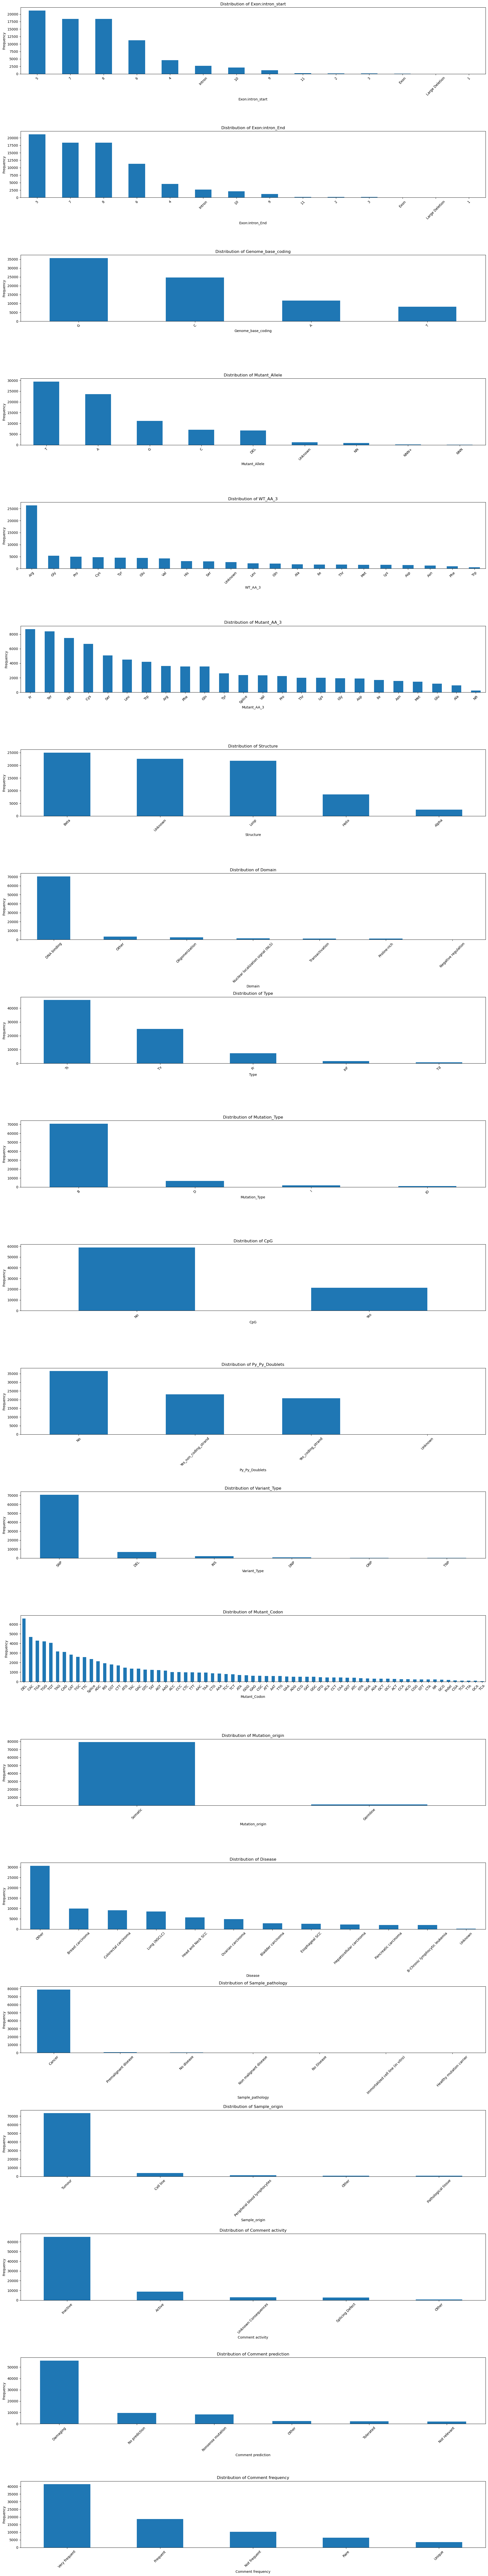

In [52]:
columns_to_plot = ['Exon:intron_start', 'Exon:intron_End',
                   'Genome_base_coding', 'Mutant_Allele', 
                   'WT_AA_3', 'Mutant_AA_3', 'Structure', 'Domain',  
                   'Type', 'Mutation_Type', 'CpG', 
                   'Py_Py_Doublets', 'Variant_Type', 'Mutant_Codon', 
                   'Mutation_origin', 'Disease', 'Sample_pathology', 
                   'Sample_origin', 'Comment activity', 'Comment prediction', 
                   'Comment frequency']

num_rows = (len(columns_to_plot))  # Calculate the number of rows needed for subplots
fig, axes = plt.subplots(num_rows, 1, figsize=(20, num_rows * 5))

for i, col in enumerate(columns_to_plot):
    ax = axes.flatten()[i]
    value_counts = umd_mut_df[col].value_counts()
    value_counts.plot(kind='bar', ax=ax)  
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  
    
plt.tight_layout()
plt.show()


The 5th intron/exon exhibits the highest frequency of mutations, followed by the 7th and the 8th. Among these mutations, the base genome coded most frequently was G, while the highest frequency of the mutant base was T. Additionally, the wild-type sequence encoded Arginine as the predominant amino acid, whereas mutations resulted in a range of different amino acids, with many leading to Frameshift and termination mutant proteins.

Notably, Ts (Transition) mutations, where a pyrimidine (C or T) is substituted by another pyrimidine, or a purine (A or G) is substituted by another purine, were the most prevalent type of mutation. This trend is also reflected in the subsequent plot, where 'B' represents data for Single Nucleotide Variants.

Analysis further revealed that TP53 mutations are less likely to occur at CpG dinucleotide sites and Pyrimidine-Pyrimidine coding sites. Most TP53 mutations are somatic rather than inherited, as indicated in the mutation_origin plot.

Finally, additional graphs illustrate the damaging and pathogenic nature of the majority of TP53 mutations, highlighting their potential clinical significance.

### Visualizing Categorical columns

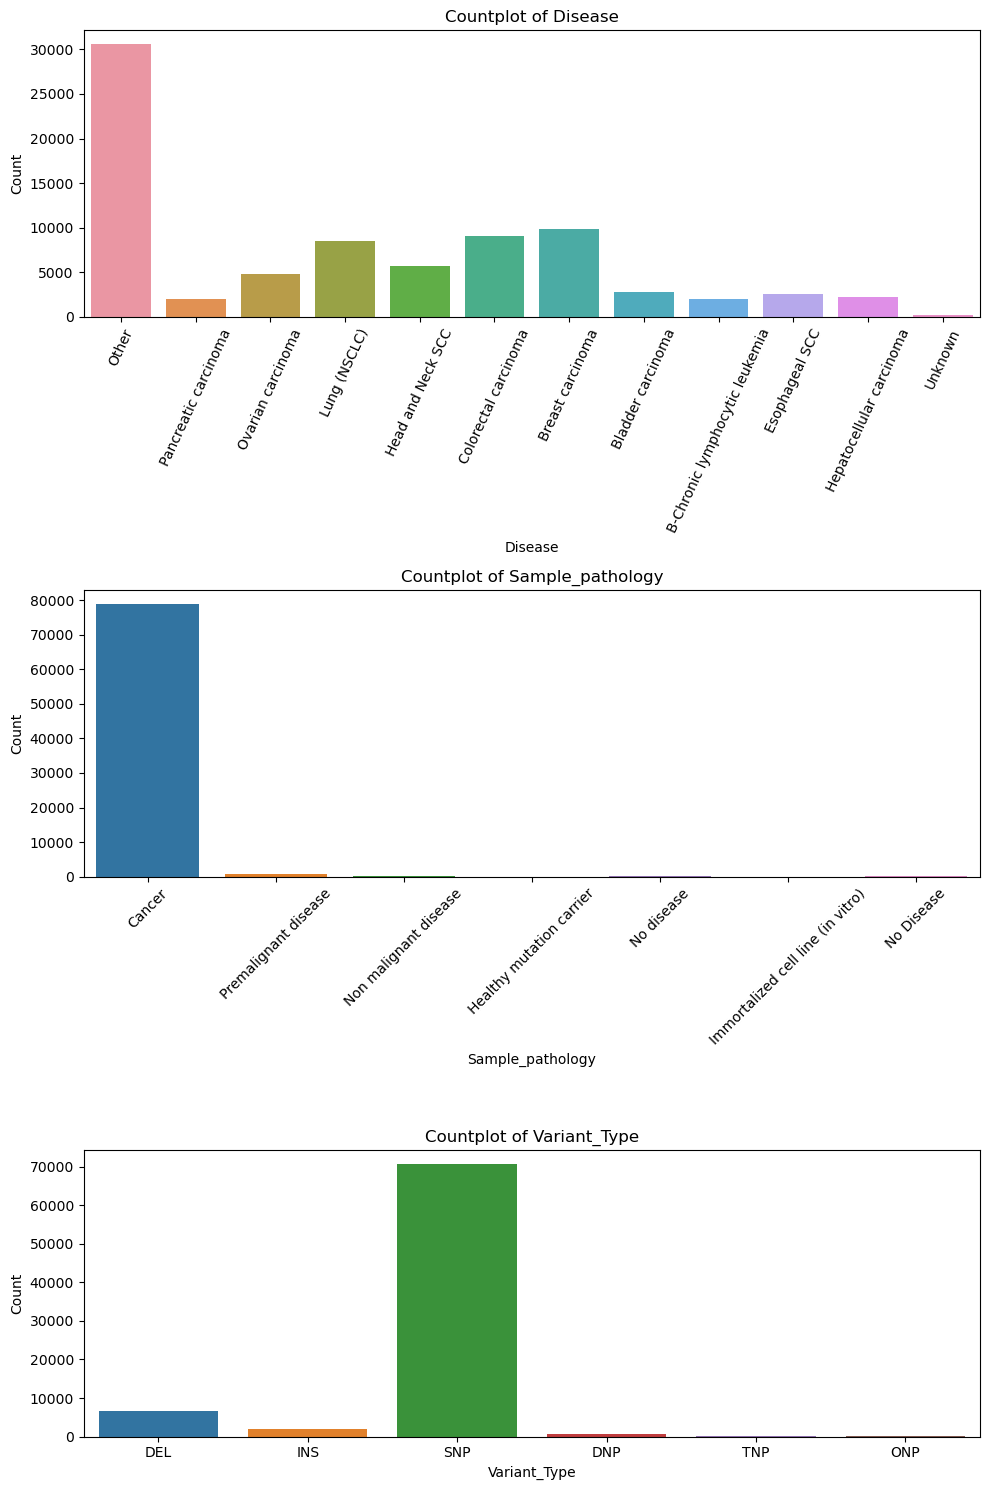

In [53]:
# Define the categorical columns
categorical_columns = ['Disease', 'Sample_pathology', 'Variant_Type']

# Set up subplots for each categorical column
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 15))

# Plot each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=umd_mut_df, ax=axes[i])
    axes[i].set_title(f'Countplot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=65)
    axes[1].tick_params(axis='x', rotation=45)
    axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

This dataset primarily comprises TP53 variants obtained from patients diagnosed with cancer, with a significant emphasis on breast cancer cases, followed by colorectal cancer and non-small cell lung carcinoma. These three cancer types are among the most prevalent worldwide. The dataset includes a wide range of variant types, with the majority being single nucleotide polymorphisms (SNPs), accounting for approximately 70,000 out of the 80,000 data points. Additionally, the dataset contains variants arising from deletions, insertions, as well as di-, tri-, and oligo-nucleotide polymorphisms.

Moreover, while the majority of the data pertains to cancer patients, there is a small proportion representing healthy individuals. This dataset offers a comprehensive overview of TP53 variants across different cancer types and variant types, making it valuable for research and analysis in cancer genomics. The abundance of SNPs suggests a significant role of point mutations in TP53, which is consistent with its well-established role as a tumor suppressor gene frequently mutated in various cancers.

#### Visualizing the columns grouped by Pathogenicity

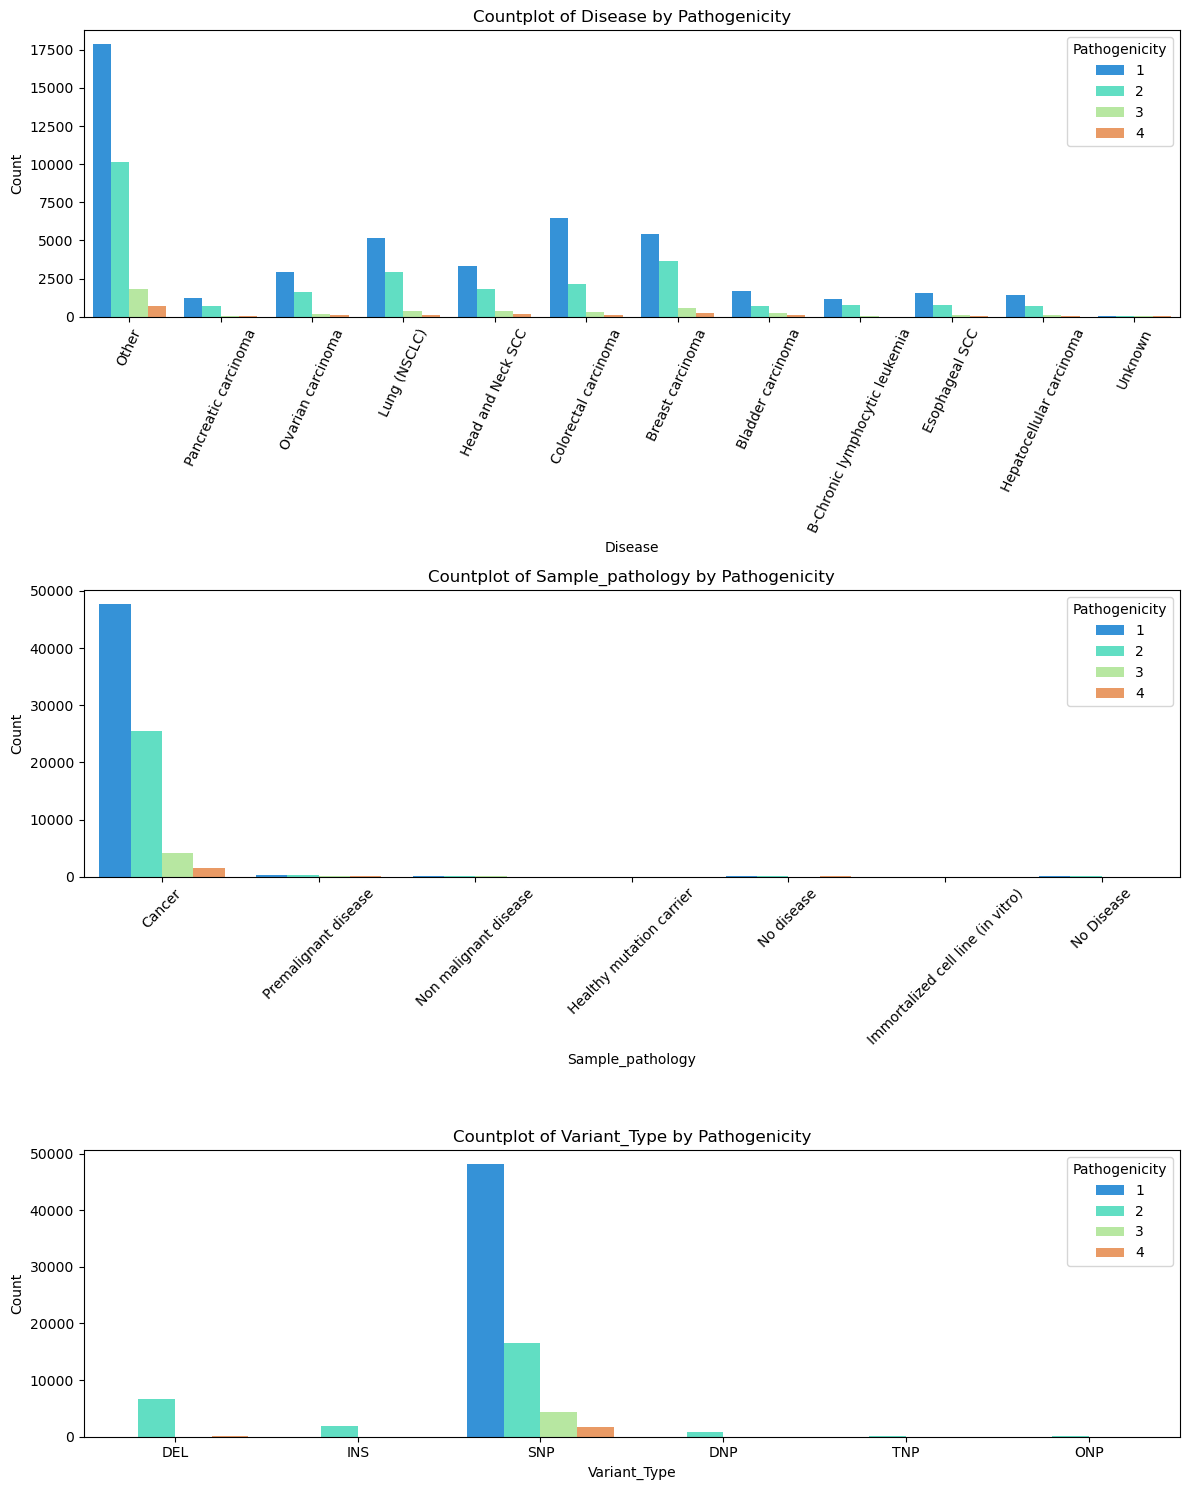

In [54]:
# Define the categorical columns
categorical_columns = ['Disease', 'Sample_pathology', 'Variant_Type']

# Set up subplots for each categorical column
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(12, 15))

# Plot each categorical column separately based on Pathogenicity
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=umd_mut_df, hue='Pathogenicity', ax=axes[i], palette='rainbow')
    axes[i].set_title(f'Countplot of {column} by Pathogenicity')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Pathogenicity')
    axes[0].tick_params(axis='x', rotation=65)
    axes[1].tick_params(axis='x', rotation=45)
    axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


Besides, the class being highly imbalanced because of the Pathogenicity, most of the pathogenic data is from Colorectal, Breast and NSCLC followed by other cancers. The samples from which the most of data is collected undeniably comes from cancer patients followed by probable accidental discoveries through premalignant diseases.

### Visualizing Binary Columns

<Figure size 1000x600 with 0 Axes>

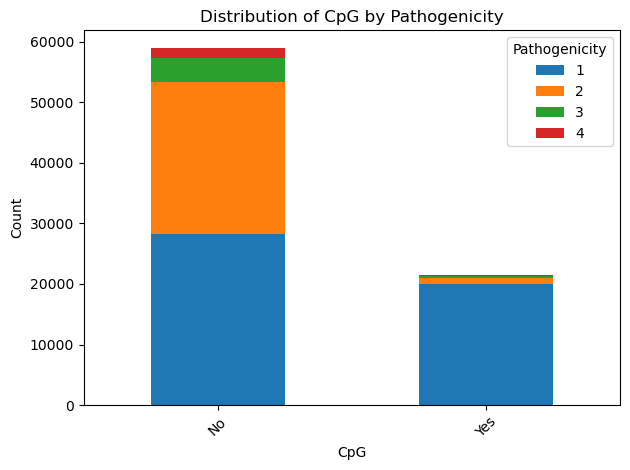

<Figure size 1000x600 with 0 Axes>

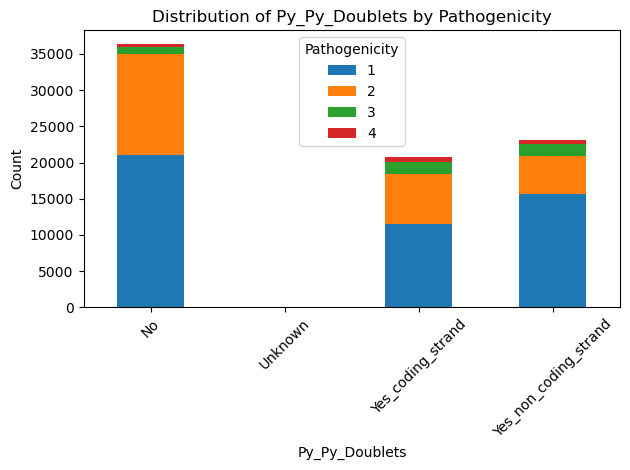

In [55]:
# Stacked bar plot for binary variables
def plot_binary(data, column):
    plt.figure(figsize=(10, 6))
    pd.crosstab(data[column], data['Pathogenicity']).plot(kind='bar', stacked=True)
    plt.title(f'Distribution of {column} by Pathogenicity')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Pathogenicity')
    plt.tight_layout()
    plt.show()

# Plotting binary columns
binary_columns = ['CpG', 'Py_Py_Doublets']
for column in binary_columns:
    plot_binary(umd_mut_df, column)


CG dinucleotide sites are important due to their association with DNA methylation, a crucial epigenetic mechanism regulating gene expression. Methylation of cytosine within CG dinucleotides plays a key role in gene regulation, as hypermethylation often leads to gene silencing, while hypomethylation is associated with gene activation. CG dinucleotide sites are particularly significant in genomic regions known as CpG islands, which are frequently found in gene promoters and are critical for regulating gene expression. Dysregulation of DNA methylation at CG dinucleotide sites is implicated in various diseases, including cancer, where aberrant methylation patterns can lead to oncogene activation or tumor suppressor gene silencing. Understanding the role of CG dinucleotide methylation provides insights into the molecular mechanisms underlying disease pathogenesis and offers potential targets for therapeutic interventions aimed at restoring normal gene expression patterns.

Based on the plot, it can be noted that the transition from C to T or G to A is higher at non CpG sites than CpG sites.

Py Py doublets, which refer to adjacent pyrimidine bases (cytosine and thymine or uracil) in DNA or RNA, are important because they can form stable secondary structures such as hairpins and stem-loops. These secondary structures play crucial roles in various biological processes, including gene expression regulation, RNA splicing, and post-transcriptional modifications. Additionally, Py Py doublets are involved in protein-RNA interactions, where they serve as recognition sites for RNA-binding proteins, influencing mRNA stability and translation.

Based on the second plot, the pathogencity does not seem to be contributed because of the Py-Py doublets regions, which means that eliminating this column might not affect the model in the future steps.

### Visualizing Text Data

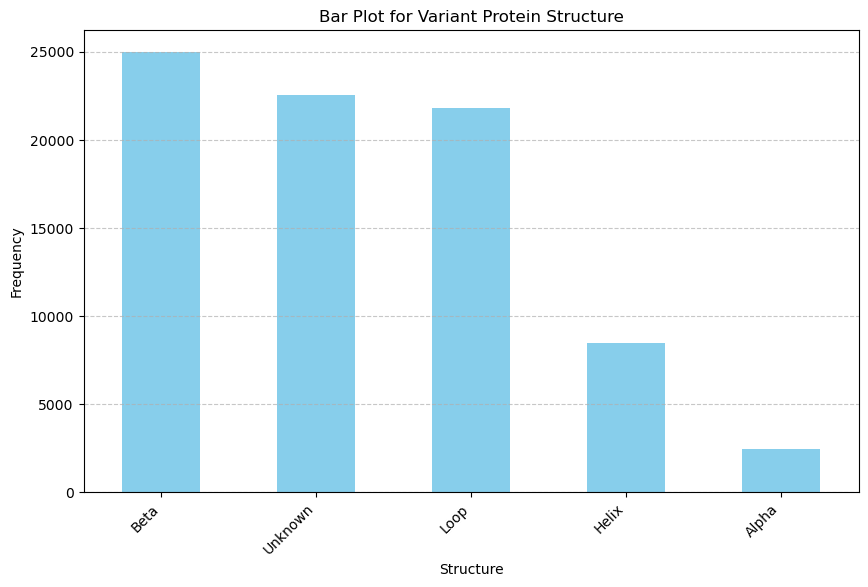

In [56]:
def plot_barplot(data, column):
    # Count the frequency of each value in the column
    value_counts = data[column].value_counts()
    
    # Plot bar plot
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Bar Plot for Variant Protein Structure')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot bar plot for 'Structure' column
plot_barplot(umd_mut_df, 'Structure')


The structure that is more common for the TP53 protein is the Beta fold, a lot of information is unknown for ~23000 rows of data. Let's see how this information will be processed by the model in the future.

### Visualizing Predicted Scores

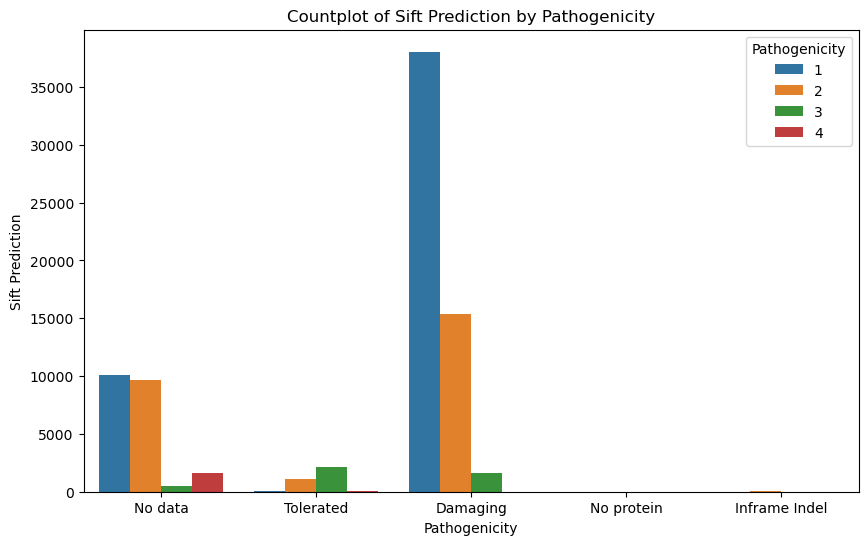

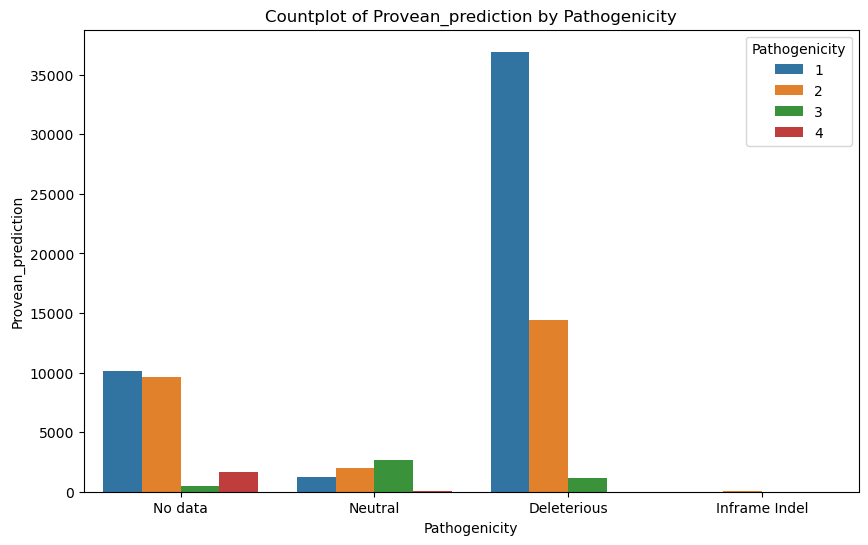

In [57]:
# Boxplot for predicted scores
def plot_predicted_scores(data, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Pathogenicity', data=data)
    plt.title(f'Countplot of {column} by Pathogenicity')
    plt.xlabel('Pathogenicity')
    plt.ylabel(column)
    plt.show()

# Plotting predicted scores
predicted_score_columns = ['Sift Prediction', 'Provean_prediction']
for column in predicted_score_columns:
    plot_predicted_scores(umd_mut_df, column)


Both these plots, show that most of the proteins produced by the mutants are damaging and deleterious, and the information provided looks highly multicolinear.

### Visualizing the Class Imbalance in the target feature

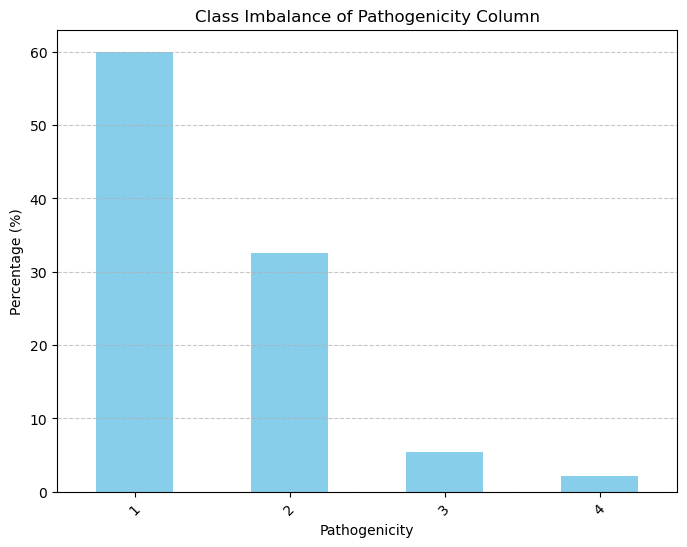

Pathogenicity
1    60.052031
2    32.491878
3     5.351208
4     2.104883
Name: proportion, dtype: float64


In [58]:
# Calculating class imbalance
class_imbalance = umd_mut_df['Pathogenicity'].value_counts(normalize=True) * 100

# Plot class imbalance
plt.figure(figsize=(8, 6))
class_imbalance.plot(kind='bar', color='skyblue')
plt.title('Class Imbalance of Pathogenicity Column')
plt.xlabel('Pathogenicity')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(class_imbalance)


1 = Pathogenic
2 = Likely Pathogenic
3 = VUS
4 = Benign

The pathogenic mutants are the highest class followed by likely pathogenic and possibly pathogenic. VUS represents the insignificant variants and the least in frequency is the non-pathogenic or benign class.

In [59]:
object_columns = umd_mut_df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['Exon:intron_start', 'Exon:intron_End', 'Genome_base_coding',
       'Mutant_Allele', 'WT_AA_3', 'Mutant_AA_3', 'Wt_Codon', 'Mutant_Codon',
       'Structure', 'Domain', 'Type', 'Mutation_Type', 'CpG', 'Py_Py_Doublets',
       'Variant_Type', 'Mutation_origin', 'Disease', 'Sample_pathology',
       'Sample_origin', 'Comment activity', 'Comment prediction',
       'Comment frequency', 'Sift Prediction', 'Provean_prediction',
       'Mutassessor_prediction:', 'Prediction_Label'],
      dtype='object')


In [60]:
numeric_columns = umd_mut_df.select_dtypes(include='number').columns
print(numeric_columns)

Index(['HG38_Start', 'HG38_End', 'Codon', 'Base_Change_Size', 'Ins_Size',
       'Del_Size', 'Records_Number', 'Leukemia_Stat', 'Solid_Stat',
       'Tumor_Stat', 'Cell_line_Stat', 'Somatic_Stat', 'Germline_Stat',
       'Tumor_Repetition', 'Pathogenicity'],
      dtype='object')


## <a id= 'basemodel'></a>[Baseline Modeling](#TOC)

In [61]:
# Droping non-numeric columns
umd_mut_df_numeric = umd_mut_df.drop(columns=umd_mut_df.select_dtypes(exclude='number').columns)

# Assuming X contains your features and y contains your target variable 'Pathogenicity'
X = umd_mut_df_numeric
y = umd_mut_df['Pathogenicity']

# Splitting the data into training and testing sets
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiating a logistic regression
logit = LogisticRegression()

# Fitting the model to train set only
logit.fit(X_train_baseline, y_train_baseline)

# Scoring the model accuracy scores and store in variables for display later
acc_train_baseline = logit.score(X_train_baseline, y_train_baseline)
acc_test_baseline = logit.score(X_test_baseline, y_test_baseline)

# Printing the scores
print(f"Train accuracy: {acc_train_baseline}")
print(f"Test accuracy: {acc_test_baseline}")

Train accuracy: 0.8547044453780205
Test accuracy: 0.8520662185710729


In [62]:
# Dropping non-numeric columns
umd_mut_df_numeric = umd_mut_df.drop(columns=umd_mut_df.select_dtypes(exclude='number').columns)

# Assuming X contains your features and y contains your target variable 'Pathogenicity'
X = umd_mut_df_numeric
y = umd_mut_df['Pathogenicity']

# Splitting the data into training and testing sets
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest classifier
clf = RandomForestClassifier()

# Training the classifier
clf.fit(X_train_baseline, y_train_baseline)

# Making predictions on the training set
y_train_pred_baseline = clf.predict(X_train_baseline)

# Evaluating the model on the training set
train_accuracy = accuracy_score(y_train_baseline, y_train_pred_baseline)
print("Train Accuracy:", train_accuracy)

# Making predictions on the testing set
y_pred_baseline = clf.predict(X_test_baseline)

# Evaluating the model
test_accuracy = accuracy_score(y_test_baseline, y_pred_baseline)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 1.0
Test Accuracy: 1.0


___
## Applying Feature Engineering Techniques

### OHE : Non-numeric features

In [63]:
# Select object columns using loc
object_columns_df = umd_mut_df.loc[:, umd_mut_df.dtypes == 'object']

# Iterate over each object column and print the number of unique values
for col in object_columns_df.columns:
    unique_values = object_columns_df[col].nunique()
    print(f"{col}: {unique_values}")


Exon:intron_start: 14
Exon:intron_End: 14
Genome_base_coding: 4
Mutant_Allele: 9
WT_AA_3: 21
Mutant_AA_3: 24
Wt_Codon: 66
Mutant_Codon: 69
Structure: 5
Domain: 7
Type: 5
Mutation_Type: 4
CpG: 2
Py_Py_Doublets: 4
Variant_Type: 6
Mutation_origin: 2
Disease: 12
Sample_pathology: 7
Sample_origin: 5
Comment activity: 5
Comment prediction: 6
Comment frequency: 5
Sift Prediction: 5
Provean_prediction: 4
Mutassessor_prediction:: 5
Prediction_Label: 3


In [64]:
# Checking the value counts of these columns
for col in object_columns_df.columns:
    print(f"Column: {col}")
    print(object_columns_df[col].value_counts())
    print()

Column: Exon:intron_start
Exon:intron_start
5                 21182
7                 18392
8                 18373
6                 11271
4                  4590
Intron             2653
10                 2114
9                  1192
11                  198
2                   171
3                   163
Exon                 25
Large Deletion       12
1                     1
Name: count, dtype: int64

Column: Exon:intron_End
Exon:intron_End
5                 21183
7                 18369
8                 18366
6                 11286
4                  4568
Intron             2692
10                 2118
9                  1190
11                  200
2                   166
3                   158
Exon                 26
Large Deletion       14
1                     1
Name: count, dtype: int64

Column: Genome_base_coding
Genome_base_coding
G    35739
C    24757
A    11683
T     8158
Name: count, dtype: int64

Column: Mutant_Allele
Mutant_Allele
T          29426
A          23599
G  

In [65]:
# Columns to be one-hot encoded
columns_to_one_hot_encode = [
    'Exon:intron_start', 'Exon:intron_End', 'WT_AA_3', 'Mutant_AA_3', 
    'Wt_Codon', 'Mutant_Codon', 'Structure', 'Type', 'Py_Py_Doublets', 
    'Variant_Type', 'Mutation_origin', 'Disease', 'Sample_pathology', 
    'Sample_origin', 'Comment activity', 'Comment prediction', 'Comment frequency'
]

# One-hot encode the columns
umd_mut_encoded = pd.get_dummies(umd_mut_df, columns=columns_to_one_hot_encode)

# Display the encoded DataFrame
umd_mut_encoded.head()


HG38_Start  HG38_End Genome_base_coding Mutant_Allele  Codon       Domain  \
0     7675167   7675167                  T           DEL  149.0  DNA binding   
1     7675156   7675156                  G             G  152.0  DNA binding   
2     7674181   7674181                  G             A  261.0  DNA binding   
4     7673803   7673803                  C             T  273.0  DNA binding   
5     7673756   7673756                  T           DEL  288.0  DNA binding   

   Base_Change_Size  Ins_Size  Del_Size Mutation_Type  ...  \
0                 0         0         1             D  ...   
1                 0         1         0             I  ...   
2                 1         0         0             B  ...   
4                 1         0         0             B  ...   
5                 0         0         1             D  ...   

  Comment prediction_No prediction  Comment prediction_Nonsense mutation  \
0                             True                                 False   
1                             True                                 False   
2                            False                                 False   
4                            False                                 False   
5                             True                                 False   

   Comment prediction_Not relevant  Comment prediction_Other  \
0                            False                     False   
1                            False                     False   
2                            False                     False   
4                            False                     False   
5                            False                     False   

   Comment prediction_Tolerated  Comment frequency_Frequent  \
0                         False                       False   
1                         False                        True   
2                          True                       False   
4                         False                       False   
5                         False                       False   

   Comment frequency_Not frequent  Comment frequency_Rare  \
0                           False                   False   
1                           False                   False   
2                           False                    True   
4                           False                   False   
5                           False                   False   

  Comment frequency_Unique Comment frequency_Very frequent  
0                    False                            True  
1                    False                           False  
2                    False                           False  
4                    False                            True  
5                     True                           False  

[5 rows x 294 columns]

In [66]:
# Checking the value counts of these columns
for col in umd_mut_encoded.columns:
    print(f"Column: {col}")
    print(umd_mut_encoded[col].value_counts())
    print()

Column: HG38_Start
HG38_Start
7675088    3528
7674220    2975
7673802    2923
7673803    2372
7674221    2120
           ... 
7680590       1
7689424       1
7682274       1
7673452       1
7673283       1
Name: count, Length: 1397, dtype: int64

Column: HG38_End
HG38_End
7675088    3521
7673802    2943
7674220    2939
7673803    2344
7674221    2157
           ... 
7671479       1
7676446       1
7675902       1
7669625       1
7673283       1
Name: count, Length: 1424, dtype: int64

Column: Genome_base_coding
Genome_base_coding
G    35739
C    24757
A    11683
T     8158
Name: count, dtype: int64

Column: Mutant_Allele
Mutant_Allele
T          29426
A          23599
G          11215
C           7044
DEL         6705
Unknown     1207
NN           867
NNN+         203
NNN           71
Name: count, dtype: int64

Column: Codon
Codon
273.0    5311
248.0    5120
175.0    3733
395.0    2376
245.0    2373
         ... 
386.0       1
341.2       1
340.3       1
334.3       1
396.3       1
Nam

Mutant_Codon_CAC
False    75665
True      4672
Name: count, dtype: int64

Column: Mutant_Codon_CAG
Mutant_Codon_CAG
False    77224
True      3113
Name: count, dtype: int64

Column: Mutant_Codon_CAT
Mutant_Codon_CAT
False    77513
True      2824
Name: count, dtype: int64

Column: Mutant_Codon_CCA
Mutant_Codon_CCA
False    80064
True       273
Name: count, dtype: int64

Column: Mutant_Codon_CCC
Mutant_Codon_CCC
False    79338
True       999
Name: count, dtype: int64

Column: Mutant_Codon_CCG
Mutant_Codon_CCG
False    79815
True       522
Name: count, dtype: int64

Column: Mutant_Codon_CCT
Mutant_Codon_CCT
False    79896
True       441
Name: count, dtype: int64

Column: Mutant_Codon_CGA
Mutant_Codon_CGA
False    80212
True       125
Name: count, dtype: int64

Column: Mutant_Codon_CGC
Mutant_Codon_CGC
False    79723
True       614
Name: count, dtype: int64

Column: Mutant_Codon_CGG
Mutant_Codon_CGG
False    80091
True       246
Name: count, dtype: int64

Column: Mutant_Codon_CGT
Mutant_Cod

In [67]:
# Print data types of specific columns using a loop
for col in umd_mut_encoded.columns:
    print(f"{col}: {umd_mut_encoded[col].dtype}")

HG38_Start: int64
HG38_End: int64
Genome_base_coding: object
Mutant_Allele: object
Codon: float64
Domain: object
Base_Change_Size: int64
Ins_Size: int64
Del_Size: int64
Mutation_Type: object
CpG: object
Records_Number: int64
Leukemia_Stat: float64
Solid_Stat: float64
Tumor_Stat: float64
Cell_line_Stat: float64
Somatic_Stat: float64
Germline_Stat: float64
Sift Prediction: object
Provean_prediction: object
Mutassessor_prediction:: object
Prediction_Label: object
Tumor_Repetition: int64
Pathogenicity: int64
Exon:intron_start_1: bool
Exon:intron_start_10: bool
Exon:intron_start_11: bool
Exon:intron_start_2: bool
Exon:intron_start_3: bool
Exon:intron_start_4: bool
Exon:intron_start_5: bool
Exon:intron_start_6: bool
Exon:intron_start_7: bool
Exon:intron_start_8: bool
Exon:intron_start_9: bool
Exon:intron_start_Exon: bool
Exon:intron_start_Intron: bool
Exon:intron_start_Large Deletion: bool
Exon:intron_End_1: bool
Exon:intron_End_10: bool
Exon:intron_End_11: bool
Exon:intron_End_2: bool
Exon:

In [68]:
# Get the columns with boolean dtype
boolean_columns = umd_mut_encoded.select_dtypes(include=['bool']).columns

# Convert boolean columns to binary integer dtype (0 or 1)
umd_mut_encoded[boolean_columns] = umd_mut_encoded[boolean_columns].astype(int)

print(umd_mut_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Index: 80337 entries, 0 to 80405
Columns: 294 entries, HG38_Start to Comment frequency_Very frequent
dtypes: float64(7), int32(270), int64(8), object(9)
memory usage: 98.1+ MB
None


Performing a few sanity checks below

In [69]:
# Checking the unique value counts of these columns
for col in umd_mut_encoded.columns:
    print(f"Column: {col}")
    print(umd_mut_encoded[col].nunique())

Column: HG38_Start
1397
Column: HG38_End
1424
Column: Genome_base_coding
4
Column: Mutant_Allele
9
Column: Codon
407
Column: Domain
7
Column: Base_Change_Size
2
Column: Ins_Size
49
Column: Del_Size
127
Column: Mutation_Type
4
Column: CpG
2
Column: Records_Number
196
Column: Leukemia_Stat
58
Column: Solid_Stat
183
Column: Tumor_Stat
188
Column: Cell_line_Stat
42
Column: Somatic_Stat
196
Column: Germline_Stat
26
Column: Sift Prediction
5
Column: Provean_prediction
4
Column: Mutassessor_prediction:
5
Column: Prediction_Label
3
Column: Tumor_Repetition
20
Column: Pathogenicity
4
Column: Exon:intron_start_1
2
Column: Exon:intron_start_10
2
Column: Exon:intron_start_11
2
Column: Exon:intron_start_2
2
Column: Exon:intron_start_3
2
Column: Exon:intron_start_4
2
Column: Exon:intron_start_5
2
Column: Exon:intron_start_6
2
Column: Exon:intron_start_7
2
Column: Exon:intron_start_8
2
Column: Exon:intron_start_9
2
Column: Exon:intron_start_Exon
2
Column: Exon:intron_start_Intron
2
Column: Exon:intro

In [70]:
umd_mut_encoded.shape

(80337, 294)

In [71]:
umd_mut_encoded['Pathogenicity'].isna().sum()

0

In [72]:
for col in umd_mut_encoded.columns:
    print(f"{col}")

HG38_Start
HG38_End
Genome_base_coding
Mutant_Allele
Codon
Domain
Base_Change_Size
Ins_Size
Del_Size
Mutation_Type
CpG
Records_Number
Leukemia_Stat
Solid_Stat
Tumor_Stat
Cell_line_Stat
Somatic_Stat
Germline_Stat
Sift Prediction
Provean_prediction
Mutassessor_prediction:
Prediction_Label
Tumor_Repetition
Pathogenicity
Exon:intron_start_1
Exon:intron_start_10
Exon:intron_start_11
Exon:intron_start_2
Exon:intron_start_3
Exon:intron_start_4
Exon:intron_start_5
Exon:intron_start_6
Exon:intron_start_7
Exon:intron_start_8
Exon:intron_start_9
Exon:intron_start_Exon
Exon:intron_start_Intron
Exon:intron_start_Large Deletion
Exon:intron_End_1
Exon:intron_End_10
Exon:intron_End_11
Exon:intron_End_2
Exon:intron_End_3
Exon:intron_End_4
Exon:intron_End_5
Exon:intron_End_6
Exon:intron_End_7
Exon:intron_End_8
Exon:intron_End_9
Exon:intron_End_Exon
Exon:intron_End_Intron
Exon:intron_End_Large Deletion
WT_AA_3_Ala
WT_AA_3_Arg
WT_AA_3_Asn
WT_AA_3_Asp
WT_AA_3_Cys
WT_AA_3_Gln
WT_AA_3_Glu
WT_AA_3_Gly
WT_AA_3

Performing a forward selection approach to include the features that have least multicollinearity but are also needed based on domain knowledge for the model prediction.

In [73]:
umd_mut_f1 = umd_mut_encoded[['HG38_Start', 'HG38_End', 'Codon', 'Ins_Size', 'Del_Size',
                              'Leukemia_Stat', 'Solid_Stat', 'Tumor_Stat', 'Cell_line_Stat',
                              'Somatic_Stat', 'Germline_Stat', 'Tumor_Repetition', 'Mutant_Codon_AAA',
                              'Mutant_Codon_AAC', 'Mutant_Codon_AAG', 'Mutant_Codon_AAT', 'Mutant_Codon_ACA',
                              'Mutant_Codon_ACC', 'Mutant_Codon_ACG', 'Mutant_Codon_ACT', 'Mutant_Codon_AGA',
                              'Mutant_Codon_AGC', 'Mutant_Codon_AGG', 'Mutant_Codon_AGT', 'Mutant_Codon_ATA',
                              'Mutant_Codon_ATC', 'Mutant_Codon_ATG', 'Mutant_Codon_ATT', 'Mutant_Codon_CAA',
                              'Mutant_Codon_CAC', 'Mutant_Codon_CAG', 'Mutant_Codon_CAT', 'Mutant_Codon_CCA',
                              'Mutant_Codon_CCC', 'Mutant_Codon_CCG', 'Mutant_Codon_CCT', 'Mutant_Codon_CGA',
                              'Mutant_Codon_CGC', 'Mutant_Codon_CGG', 'Mutant_Codon_CGT', 'Mutant_Codon_CTA',
                              'Mutant_Codon_CTC', 'Mutant_Codon_CTG', 'Mutant_Codon_CTT', 'Mutant_Codon_DEL',
                                'Mutant_Codon_GAA', 'Mutant_Codon_GAC', 'Mutant_Codon_GAG',
                              'Mutant_Codon_GAT', 'Mutant_Codon_GCA', 'Mutant_Codon_GCC', 'Mutant_Codon_GCG',
                              'Mutant_Codon_GCT', 'Mutant_Codon_GGA', 'Mutant_Codon_GGC', 'Mutant_Codon_GGG',
                              'Mutant_Codon_GGT', 'Mutant_Codon_GTA', 'Mutant_Codon_GTC', 'Mutant_Codon_GTG',
                              'Mutant_Codon_GTT', 'Mutant_Codon_INS', 'Mutant_Codon_Indel', 
                              'Mutant_Codon_NR', 'Mutant_Codon_Splice', 'Mutant_Codon_TAA', 'Mutant_Codon_TAC',
                              'Mutant_Codon_TAG', 'Mutant_Codon_TAT', 'Mutant_Codon_TCA', 'Mutant_Codon_TCC',
                              'Mutant_Codon_TCG', 'Mutant_Codon_TCT', 'Mutant_Codon_TGA', 'Mutant_Codon_TGC',
                              'Mutant_Codon_TGG', 'Mutant_Codon_TGT', 'Mutant_Codon_TTA','Mutant_Codon_TTC',
                              'Mutant_Codon_TTG', 'Mutant_Codon_TTT', 'Pathogenicity']]
umd_mut_f1.shape


(80337, 82)

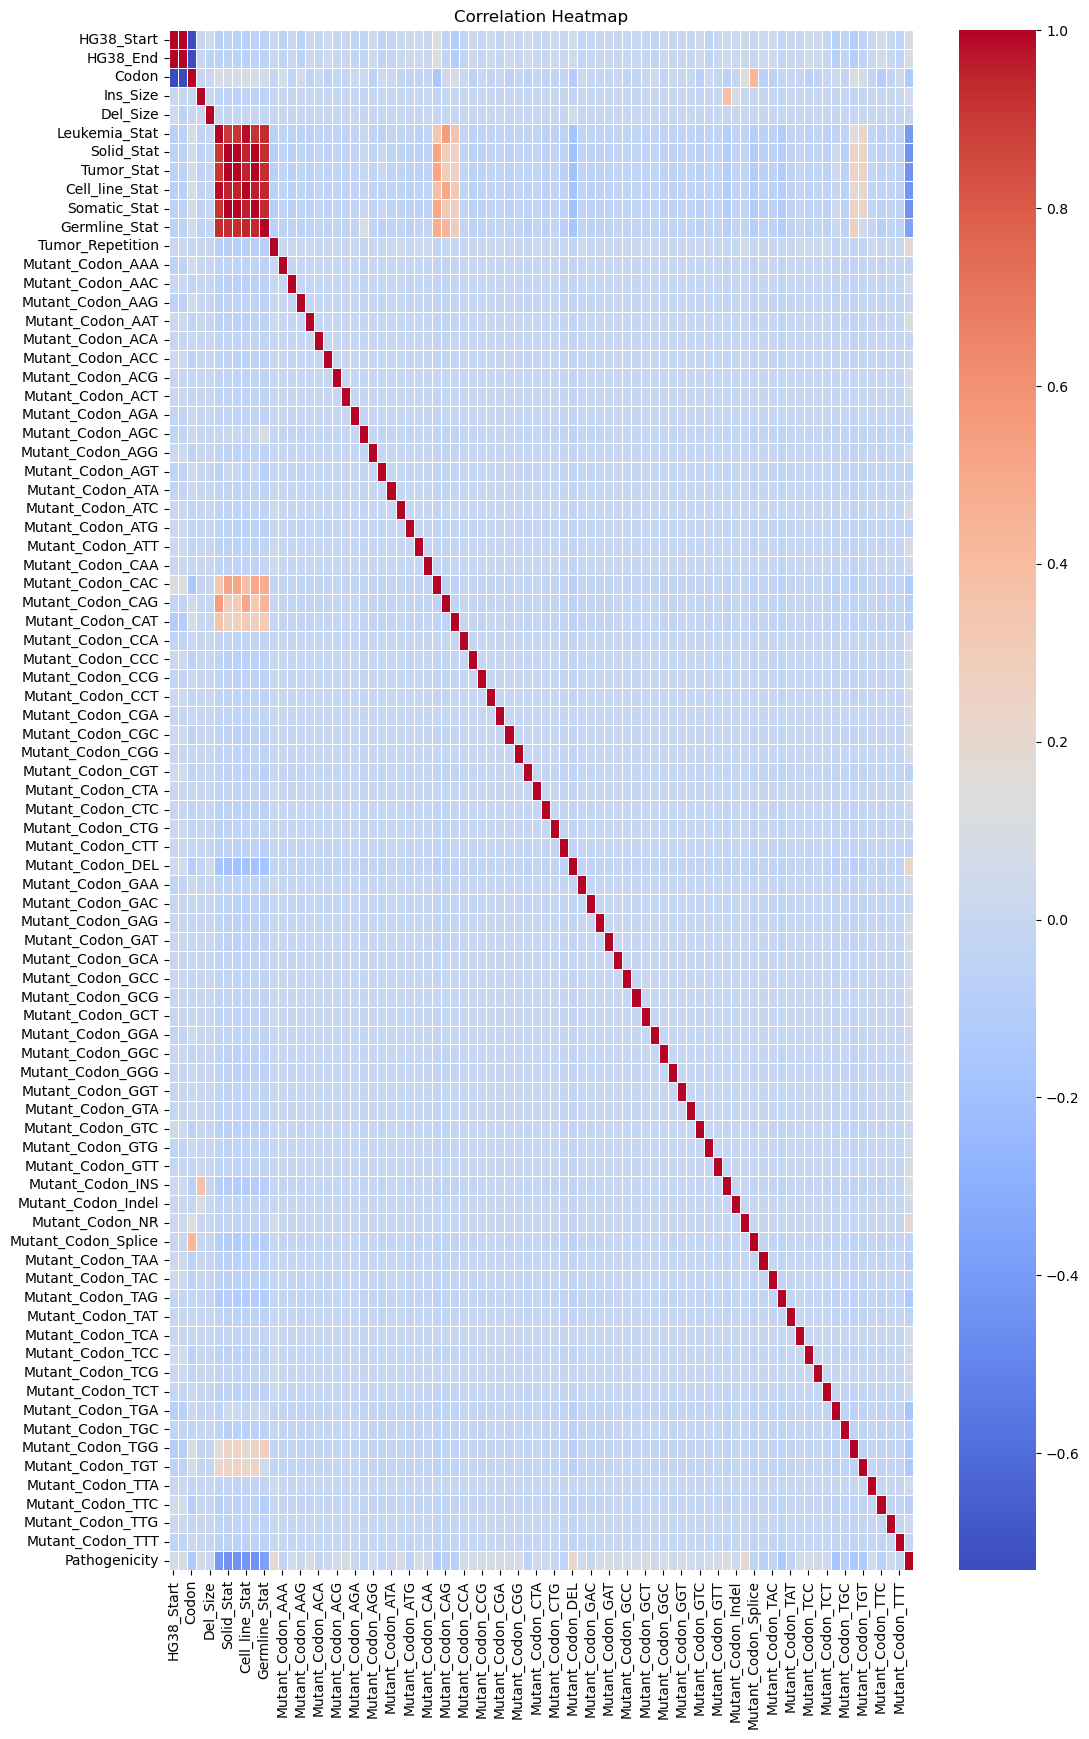

In [74]:
# Compute correlation matrix
correlation_matrix = umd_mut_f1.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 20))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [75]:
umd_mut_f1 = umd_mut_encoded[['HG38_End', 'Codon', 'Ins_Size', 'Del_Size', 'Tumor_Repetition', 'Mutant_Codon_AAA',
                              'Mutant_Codon_AAC', 'Mutant_Codon_AAG', 'Mutant_Codon_AAT', 'Mutant_Codon_ACA',
                              'Mutant_Codon_ACC', 'Mutant_Codon_ACG', 'Mutant_Codon_ACT', 'Mutant_Codon_AGA',
                              'Mutant_Codon_AGC', 'Mutant_Codon_AGG', 'Mutant_Codon_AGT', 'Mutant_Codon_ATA',
                              'Mutant_Codon_ATC', 'Mutant_Codon_ATG', 'Mutant_Codon_ATT', 'Mutant_Codon_CAA',
                              'Mutant_Codon_CAC', 'Mutant_Codon_CAG', 'Mutant_Codon_CAT', 'Mutant_Codon_CCA',
                              'Mutant_Codon_CCC', 'Mutant_Codon_CCG', 'Mutant_Codon_CCT', 'Mutant_Codon_CGA',
                              'Mutant_Codon_CGC', 'Mutant_Codon_CGG', 'Mutant_Codon_CGT', 'Mutant_Codon_CTA',
                              'Mutant_Codon_CTC', 'Mutant_Codon_CTG', 'Mutant_Codon_CTT', 'Mutant_Codon_DEL',
                              'Mutant_Codon_GAA', 'Mutant_Codon_GAC', 'Mutant_Codon_GAG',
                              'Mutant_Codon_GAT', 'Mutant_Codon_GCA', 'Mutant_Codon_GCC', 'Mutant_Codon_GCG',
                              'Mutant_Codon_GCT', 'Mutant_Codon_GGA', 'Mutant_Codon_GGC', 'Mutant_Codon_GGG',
                              'Mutant_Codon_GGT', 'Mutant_Codon_GTA', 'Mutant_Codon_GTC', 'Mutant_Codon_GTG',
                              'Mutant_Codon_GTT', 'Mutant_Codon_INS', 'Mutant_Codon_Indel', 
                              'Mutant_Codon_NR', 'Mutant_Codon_Splice', 'Mutant_Codon_TAA', 'Mutant_Codon_TAC',
                              'Mutant_Codon_TAG', 'Mutant_Codon_TAT', 'Mutant_Codon_TCA', 'Mutant_Codon_TCC',
                              'Mutant_Codon_TCG', 'Mutant_Codon_TCT', 'Mutant_Codon_TGA', 'Mutant_Codon_TGC',
                              'Mutant_Codon_TGG', 'Mutant_Codon_TGT', 'Mutant_Codon_TTA','Mutant_Codon_TTC',
                              'Mutant_Codon_TTG', 'Mutant_Codon_TTT', 'Pathogenicity']]
umd_mut_f1.shape


(80337, 75)

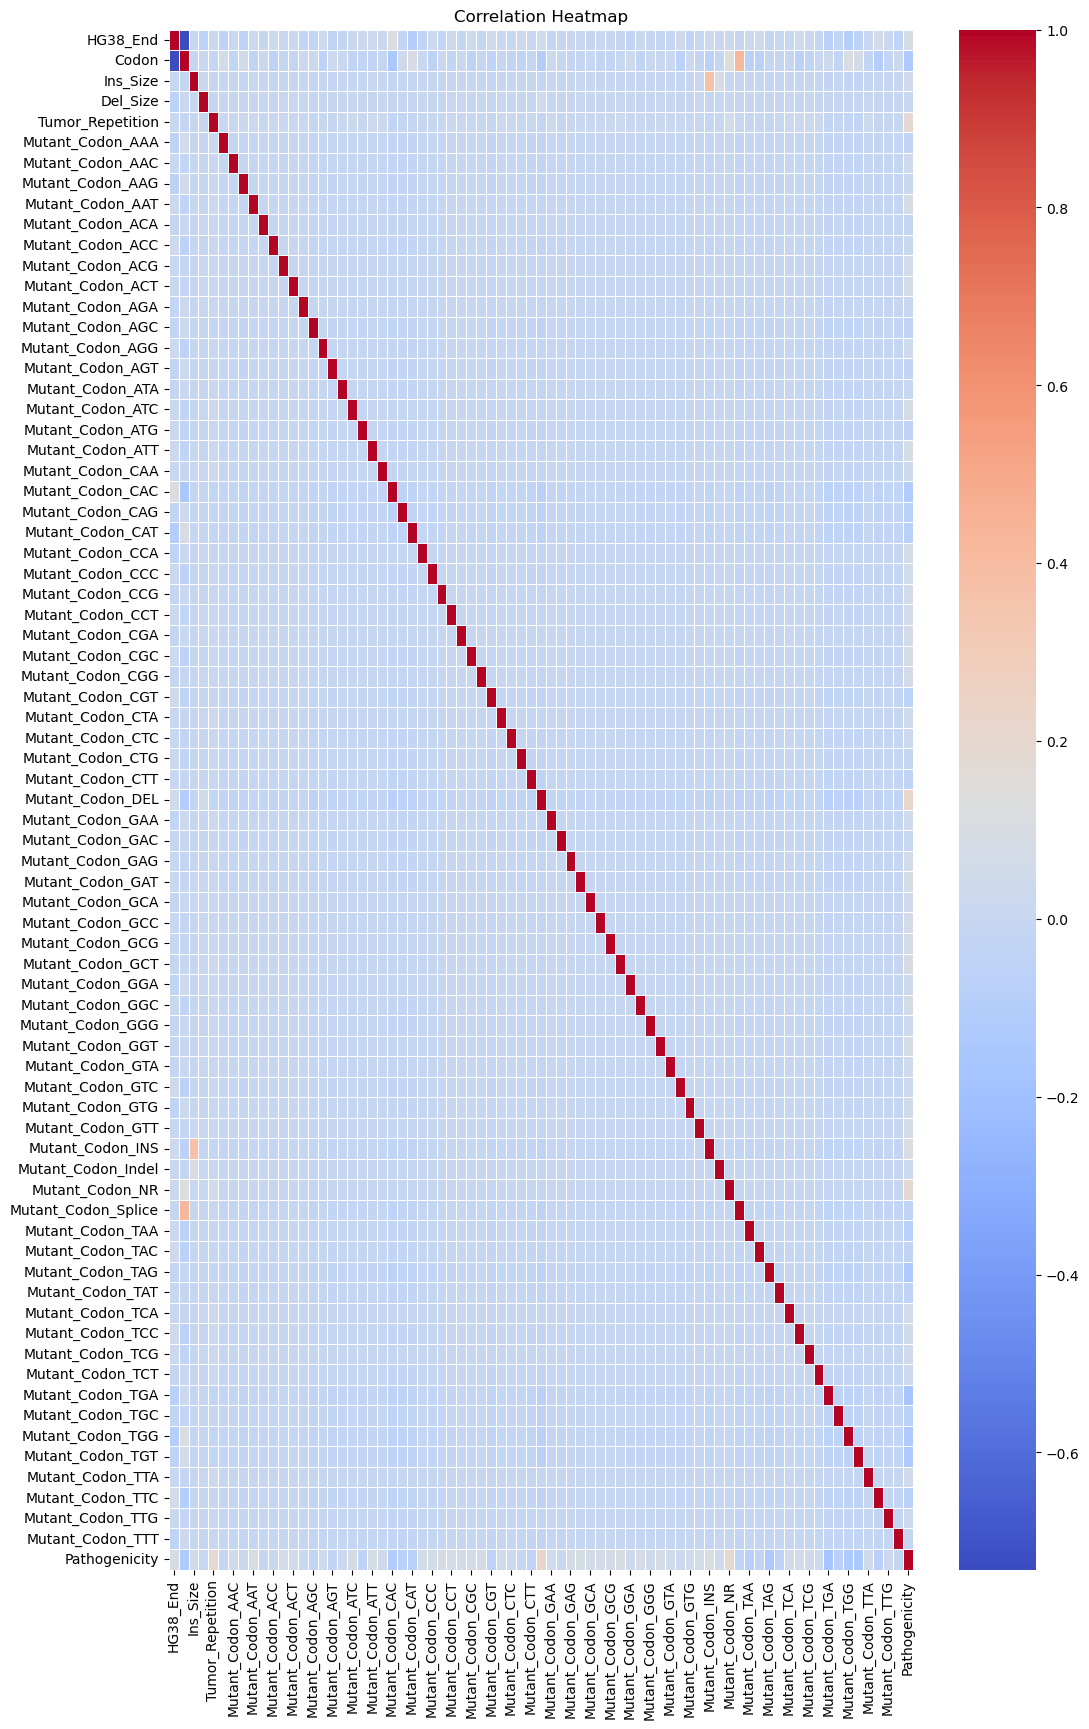

In [76]:
# Compute correlation matrix
correlation_matrix = umd_mut_f1.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 20))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [77]:
# Check for missing values in each column
missing_values = umd_mut_f1.isnull().sum()

# Print missing values count for each column
for col, missing_count in missing_values.items():
    print(f"Column '{col}': {missing_count}")


Column 'HG38_End': 0
Column 'Codon': 0
Column 'Ins_Size': 0
Column 'Del_Size': 0
Column 'Tumor_Repetition': 0
Column 'Mutant_Codon_AAA': 0
Column 'Mutant_Codon_AAC': 0
Column 'Mutant_Codon_AAG': 0
Column 'Mutant_Codon_AAT': 0
Column 'Mutant_Codon_ACA': 0
Column 'Mutant_Codon_ACC': 0
Column 'Mutant_Codon_ACG': 0
Column 'Mutant_Codon_ACT': 0
Column 'Mutant_Codon_AGA': 0
Column 'Mutant_Codon_AGC': 0
Column 'Mutant_Codon_AGG': 0
Column 'Mutant_Codon_AGT': 0
Column 'Mutant_Codon_ATA': 0
Column 'Mutant_Codon_ATC': 0
Column 'Mutant_Codon_ATG': 0
Column 'Mutant_Codon_ATT': 0
Column 'Mutant_Codon_CAA': 0
Column 'Mutant_Codon_CAC': 0
Column 'Mutant_Codon_CAG': 0
Column 'Mutant_Codon_CAT': 0
Column 'Mutant_Codon_CCA': 0
Column 'Mutant_Codon_CCC': 0
Column 'Mutant_Codon_CCG': 0
Column 'Mutant_Codon_CCT': 0
Column 'Mutant_Codon_CGA': 0
Column 'Mutant_Codon_CGC': 0
Column 'Mutant_Codon_CGG': 0
Column 'Mutant_Codon_CGT': 0
Column 'Mutant_Codon_CTA': 0
Column 'Mutant_Codon_CTC': 0
Column 'Mutant_Codon

In [78]:
# Compute Variance Inflation Factor (VIF)
# VIF requires a DataFrame with only numerical variables
numerical_variables = umd_mut_f1.select_dtypes(include=['float64', 'int64', 'int'])

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = numerical_variables.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_variables.values, i) for i in range(numerical_variables.shape[1])]



In [79]:
# Print VIF
print("\nVariance Inflation Factor (VIF):")
for index, row in vif_data.iterrows():
    print(f"{row['Variable']}: {row['VIF']:.2f}")


Variance Inflation Factor (VIF):
HG38_End: 3.19
Codon: 4.36
Ins_Size: 1.17
Del_Size: 1.01
Tumor_Repetition: 1.05
Mutant_Codon_AAA: 1929600.59
Mutant_Codon_AAC: 2204023.66
Mutant_Codon_AAG: 2616541.94
Mutant_Codon_AAT: 1375647.28
Mutant_Codon_ACA: 1014347.04
Mutant_Codon_ACC: 2291629.36
Mutant_Codon_ACG: 592098.85
Mutant_Codon_ACT: 688139.45
Mutant_Codon_AGA: 733822.91
Mutant_Codon_AGC: 4760950.33
Mutant_Codon_AGG: 1209884.16
Mutant_Codon_AGT: 2746190.56
Mutant_Codon_ATA: 1574981.94
Mutant_Codon_ATC: 936851.04
Mutant_Codon_ATG: 3320352.56
Mutant_Codon_ATT: 1377911.19
Mutant_Codon_CAA: 1002978.44
Mutant_Codon_CAC: 10130835.87
Mutant_Codon_CAG: 6889610.63
Mutant_Codon_CAT: 6273346.41
Mutant_Codon_CCA: 626351.86
Mutant_Codon_CCC: 2271356.61
Mutant_Codon_CCG: 1194008.88
Mutant_Codon_CCT: 1009786.76
Mutant_Codon_CGA: 287352.26
Mutant_Codon_CGC: 1402817.99
Mutant_Codon_CGG: 564624.80
Mutant_Codon_CGT: 4038268.81
Mutant_Codon_CTA: 555518.94
Mutant_Codon_CTC: 2251104.01
Mutant_Codon_CTG: 19745

In [80]:
# Assuming 'data' is your DataFrame with numerical columns
# Exclude the target variable from the PCA
X = umd_mut_f1.drop(columns=['Pathogenicity'])
y = umd_mut_f1['Pathogenicity']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features by scaling them to have mean=0 and variance=1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize PCA with desired number of components
n_components = 40  
pca = PCA(n_components=n_components)

# Fit PCA to the training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)



In [81]:
# Initialize and fit logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warnings occur
model.fit(X_train_pca, y_train)

# Predict on the train set
y_train_pred = model.predict(X_train_pca)

# Predict on the test set
y_test_pred = model.predict(X_test_pca)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy of the train: {accuracy_train:.2f}")
print(f"Accuracy of the test: {accuracy_test:.2f}")

# Print classification report
print("Classification report for the train set:")
print(classification_report(y_train, y_train_pred))
print("Classification report for the test set:")
print(classification_report(y_test, y_test_pred))


Accuracy of the train: 0.76
Accuracy of the test: 0.75
Classification report for the train set:
              precision    recall  f1-score   support

           1       0.78      0.92      0.85     38595
           2       0.71      0.62      0.66     20882
           3       0.41      0.04      0.07      3439
           4       0.71      0.16      0.26      1353

    accuracy                           0.76     64269
   macro avg       0.65      0.43      0.46     64269
weighted avg       0.74      0.76      0.73     64269

Classification report for the test set:
              precision    recall  f1-score   support

           1       0.78      0.91      0.84      9649
           2       0.70      0.62      0.66      5221
           3       0.35      0.04      0.07       860
           4       0.68      0.13      0.22       338

    accuracy                           0.75     16068
   macro avg       0.63      0.43      0.45     16068
weighted avg       0.73      0.75      0.73     1

In [82]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the PCA-transformed training data
rf_classifier.fit(X_train_pca, y_train)

# Predict on the train data
y_pred_train_rf = rf_classifier.predict(X_train_pca)

# Evaluate the model on train data
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
print(f"Random Forest Train Accuracy: {accuracy_train_rf:.2f}")

# Print classification report for train data
print("Classification Report for Train Data:")
print(classification_report(y_train, y_pred_train_rf))

# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test_pca)

# Evaluate the model on test data
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Test Accuracy: {accuracy_rf:.2f}")

# Print classification report for test data
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred_rf))


Random Forest Train Accuracy: 0.99
Classification Report for Train Data:
              precision    recall  f1-score   support

           1       0.99      1.00      1.00     38595
           2       0.99      0.99      0.99     20882
           3       1.00      1.00      1.00      3439
           4       1.00      1.00      1.00      1353

    accuracy                           0.99     64269
   macro avg       1.00      1.00      1.00     64269
weighted avg       0.99      0.99      0.99     64269


Random Forest Test Accuracy: 0.48

Classification Report for Test Data:
              precision    recall  f1-score   support

           1       0.93      0.29      0.45      9649
           2       0.48      0.85      0.61      5221
           3       0.12      0.48      0.19       860
           4       0.45      0.23      0.31       338

    accuracy                           0.48     16068
   macro avg       0.49      0.46      0.39     16068
weighted avg       0.73      0.48      

In [83]:
# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the PCA-transformed training data
dt_classifier.fit(X_train_pca, y_train)

# Predict on the train data
y_pred_train_dt = dt_classifier.predict(X_train_pca)

# Evaluate the model on train data
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
print(f"Decision Tree Train Accuracy: {accuracy_train_dt:.2f}")

# Print classification report for train data
print("Classification Report for Train Data:")
print(classification_report(y_train, y_pred_train_dt))

# Predict on the test data
y_pred_dt = dt_classifier.predict(X_test_pca)

# Evaluate the model on test data
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nDecision Tree Test Accuracy: {accuracy_dt:.2f}")

# Print classification report for test data
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Train Accuracy: 0.99
Classification Report for Train Data:
              precision    recall  f1-score   support

           1       0.99      1.00      1.00     38595
           2       0.99      0.99      0.99     20882
           3       1.00      1.00      1.00      3439
           4       1.00      1.00      1.00      1353

    accuracy                           0.99     64269
   macro avg       1.00      1.00      1.00     64269
weighted avg       0.99      0.99      0.99     64269


Decision Tree Test Accuracy: 0.45

Classification Report for Test Data:
              precision    recall  f1-score   support

           1       0.89      0.34      0.49      9649
           2       0.49      0.66      0.56      5221
           3       0.11      0.46      0.17       860
           4       0.06      0.30      0.10       338

    accuracy                           0.45     16068
   macro avg       0.39      0.44      0.33     16068
weighted avg       0.70      0.45      

### Adding Disease as a feature to see if the model does a better job with this

In [84]:
umd_mut_f2 = umd_mut_encoded[['HG38_Start', 'Tumor_Repetition', 'Mutant_Codon_AAA',
                              'Mutant_Codon_AAC', 'Mutant_Codon_AAG', 'Mutant_Codon_AAT', 'Mutant_Codon_ACA',
                              'Mutant_Codon_ACC', 'Mutant_Codon_ACG', 'Mutant_Codon_ACT', 'Mutant_Codon_AGA',
                              'Mutant_Codon_AGC', 'Mutant_Codon_AGG', 'Mutant_Codon_AGT', 'Mutant_Codon_ATA',
                              'Mutant_Codon_ATC', 'Mutant_Codon_ATG', 'Mutant_Codon_ATT', 'Mutant_Codon_CAA',
                              'Mutant_Codon_CAC', 'Mutant_Codon_CAG', 'Mutant_Codon_CAT', 'Mutant_Codon_CCA',
                              'Mutant_Codon_CCC', 'Mutant_Codon_CCG', 'Mutant_Codon_CCT', 'Mutant_Codon_CGA',
                              'Mutant_Codon_CGC', 'Mutant_Codon_CGG', 'Mutant_Codon_CGT', 'Mutant_Codon_CTA',
                              'Mutant_Codon_CTC', 'Mutant_Codon_CTG', 'Mutant_Codon_CTT', 'Mutant_Codon_DEL',
                              'Mutant_Codon_GAA', 'Mutant_Codon_GAC', 'Mutant_Codon_GAG',
                              'Mutant_Codon_GAT', 'Mutant_Codon_GCA', 'Mutant_Codon_GCC', 'Mutant_Codon_GCG',
                              'Mutant_Codon_GCT', 'Mutant_Codon_GGA', 'Mutant_Codon_GGC', 'Mutant_Codon_GGG',
                              'Mutant_Codon_GGT', 'Mutant_Codon_GTA', 'Mutant_Codon_GTC', 'Mutant_Codon_GTG',
                              'Mutant_Codon_GTT', 'Mutant_Codon_INS', 'Mutant_Codon_Indel',
                              #'Mutant_Codon_NR', 
                              'Mutant_Codon_Splice', 'Mutant_Codon_TAA', 'Mutant_Codon_TAC',
                              'Mutant_Codon_TAG', 'Mutant_Codon_TAT', 'Mutant_Codon_TCA', 'Mutant_Codon_TCC',
                              'Mutant_Codon_TCG', 'Mutant_Codon_TCT', 'Mutant_Codon_TGA', 'Mutant_Codon_TGC',
                              'Mutant_Codon_TGG', 'Mutant_Codon_TGT', 'Mutant_Codon_TTA','Mutant_Codon_TTC',
                              'Mutant_Codon_TTG', 'Mutant_Codon_TTT', 'Disease_B-Chronic lymphocytic leukemia',
                              'Disease_Bladder carcinoma', 'Disease_Breast carcinoma', 'Disease_Colorectal carcinoma', 
                              'Disease_Esophageal SCC', 'Disease_Head and Neck SCC', 'Disease_Hepatocellular carcinoma', 
                              'Disease_Lung (NSCLC)', 
                              #'Disease_Other', 
                              'Disease_Ovarian carcinoma', 
                              'Disease_Pancreatic carcinoma', 'Disease_Unknown', 'Pathogenicity']]
umd_mut_f2.shape


(80337, 82)

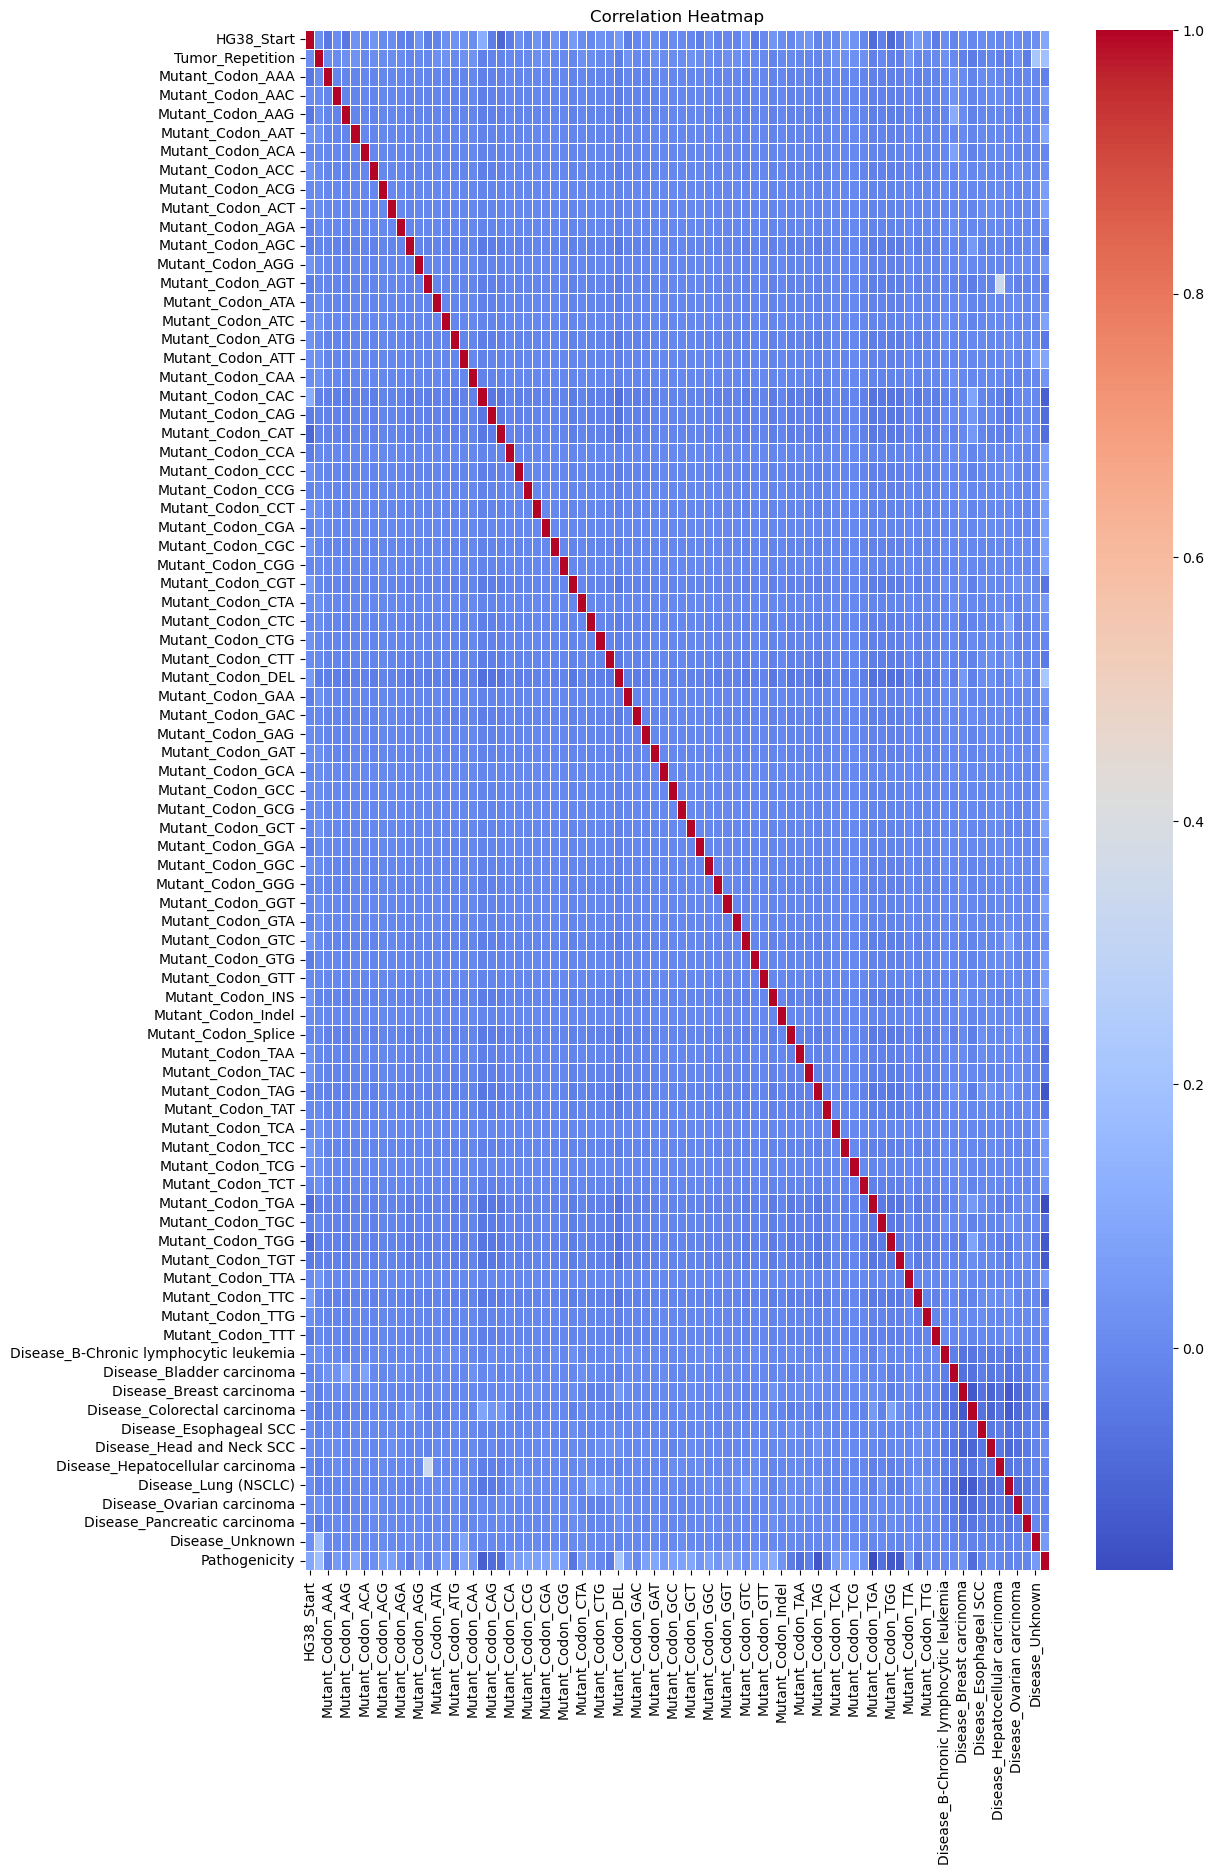

In [85]:
# Compute correlation matrix
correlation_matrix = umd_mut_f2.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 20))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [86]:
# Compute Variance Inflation Factor (VIF)
# VIF requires a DataFrame with only numerical variables
numerical_variables = umd_mut_f2.select_dtypes(include=['float64', 'int64', 'int'])

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = numerical_variables.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_variables.values, i) for i in range(numerical_variables.shape[1])]



In [87]:
# Print VIF
print("\nVariance Inflation Factor (VIF):")
for index, row in vif_data.iterrows():
    print(f"{row['Variable']}: {row['VIF']:.2f}")


Variance Inflation Factor (VIF):
HG38_Start: 411.44
Tumor_Repetition: 1.11
Mutant_Codon_AAA: 4.94
Mutant_Codon_AAC: 5.41
Mutant_Codon_AAG: 6.31
Mutant_Codon_AAT: 3.71
Mutant_Codon_ACA: 3.07
Mutant_Codon_ACC: 5.63
Mutant_Codon_ACG: 2.17
Mutant_Codon_ACT: 2.35
Mutant_Codon_AGA: 2.48
Mutant_Codon_AGC: 10.73
Mutant_Codon_AGG: 3.42
Mutant_Codon_AGT: 6.73
Mutant_Codon_ATA: 4.19
Mutant_Codon_ATC: 2.85
Mutant_Codon_ATG: 7.81
Mutant_Codon_ATT: 3.73
Mutant_Codon_CAA: 3.00
Mutant_Codon_CAC: 21.88
Mutant_Codon_CAG: 15.17
Mutant_Codon_CAT: 13.90
Mutant_Codon_CCA: 2.23
Mutant_Codon_CCC: 5.54
Mutant_Codon_CCG: 3.36
Mutant_Codon_CCT: 3.00
Mutant_Codon_CGA: 1.56
Mutant_Codon_CGC: 3.78
Mutant_Codon_CGG: 2.11
Mutant_Codon_CGT: 9.30
Mutant_Codon_CTA: 2.10
Mutant_Codon_CTC: 5.54
Mutant_Codon_CTG: 5.02
Mutant_Codon_CTT: 8.87
Mutant_Codon_DEL: 28.76
Mutant_Codon_GAA: 3.52
Mutant_Codon_GAC: 7.30
Mutant_Codon_GAG: 3.88
Mutant_Codon_GAT: 3.32
Mutant_Codon_GCA: 1.44
Mutant_Codon_GCC: 2.42
Mutant_Codon_GCG: 1.99

In [88]:
# Assuming 'data' is your DataFrame with numerical columns
# Exclude the target variable from the PCA
X = umd_mut_f2.drop(columns=['Pathogenicity'])
y = umd_mut_f2['Pathogenicity']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features by scaling them to have mean=0 and variance=1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize PCA with desired number of components
n_components = 40  
pca = PCA(n_components=n_components)

# Fit PCA to the training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)



In [89]:
# Initialize and fit logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warnings occur
model.fit(X_train_pca, y_train)

# Predict on the train set
y_train_pred = model.predict(X_train_pca)

# Predict on the test set
y_test_pred = model.predict(X_test_pca)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy of the train: {accuracy_train:.2f}")
print(f"Accuracy of the test: {accuracy_test:.2f}")

# Print classification report
print("Classification report for the train set:")
print(classification_report(y_train, y_train_pred))
print("Classification report for the test set:")
print(classification_report(y_test, y_test_pred))


Accuracy of the train: 0.75
Accuracy of the test: 0.74
Classification report for the train set:
              precision    recall  f1-score   support

           1       0.76      0.93      0.84     38595
           2       0.71      0.58      0.64     20882
           3       0.41      0.05      0.08      3439
           4       0.36      0.03      0.06      1353

    accuracy                           0.75     64269
   macro avg       0.56      0.40      0.40     64269
weighted avg       0.72      0.75      0.72     64269

Classification report for the test set:
              precision    recall  f1-score   support

           1       0.76      0.91      0.83      9649
           2       0.70      0.59      0.64      5221
           3       0.39      0.05      0.08       860
           4       0.52      0.04      0.07       338

    accuracy                           0.74     16068
   macro avg       0.59      0.40      0.41     16068
weighted avg       0.72      0.74      0.71     1

In [90]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the PCA-transformed training data
rf_classifier.fit(X_train_pca, y_train)

# Predict on the train data
y_pred_train_rf = rf_classifier.predict(X_train_pca)

# Evaluate the model on train data
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
print(f"Random Forest Train Accuracy: {accuracy_train_rf:.2f}")

# Print classification report for train data
print("Classification Report for Train Data:")
print(classification_report(y_train, y_pred_train_rf))

# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test_pca)

# Evaluate the model on test data
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Test Accuracy: {accuracy_rf:.2f}")

# Print classification report for test data
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred_rf))


Random Forest Train Accuracy: 0.99
Classification Report for Train Data:
              precision    recall  f1-score   support

           1       0.99      1.00      1.00     38595
           2       0.99      0.99      0.99     20882
           3       1.00      1.00      1.00      3439
           4       0.99      0.99      0.99      1353

    accuracy                           0.99     64269
   macro avg       1.00      0.99      0.99     64269
weighted avg       0.99      0.99      0.99     64269


Random Forest Test Accuracy: 0.63

Classification Report for Test Data:
              precision    recall  f1-score   support

           1       0.89      0.54      0.67      9649
           2       0.48      0.87      0.62      5221
           3       0.37      0.30      0.33       860
           4       0.44      0.22      0.29       338

    accuracy                           0.63     16068
   macro avg       0.54      0.48      0.48     16068
weighted avg       0.72      0.63      

In [91]:
umd_mut_f3 = umd_mut_encoded[['HG38_Start', 'Mutant_Codon_AAA',
                              'Mutant_Codon_AAC', 'Mutant_Codon_AAG', 'Mutant_Codon_AAT', 'Mutant_Codon_ACA',
                              'Mutant_Codon_ACC', 'Mutant_Codon_ACG', 'Mutant_Codon_ACT', 'Mutant_Codon_AGA',
                              'Mutant_Codon_AGC', 'Mutant_Codon_AGG', 'Mutant_Codon_AGT', 'Mutant_Codon_ATA',
                              'Mutant_Codon_ATC', 'Mutant_Codon_ATG', 'Mutant_Codon_ATT', 'Mutant_Codon_CAA',
                              'Mutant_Codon_CAC', 'Mutant_Codon_CAG', 'Mutant_Codon_CAT', 'Mutant_Codon_CCA',
                              'Mutant_Codon_CCC', 'Mutant_Codon_CCG', 'Mutant_Codon_CCT', 'Mutant_Codon_CGA',
                              'Mutant_Codon_CGC', 'Mutant_Codon_CGG', 'Mutant_Codon_CGT', 'Mutant_Codon_CTA',
                              'Mutant_Codon_CTC', 'Mutant_Codon_CTG', 'Mutant_Codon_CTT', #'Mutant_Codon_DEL',
                              'Mutant_Codon_GAA', 'Mutant_Codon_GAC', 'Mutant_Codon_GAG',
                              'Mutant_Codon_GAT', 'Mutant_Codon_GCA', 'Mutant_Codon_GCC', 'Mutant_Codon_GCG',
                              'Mutant_Codon_GCT', 'Mutant_Codon_GGA', 'Mutant_Codon_GGC', 'Mutant_Codon_GGG',
                              'Mutant_Codon_GGT', 'Mutant_Codon_GTA', 'Mutant_Codon_GTC', 'Mutant_Codon_GTG',
                              'Mutant_Codon_GTT', 
                              #'Mutant_Codon_INS', 'Mutant_Codon_Indel','Mutant_Codon_NR', 
                              #'Mutant_Codon_Splice', 'Mutant_Codon_TAA', 'Mutant_Codon_TAC',
                              'Mutant_Codon_TAG', 'Mutant_Codon_TAT', 'Mutant_Codon_TCA', 'Mutant_Codon_TCC',
                              'Mutant_Codon_TCG', 'Mutant_Codon_TCT', 'Mutant_Codon_TGA', 'Mutant_Codon_TGC',
                              'Mutant_Codon_TGG', 'Mutant_Codon_TGT', 'Mutant_Codon_TTA','Mutant_Codon_TTC',
                              'Mutant_Codon_TTG', 'Mutant_Codon_TTT', 'Disease_B-Chronic lymphocytic leukemia',
                              'Disease_Bladder carcinoma', 'Disease_Breast carcinoma', 'Disease_Colorectal carcinoma', 
                              'Disease_Esophageal SCC', 'Disease_Head and Neck SCC', 'Disease_Hepatocellular carcinoma', 
                              'Disease_Lung (NSCLC)', 'Disease_Ovarian carcinoma', 'Disease_Pancreatic carcinoma', 
                              #'Disease_Other', 
                              #'Disease_Unknown', 
                              'Variant_Type_DEL', 
                              #'Variant_Type_DNP', 'Variant_Type_INS', 
                              #'Variant_Type_ONP',
                              'Variant_Type_SNP', #'Variant_Type_TNP', 
                              'Somatic_Stat', 
                              #'Germline_Stat', 
                              'Tumor_Repetition', 'Pathogenicity']]
umd_mut_f3.shape


(80337, 78)

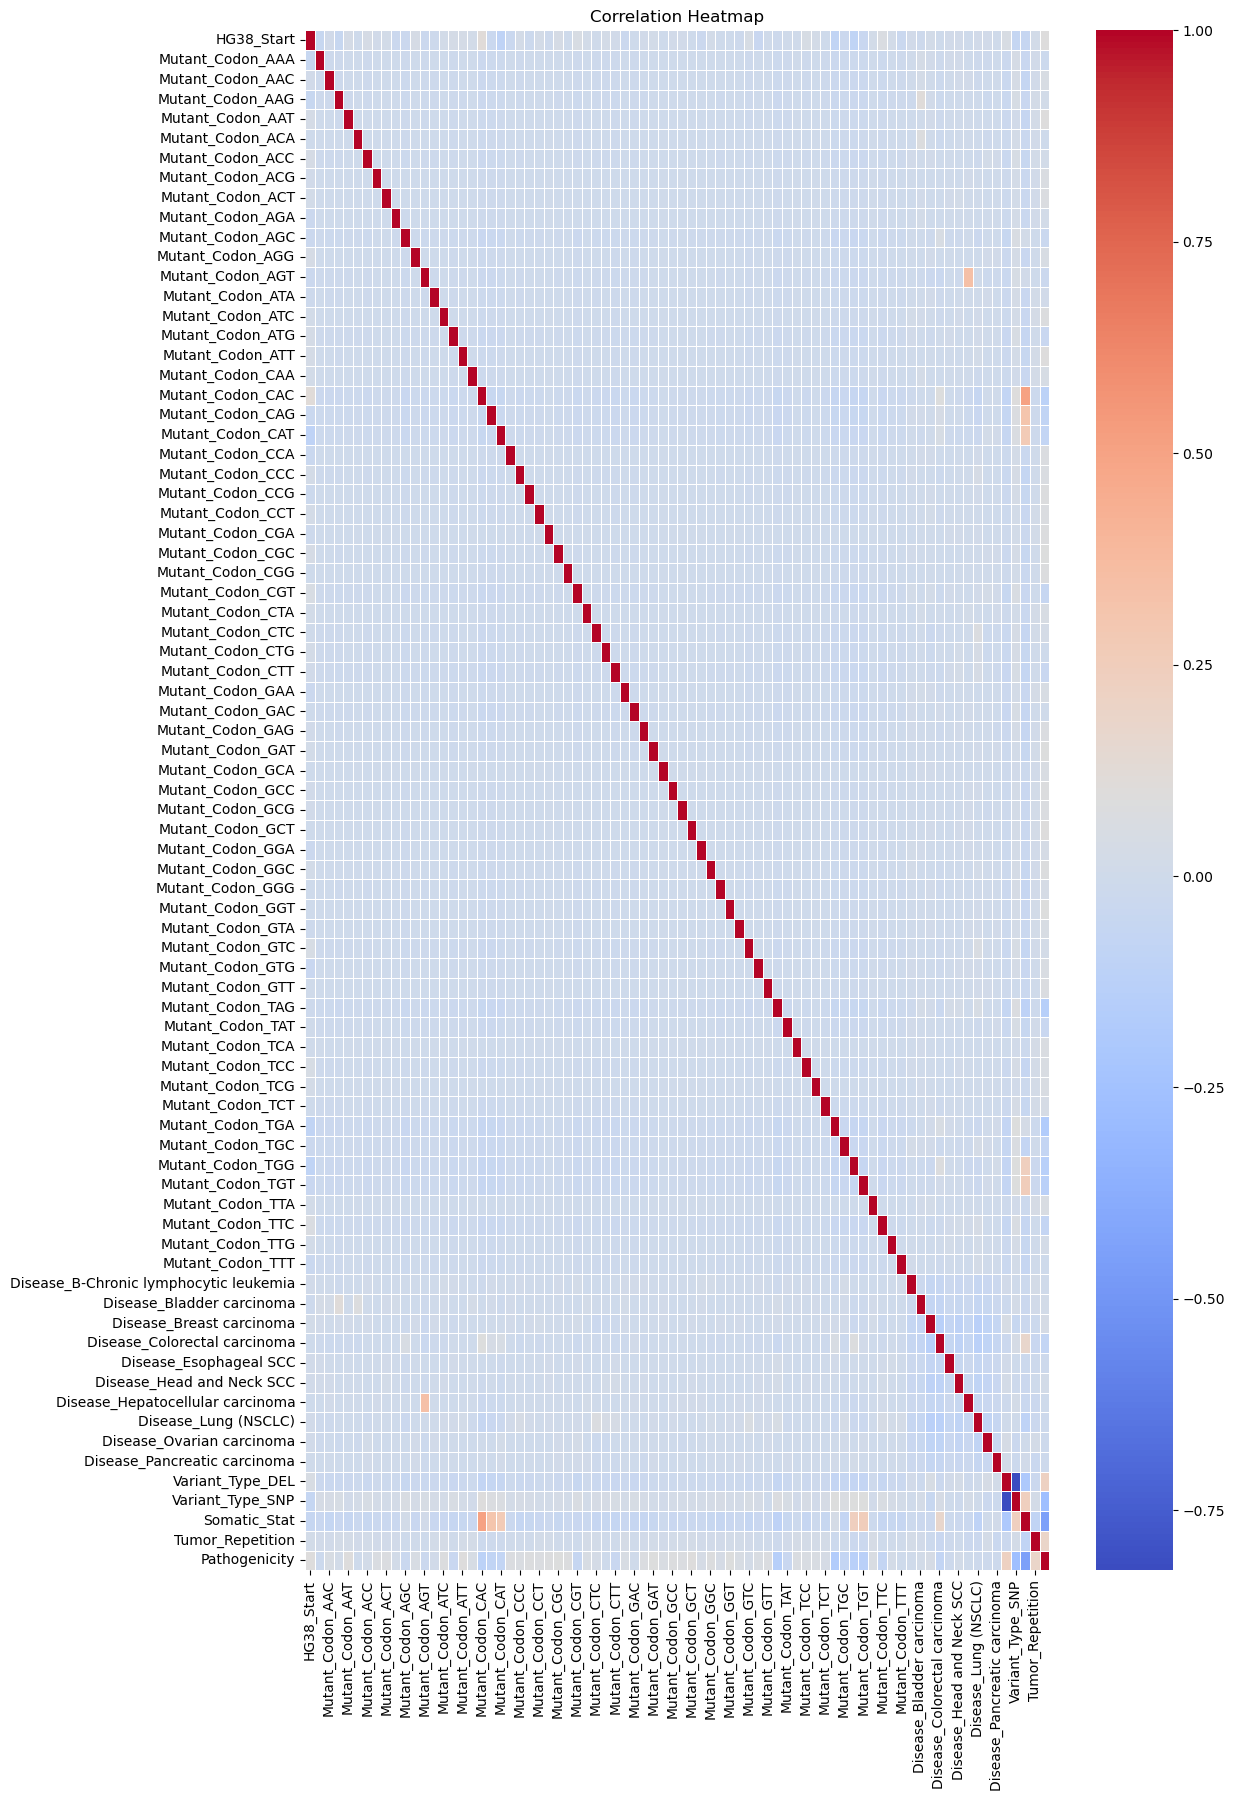

In [92]:
# Compute correlation matrix
correlation_matrix = umd_mut_f3.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 20))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [93]:
# Compute Variance Inflation Factor (VIF)
# VIF requires a DataFrame with only numerical variables
numerical_variables = umd_mut_f3.select_dtypes(include=['float64', 'int64', 'int'])

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = numerical_variables.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_variables.values, i) for i in range(numerical_variables.shape[1])]


In [94]:
# Print VIF
print("\nVariance Inflation Factor (VIF):")
for index, row in vif_data.iterrows():
    print(f"{row['Variable']}: {row['VIF']:.2f}")


Variance Inflation Factor (VIF):
HG38_Start: 44.80
Mutant_Codon_AAA: 1.15
Mutant_Codon_AAC: 1.17
Mutant_Codon_AAG: 1.22
Mutant_Codon_AAT: 1.11
Mutant_Codon_ACA: 1.08
Mutant_Codon_ACC: 1.18
Mutant_Codon_ACG: 1.05
Mutant_Codon_ACT: 1.06
Mutant_Codon_AGA: 1.06
Mutant_Codon_AGC: 1.40
Mutant_Codon_AGG: 1.10
Mutant_Codon_AGT: 1.36
Mutant_Codon_ATA: 1.12
Mutant_Codon_ATC: 1.08
Mutant_Codon_ATG: 1.26
Mutant_Codon_ATT: 1.12
Mutant_Codon_CAA: 1.07
Mutant_Codon_CAC: 3.14
Mutant_Codon_CAG: 2.15
Mutant_Codon_CAT: 1.96
Mutant_Codon_CCA: 1.06
Mutant_Codon_CCC: 1.19
Mutant_Codon_CCG: 1.10
Mutant_Codon_CCT: 1.08
Mutant_Codon_CGA: 1.03
Mutant_Codon_CGC: 1.12
Mutant_Codon_CGG: 1.05
Mutant_Codon_CGT: 1.31
Mutant_Codon_CTA: 1.05
Mutant_Codon_CTC: 1.18
Mutant_Codon_CTG: 1.15
Mutant_Codon_CTT: 1.29
Mutant_Codon_GAA: 1.10
Mutant_Codon_GAC: 1.24
Mutant_Codon_GAG: 1.12
Mutant_Codon_GAT: 1.10
Mutant_Codon_GCA: 1.02
Mutant_Codon_GCC: 1.07
Mutant_Codon_GCG: 1.05
Mutant_Codon_GCT: 1.07
Mutant_Codon_GGA: 1.06
Mutan

In [95]:
# Iterate over the correlation values for 'HG38_Start' feature
print("Correlation with HG38_Start:")
for feature, correlation_value in correlation_matrix['HG38_Start'].items():
    print(f"{feature}: {correlation_value:.2f}")


Correlation with HG38_Start:
HG38_Start: 1.00
Mutant_Codon_AAA: -0.05
Mutant_Codon_AAC: 0.01
Mutant_Codon_AAG: -0.05
Mutant_Codon_AAT: 0.03
Mutant_Codon_ACA: -0.01
Mutant_Codon_ACC: 0.04
Mutant_Codon_ACG: 0.00
Mutant_Codon_ACT: 0.01
Mutant_Codon_AGA: -0.03
Mutant_Codon_AGC: -0.03
Mutant_Codon_AGG: 0.03
Mutant_Codon_AGT: -0.03
Mutant_Codon_ATA: -0.02
Mutant_Codon_ATC: 0.02
Mutant_Codon_ATG: 0.03
Mutant_Codon_ATT: 0.03
Mutant_Codon_CAA: 0.01
Mutant_Codon_CAC: 0.12
Mutant_Codon_CAG: -0.03
Mutant_Codon_CAT: -0.10
Mutant_Codon_CCA: -0.04
Mutant_Codon_CCC: 0.02
Mutant_Codon_CCG: -0.02
Mutant_Codon_CCT: 0.02
Mutant_Codon_CGA: -0.01
Mutant_Codon_CGC: 0.04
Mutant_Codon_CGG: -0.01
Mutant_Codon_CGT: 0.05
Mutant_Codon_CTA: 0.01
Mutant_Codon_CTC: 0.00
Mutant_Codon_CTG: 0.03
Mutant_Codon_CTT: 0.01
Mutant_Codon_GAA: -0.03
Mutant_Codon_GAC: -0.01
Mutant_Codon_GAG: 0.01
Mutant_Codon_GAT: 0.01
Mutant_Codon_GCA: -0.01
Mutant_Codon_GCC: 0.01
Mutant_Codon_GCG: 0.00
Mutant_Codon_GCT: -0.00
Mutant_Codon_GGA:

In [96]:
# Exclude the target variable from the PCA
X = umd_mut_f3.drop(columns=['Pathogenicity'])
y = umd_mut_f3['Pathogenicity']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features by scaling them to have mean=0 and variance=1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize PCA with desired number of components
n_components = 40  
pca = PCA(n_components=n_components)

# Fit PCA to the training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [97]:
# Initialize and fit logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warnings occur
model.fit(X_train_pca, y_train)

# Predict on the train set
y_train_pred = model.predict(X_train_pca)

# Predict on the test set
y_test_pred = model.predict(X_test_pca)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy of the train: {accuracy_train:.2f}")
print(f"Accuracy of the test: {accuracy_test:.2f}")

# Print classification report
print("Classification report for the train set:")
print(classification_report(y_train, y_train_pred))
print("Classification report for the test set:")
print(classification_report(y_test, y_test_pred))

Accuracy of the train: 0.78
Accuracy of the test: 0.78
Classification report for the train set:
              precision    recall  f1-score   support

           1       0.81      0.92      0.86     38595
           2       0.72      0.68      0.70     20882
           3       0.39      0.05      0.09      3439
           4       0.41      0.03      0.06      1353

    accuracy                           0.78     64269
   macro avg       0.58      0.42      0.43     64269
weighted avg       0.75      0.78      0.75     64269

Classification report for the test set:
              precision    recall  f1-score   support

           1       0.80      0.92      0.86      9649
           2       0.72      0.68      0.70      5221
           3       0.45      0.06      0.10       860
           4       0.33      0.01      0.02       338

    accuracy                           0.78     16068
   macro avg       0.58      0.42      0.42     16068
weighted avg       0.75      0.78      0.75     1

In [98]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the PCA-transformed training data
rf_classifier.fit(X_train_pca, y_train)

# Predict on the train data
y_pred_train_rf = rf_classifier.predict(X_train_pca)

# Evaluate the model on train data
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
print(f"Random Forest Train Accuracy: {accuracy_train_rf:.2f}")

# Print classification report for train data
print("Classification Report for Train Data:")
print(classification_report(y_train, y_pred_train_rf))

# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test_pca)

# Evaluate the model on test data
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Test Accuracy: {accuracy_rf:.2f}")

# Print classification report for test data
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred_rf))


Random Forest Train Accuracy: 1.00
Classification Report for Train Data:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     38595
           2       1.00      1.00      1.00     20882
           3       1.00      1.00      1.00      3439
           4       1.00      1.00      1.00      1353

    accuracy                           1.00     64269
   macro avg       1.00      1.00      1.00     64269
weighted avg       1.00      1.00      1.00     64269


Random Forest Test Accuracy: 0.87

Classification Report for Test Data:
              precision    recall  f1-score   support

           1       0.95      0.94      0.94      9649
           2       0.80      0.87      0.84      5221
           3       0.49      0.38      0.43       860
           4       0.55      0.22      0.32       338

    accuracy                           0.87     16068
   macro avg       0.70      0.60      0.63     16068
weighted avg       0.87      0.87      

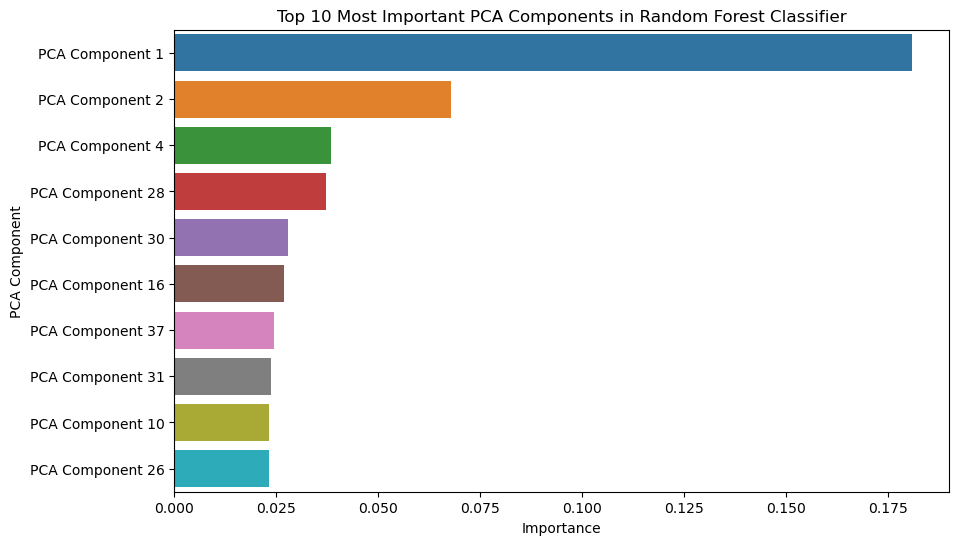

In [99]:
# Get feature importances from the trained classifier
feature_importances = rf_classifier.feature_importances_

# Assuming you have feature names or labels stored in a list called 'feature_labels'
# Modify this list according to your actual feature names or labels
feature_labels = ['PCA Component {}'.format(i+1) for i in range(X_train_pca.shape[1])]

# Create a DataFrame to store feature importances along with their names
feature_importance_df = pd.DataFrame({'Feature': feature_labels, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N most important features
N = 10  # Number of features to plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(N))
plt.title('Top 10 Most Important PCA Components in Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('PCA Component')
plt.show()


In [103]:
# Retrieve PCA loadings
pca_loadings = pca.components_

# Create a DataFrame to store the contribution of each original feature to each PCA component
pca_contribution_df = pd.DataFrame(pca_loadings.T * feature_importances, columns=feature_labels, index=X_train.columns)

# Sum up the contributions across all PCA components for each original feature
original_feature_contribution = pca_contribution_df.sum(axis=1)

# Sort the original features based on their total contribution
sorted_original_features = original_feature_contribution.sort_values(ascending=False)

# Print the top contributing original features
print("Top contributing original features:")
print(sorted_original_features.head(10))


Top contributing original features:
Variant_Type_DEL                    0.056123
Tumor_Repetition                    0.041049
HG38_Start                          0.039268
Mutant_Codon_CTG                    0.037655
Mutant_Codon_TTA                    0.037580
Mutant_Codon_CGG                    0.035051
Mutant_Codon_AGA                    0.028262
Mutant_Codon_TCA                    0.027881
Disease_Hepatocellular carcinoma    0.027763
Mutant_Codon_CGA                    0.027742
dtype: float64


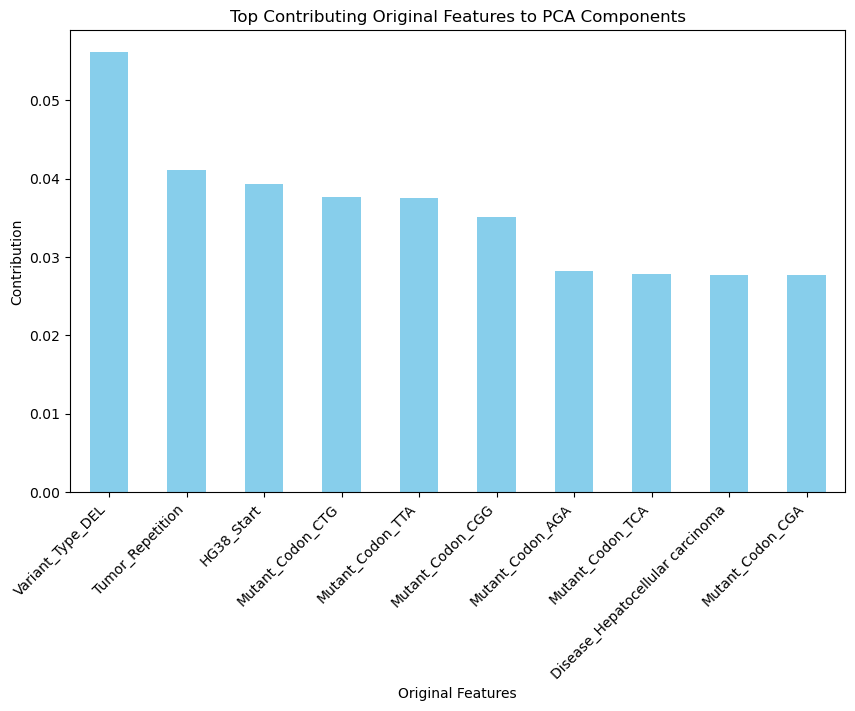

In [104]:
# Plot the contribution of the top contributing original features
plt.figure(figsize=(10, 6))
sorted_original_features.head(10).plot(kind='bar', color='skyblue')
plt.title('Top Contributing Original Features to PCA Components')
plt.xlabel('Original Features')
plt.ylabel('Contribution')
plt.xticks(rotation=45, ha='right')
plt.show()


In [116]:
%%time

# Assuming umd_mut_f3 contains your features and target variable
# Separate features (X) and target variable (y)
X = umd_mut_f3.drop(columns=['Pathogenicity'])  # Update 'target_column' with your actual target column name
y = umd_mut_f3['Pathogenicity']  # Update 'target_column' with your actual target column name

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=20, random_state=42)

# Specify the list of scoring metrics
scoring_metrics = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

# Perform cross-validation for each scoring metric
for metric in scoring_metrics:
    # Perform cross-validation
    # Here, cv=5 specifies 5-fold cross-validation
    # 'scoring' parameter specifies the evaluation metric
    cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring=metric)
    
    # Print the scoring metric and its corresponding cross-validation scores
    print(f"Scoring metric: {metric}")
    print("Cross-validation scores:", cv_scores)
    
    # Calculate and print the mean and standard deviation of cross-validation scores
    print("Mean score:", cv_scores.mean())
    print()


Scoring metric: accuracy
Cross-validation scores: [0.98661937 0.98506348 0.98717869 0.98605838 0.98686749]
Mean score: 0.9863574820084906



C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py", line 1238, in f1_score
    return fbeta_score(
           ^^^^^^^^^^^^
  File "C:\Users\al

C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py", line 1238, in f1_score
    return fbeta_score(
           ^^^^^^^^^^^^
  File "C:\Users\al

Scoring metric: f1
Cross-validation scores: [nan nan nan nan nan]
Mean score: nan



C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py", line 2127, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
          

Scoring metric: precision
Cross-validation scores: [nan nan nan nan nan]
Mean score: nan



C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py", line 2299, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
             

Scoring metric: recall
Cross-validation scores: [nan nan nan nan nan]
Mean score: nan



C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
 

Scoring metric: roc_auc
Cross-validation scores: [nan nan nan nan nan]
Mean score: nan

CPU times: total: 22 s
Wall time: 30.5 s


C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\aliva\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


In [118]:
# Split the data into features (X) and target (y)
X = umd_mut_f3.drop(columns=['Pathogenicity'])
y = umd_mut_f3['Pathogenicity']

# Define preprocessing steps for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define PCA transformer
pca_transformer = PCA(n_components=40)  

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X.columns),
        ('pca', pca_transformer, X.columns) 
    ])

# Define the classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the test data
test_accuracy = pipeline.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9723674383868559


In [108]:
# Get parameters of the pipeline
pipeline_params = pipeline.get_params()

# Print the parameters
for param_name, param_value in pipeline_params.items():
    print(f"{param_name}: {param_value}")


memory: None
steps: [('preprocessor', ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['HG38_Start', 'Somatic_Stat', 'Tumor_Repetition'], dtype='object'))])), ('classifier', RandomForestClassifier(random_state=42))]
verbose: False
preprocessor: ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['HG38_Start', 'Somatic_Stat', 'Tumor_Repetition'], dtype='object'))])
classifier: RandomForestClassifier(random_state=42)
preprocessor__n_jobs: None
preprocessor__remainder: drop
preprocesso

In [119]:
# Define parameter grid for grid search
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__n_estimators': [10, 25, 50, 75, 100],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the trees
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    # Add more parameters as needed
}

# Create grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit grid search on training data
grid_search.fit(X_train, y_train)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy (Best Model):", test_accuracy)


Best Parameters: {'classifier__max_depth': 30, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100, 'preprocessor__num__imputer__strategy': 'mean'}
Best Score: 0.9693475798453994
Test Accuracy (Best Model): 0.9723052028877271


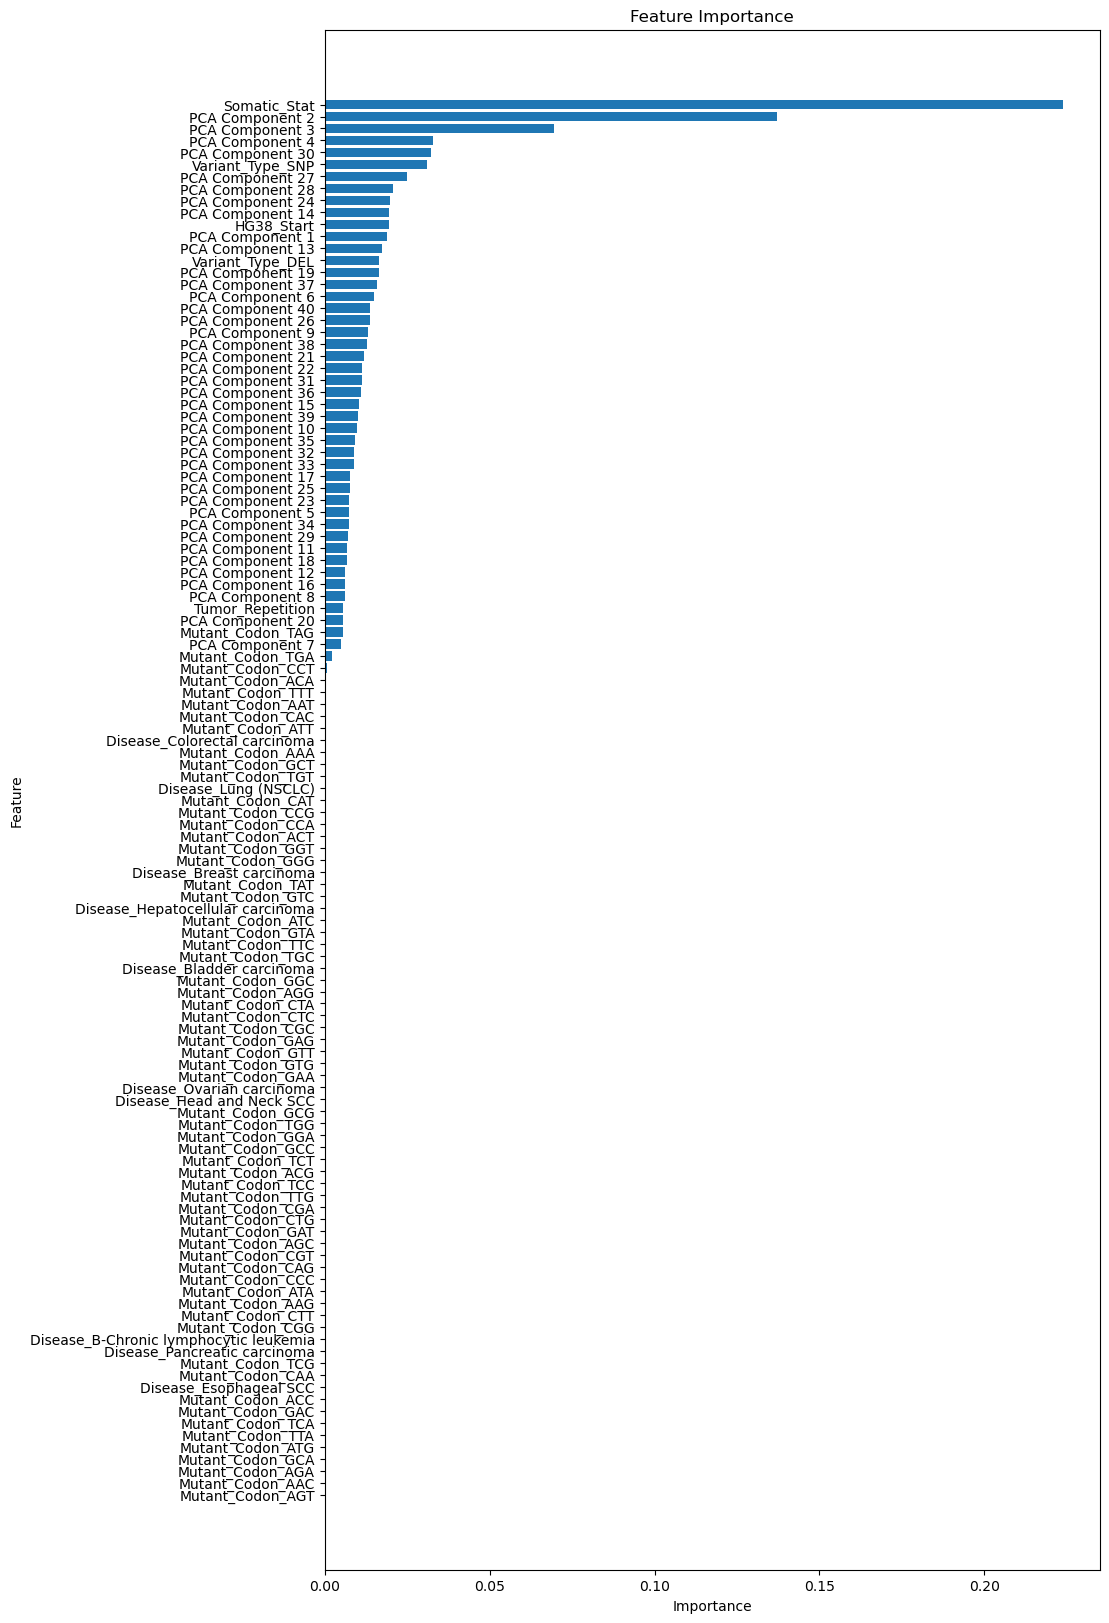

In [131]:
# Define a custom transformer to retain feature names after PCA transformation
class PCATransformer(TransformerMixin):
    def __init__(self, pca):
        self.pca = pca
    
    def fit(self, X, y=None):
        self.pca.fit(X, y)
        return self
    
    def transform(self, X):
        components = self.pca.transform(X)
        n_components = components.shape[1]
        return components, ['PCA Component {}'.format(i+1) for i in range(n_components)]

# Extract feature importances
classifier = pipeline.named_steps['classifier']
importances = classifier.feature_importances_

# Get original feature names and PCA component names
numeric_features = pipeline.named_steps['preprocessor'].transformers_[0][2]
pca_transformer = pipeline.named_steps['preprocessor'].transformers_[1][1]
pca_features = ['PCA Component {}'.format(i+1) for i in range(pca_transformer.n_components_)]
original_features = list(numeric_features) + pca_features

# Sort importances and feature names in descending order
indices = np.argsort(importances)
sorted_importances = [importances[i] for i in indices]
sorted_features = [original_features[i] for i in indices]

# Plot feature importances
plt.figure(figsize=(10, 20))
plt.title("Feature Importance")
plt.barh(range(len(sorted_features)), sorted_importances, align="center")
plt.yticks(range(len(sorted_features)), sorted_features)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()


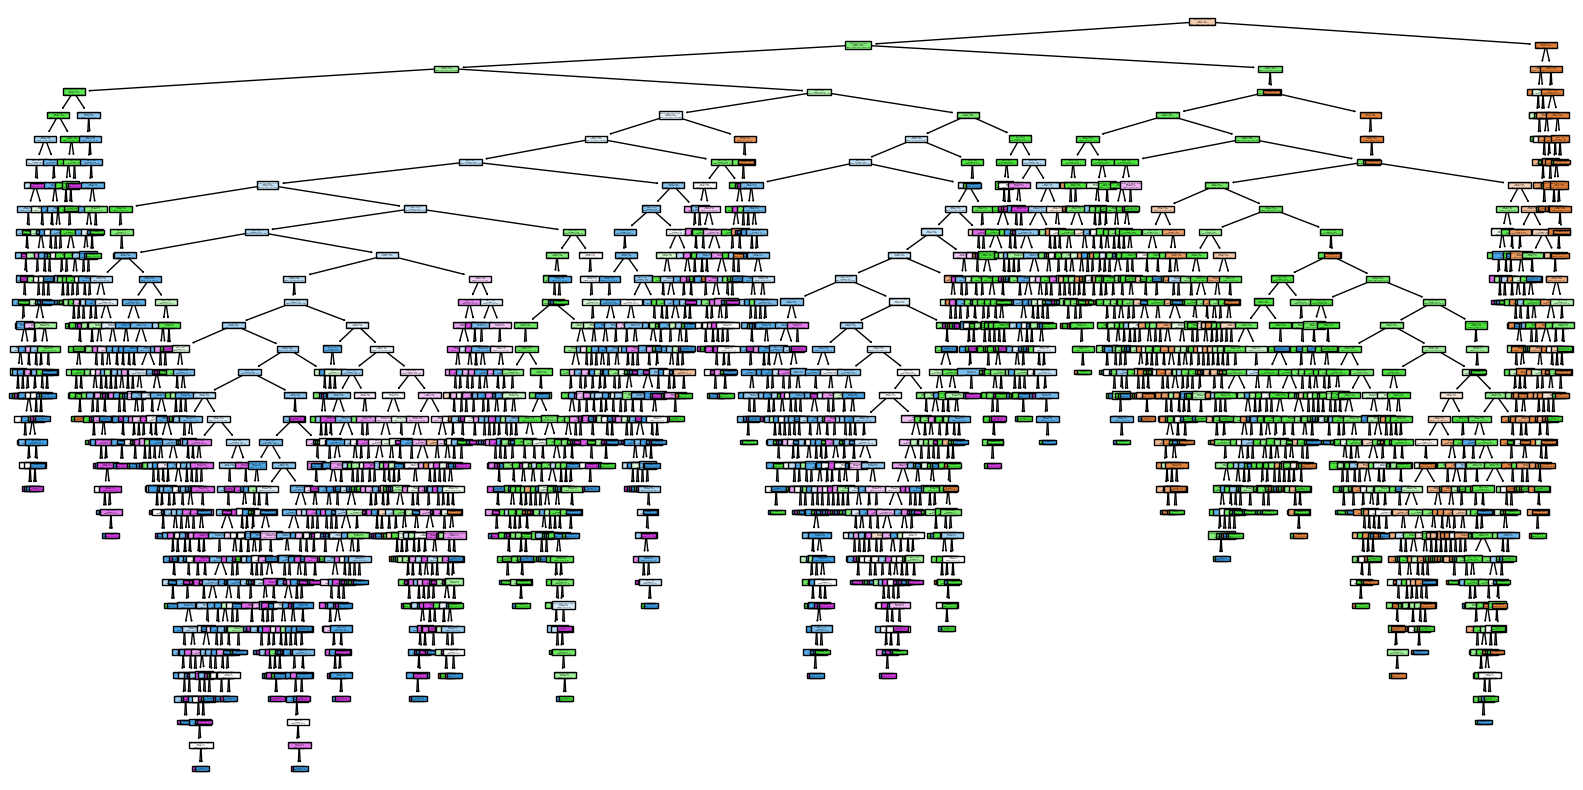

In [150]:
# Get original feature names
numeric_features = pipeline.named_steps['preprocessor'].transformers_[0][2]
pca_features = ['PCA Component {}'.format(i+1) for i in range(pca_transformer.n_components_)]
original_features = list(numeric_features) + pca_features

# Access RandomForestClassifier from the pipeline
random_forest = pipeline.named_steps['classifier']

# Visualize a specific decision tree from the random forest
tree_index = 5  # Change this index as needed

tree = random_forest.estimators_[tree_index]
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=original_features)
plt.show()



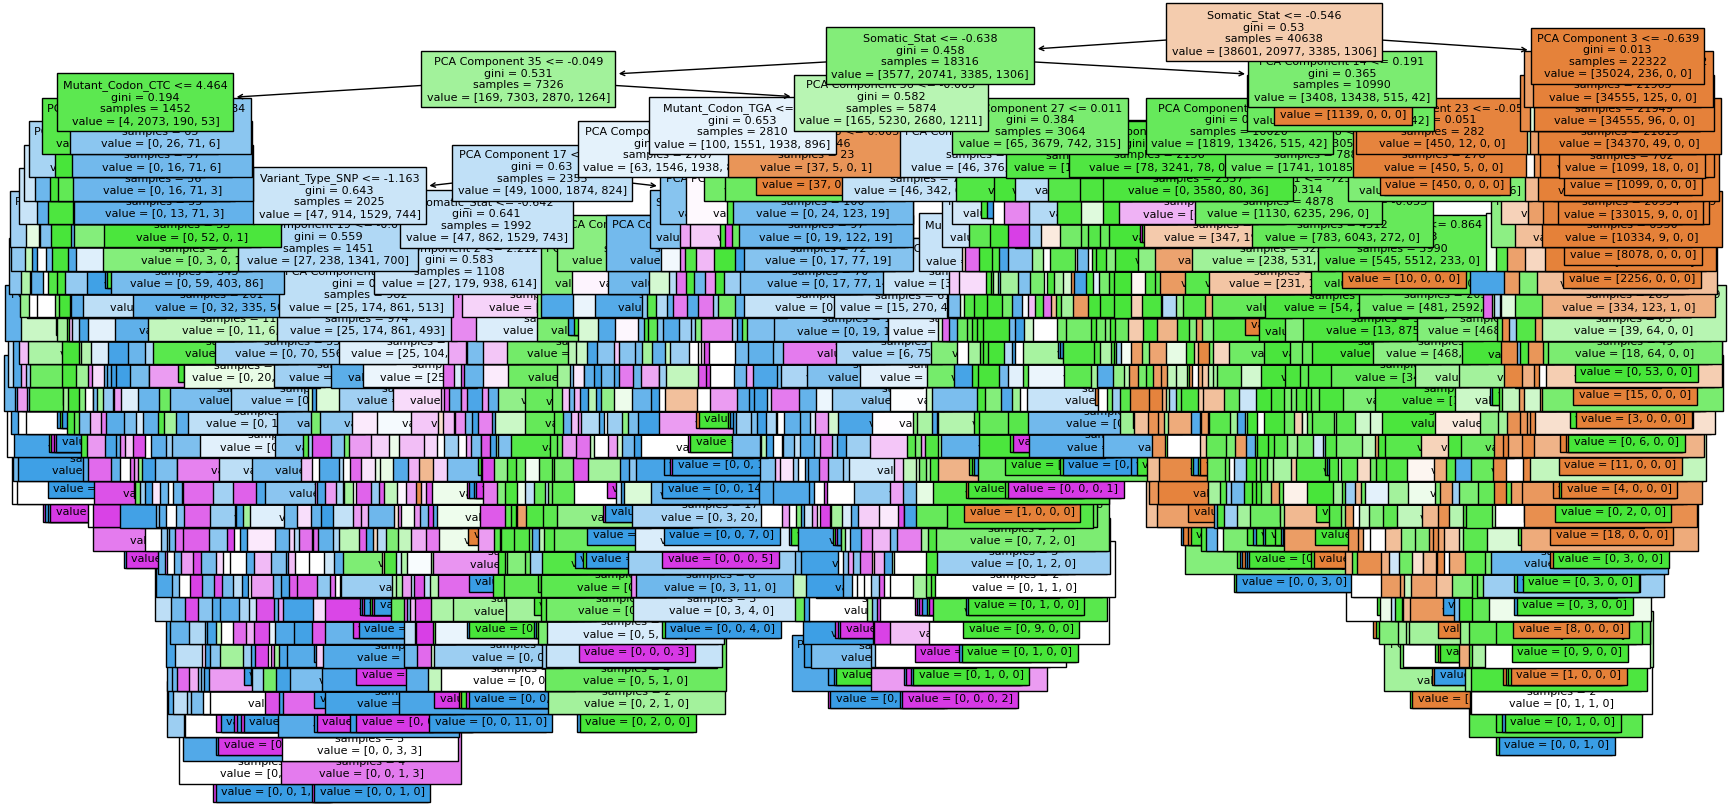

In [149]:
# Get original feature names
numeric_features = pipeline.named_steps['preprocessor'].transformers_[0][2]
pca_features = ['PCA Component {}'.format(i+1) for i in range(pca_transformer.n_components_)]
original_features = list(numeric_features) + pca_features

# Access RandomForestClassifier from the pipeline
random_forest = pipeline.named_steps['classifier']

# Visualize a specific decision tree from the random forest
tree_index = 5  # Change this index as needed

tree = random_forest.estimators_[tree_index]
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=original_features, fontsize=8)
plt.show()


In [153]:
from joblib import dump

# Assuming 'pipeline' is your trained pipeline
dump(pipeline, 'pipeline.joblib')


['pipeline.joblib']